Aleksandra Bednarczuk

# Survey on Municipal Services of Barcelona's City

Source of the data: 

https://opendata-ajuntament.barcelona.cat/data/en/dataset/esm-bcn-evo

https://opendata-ajuntament.barcelona.cat/doc/BackOff_DescCompDefCamps/EnquestaServeisMunicipals_BCN/2019_Any/2019_r19006_ESM_Questionari_v1_0.pdf

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# 1.1. Reading the data

In [2]:
survey = pd.read_csv('../../data/survey/2019_r19006_esm_evolucio_bdd_v1_0/2019_r19006_esm_evolucio_bdd_v1_0.csv', low_memory=False)

In [3]:
survey.head()

,Unnamed: 0,ID,ANY,NOM_DISTRICTE,NOM_BARRI,DATA_ENQ,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,RES_HAB,PADRO,...,DEM_BARRI_N1,CONSULTA_DIARI_Q01_N1,CONSULTA_DIARI_Q02_N1,VEURE_TELE_Q01_N1,VEURE_TELE_Q02_N1,VEURE_TELE_Q03_N1,HAB_COTXE_PART_1A4,US30D_XARXES_Q06,US30D_XARXES_Q07,PMI_1A3_2017
0,1,198900001,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,TV3,NaN,NaN,CAP,NaN,NaN,NaN
1,2,198900002,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ALTRES,NaN,LA 1,NaN,NaN,CAP,NaN,NaN,NaN
2,3,198900003,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,LA 1,NaN,NaN,CAP,NaN,NaN,NaN
3,4,198900004,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,EL PERIÓDICO,NaN,LA 1,NaN,NaN,CAP,NaN,NaN,NaN
4,5,198900005,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,TV3,NaN,NaN,CAP,NaN,NaN,NaN


In [4]:
del survey['Unnamed: 0']

In [5]:
survey.shape

(135813, 285)

In [6]:
for i in survey.columns.tolist():
    print(i, survey[i].unique(), "\n")

ID [198900001 198900002 198900003 ... 201907061 201907062 201907063] 

ANY [1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019] 

NOM_DISTRICTE ['CIUTAT VELLA' 'SANT MARTÍ' 'EIXAMPLE' 'SANTS - MONTJUÏC' 'LES CORTS'
 'SARRIÀ - SANT GERVASI' 'GRÀCIA' 'HORTA - GUINARDÓ' 'NOU BARRIS'
 'SANT ANDREU'] 

NOM_BARRI [nan 'EL RAVAL' 'EL BARRI GÒTIC' 'LA BARCELONETA'
 'SANT PERE, SANTA CATERINA I LA RIBERA' 'EL FORT PIENC'
 'LA SAGRADA FAMÍLIA' "LA DRETA DE L'EIXAMPLE"
 "L'ANTIGA ESQUERRA DE L'EIXAMPLE" "LA NOVA ESQUERRA DE L'EIXAMPLE"
 'SANT ANTONI' 'EL POBLE SEC' 'LA MARINA DEL PRAT VERMELL'
 'LA MARINA DE PORT' 'LA FONT DE LA GUATLLA' 'HOSTAFRANCS' 'LA BORDETA'
 'SANTS-BADAL' 'SANTS' 'LES CORTS' 'LA MATERNITAT I SANT RAMON'
 'PEDRALBES' 'VALLVIDRERA, EL TIBIDABO I LES PLANES' 'SARRIÀ'
 'LES TRES TORRES' 'SANT GERVASI-LA BONANOVA' 'EL PUTXET I EL FARRÓ'
 'SANT GERVASI-GALVANY' 'VALLCARCA I 

VAL_URBA ['4' '6' '5' '7' '0 = PÈSSIMA GESTIÓ' '2' '3' '1' '8' 'NO HO SAP'
 '10 = EXCEL·LENT GESTIÓ' '9' 'NO CONTESTA' nan] 

VAL_ASFALT ['6' '10 = EXCEL·LENT GESTIÓ' '7' '8' '4' '0 = PÈSSIMA GESTIÓ' '3' '1' '5'
 '2' '9' 'NO HO SAP' 'NO CONTESTA' nan] 

VAL_FACANES [nan '5' '3' '6' '7' '4' '10 = EXCEL·LENT GESTIÓ' '0 = PÈSSIMA GESTIÓ' '2'
 '8' '9' 'NO HO SAP' '1' 'NO CONTESTA'] 

VAL_CIRCUL ['0 = PÈSSIMA GESTIÓ' '3' '1' '4' '5' '6' '2' '7' '8' 'NO HO SAP'
 '10 = EXCEL·LENT GESTIÓ' '9' 'NO CONTESTA' nan] 

VAL_APARCA ['0 = PÈSSIMA GESTIÓ' '3' '1' '5' '4' '2' '9' '7' '8' 'NO HO SAP' '6'
 '10 = EXCEL·LENT GESTIÓ' 'NO CONTESTA' nan] 

VAL_BUS ['7' '5' '8' '4' '2' '9' '6' '10 = EXCEL·LENT GESTIÓ' '3'
 '0 = PÈSSIMA GESTIÓ' 'NO HO SAP' '1' 'NO CONTESTA' nan] 

VAL_METRO ['7' '5' '9' '8' '6' '2' 'NO HO SAP' '10 = EXCEL·LENT GESTIÓ' '3' '4'
 '0 = PÈSSIMA GESTIÓ' '1' 'NO CONTESTA' nan] 

VAL_TRAM [nan '5' '7' 'NO HO SAP' '9' '8' 'NO CONTESTA' '4'
 '10 = EXCEL·LENT GESTIÓ' '6' '2' '3' '1' '0 = PÈ

PMS_ENERGIA [nan 'SÍ' 'NO' 'NO HO SAP' 'NO CONTESTA'] 

HAB_REGIM_1A5 [nan 'EN LLOGUER' 'EN CESSIÓ GRATUÏTA' 'EN PROPIETAT' 'NO CONTESTA'
 'OCUPADA' "PAGA PER L'ÚS D'UNA HABITACIÓ I D'ALTRES ESPAIS COMPARTITS"
 'NO HO SAP' 'ALTRA SITUACIÓ'] 

HAB_HIP [nan 'NO' 'SÍ' 'NO CONTESTA' 'NO HO SAP'] 

COST_HIP_NRE [    nan  700.    300.    600.    500.    790.    400.    670.    900.
  750.    350.    360.    150.   1000.    327.    430.    285.    550.
   60.    160.    450.    312.    110.    267.    140.    850.   1100.
  220.    620.    355.    403.    520.    530.    250.    340.    800.
 1200.    260.    380.    190.    370.   1375.    650.   1250.   1500.
  630.    482.    680.    690.    200.    890.    286.   1400.    302.
  490.    915.    440.    770.    320.    311.    480.    460.    363.
  420.    280.    950.    774.    583.   1600.    580.    290.    397.
  533.    599.    465.    410.    970.    364.    455.   1300.    570.
  170.    217.    169.     10.    560.     15.   1050

CONSULTA_DIARI_Q02 [nan 'EL PERIÓDICO (EN CASTELLÀ)' 'CAP MÉS' 'EL PERIÓDICO (EN CATALÀ)'
 'DIARI PAPER GRATUÏT (20 MINUTOS)' 'LA VANGUARDIA (EN CASTELLÀ)'
 'DIARIS ESPORTIUS' 'EL PAÍS' 'EL MUNDO' 'EL PUNT AVUI' 'PÚBLICO' 'ABC'
 'ALTRES' 'DIARIS INTERNACIONALS' 'DIARIS ECONÒMICS'
 'DIARIS COMARCALS/LOCALS' 'LA RAZÓN' 'LA VANGUARDIA (EN CATALÀ)' 'ARA'
 'DIARIS DIGITALS PURS' 'SPORT' 'EL MUNDO DEPORTIVO' 'VILAWEB'
 'ALTRES DIARIS INTERNACIONALS' 'NEW YORK TIMES' 'AS' 'LE MONDE'
 "ALTRES D'INFORMACIÓ GENERAL DIGITALS PURS" 'THE GUARDIAN' 'MARCA '
 'CONFIDENCIAL' 'EXPANSIÓN' 'ELNACIONAL.CAT' 'NACIÓ DIGITAL' 'ELDIARIO.ES'
 'DIRECTE.CAT' 'EL ECONOMISTA' 'ALTRES ESPORTIUS' 'CINCO DÍAS'
 "ALTRES D'INFORMACIÓ GENERAL AMB VERSIÓ IMPRESA" 'ALTRES ECONÒMICS'
 'E-NOTÍCIES'] 

VEURE_TELE_Q01 ['TV3' 'LA 1' 'LA 2' nan 'NO MIRA LA TELEVISIÓ' 'ANTENA 3' 'TELE 5'
 'CANAL 33' 'CANAL+ 1 / MOVISTAR #0' 'NO HO SAP' 'NO TÉ TELEVISIÓ'
 'ALTRES' 'BETEVÉ (BTV)' 'NO CONTESTA' '8TV' 'CUATRO' 'CANAL 3/24'
 'LASEXTA

NACIO_ACT_UE [nan 'ESPANYOLA' 'RESTA PAÏSOS' 'NO CONTESTA' 'ALTRES UNIÓ EUROPEA'] 

NACIO_ABANS_UE [nan 'RESTA PAÏSOS' 'ALTRES UNIÓ EUROPEA' 'NO CONTESTA'] 

NACIO_EVO [nan 'ESPANYOLA SEMPRE' 'RESTA PAÏSOS' 'NO CONTESTA' 'ALTRES UNIÓ EUROPEA'
 'ESPANYOLA, ABANS RESTA PAÏSOS' 'ESPANYOLA, ABANS ALTRES UNIÓ EUROPEA'] 

LLOC_PADRO_1A6 [nan "ADREÇA ON S'HA FET L'ENTREVISTA" 'ALTRA ADREÇA DE BARCELONA'
 "RESTA D'ESPANYA" "RESTA D'UE" 'RESTA DE CATALUNYA' 'RESTA DEL MÓN'
 'NO CONTESTA' 'NO HO SAP' 'NO ESTÀ EMPADRONAT'] 

SATISF_RES_BCN_1A4 ['MOLT SATISFET (9 A 10)' 'BASTANT SATISFET (7 A 8)'
 'POC/GENS SATISFET (0 A 4)' 'NS / NC' nan 'SATISFET (5 A 6)'] 

VAL_GESTMUNI_1A2 ['APROVAT (5 A 10)' 'SUSPÈS (0 A 4)' 'NS / NC' nan] 

VAL_GESTGENE_1A2 ['APROVAT (5 A 10)' 'SUSPÈS (0 A 4)' 'NS / NC' nan 'PORTA POC TEMPS'] 

VAL_GESTGOESP_1A2 ['APROVAT (5 A 10)' 'SUSPÈS (0 A 4)' 'NS / NC' nan 'PORTA POC TEMPS'] 

VAL_ESCOMBRARIES_1A2 [nan 'APROVAT (5 A 10)' 'SUSPÈS (0 A 4)' 'NS / NC'] 

VAL_NETEJA_1A2 [na

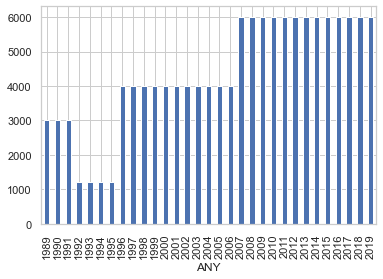

In [7]:
survey.groupby(['ANY']).size().plot.bar()

The sample size has varied over time: from 1989 to 1991 it included 3,000 interviews, from 1992 to 1995 - 1,200, from 1996 to 2006 - 4,000, and since 2007 it includes 6,000 interviews. The dataset is limited to most recent version of the survey, starting from 2007.

In [8]:
survey = survey.query('ANY >= 2007')

In [9]:
survey.shape

(78013, 285)

In [10]:
# survey.query('ANY == 2019 and EDAT1899_1A6 == "DE 65 ANYS I MÉS"').groupby(['TRANSP_MOU']).size()

In [11]:
# survey.query('ANY == 2019 and EDAT1899_1A6 == "DE 65 ANYS I MÉS"').groupby(['PROB_BCN_N1']).size()

# 1.2. Subsetting the DataFrame to only relevant columns (survey questions)

In [12]:
# Reading questions dataset with a flag indicating if the question is relevant for further analysis
questions = pd.read_excel('../../data/survey/survey_filtered/2019_r19006_ESM_Evolucio_BDD_Metainformacio_Preguntes_v1_0.xlsx')

In [13]:
questions.head()

,Nom_variable,Flag,Pregunta,Question,Tipus_variable
0,ID,0,IDENTIFICADOR DE L'ENQUESTA,SURVEY IDENTIFIER,numeric
1,ANY,1,ANY DE L'ENQUESTA,SURVEY YEAR,numeric
2,NOM_DISTRICTE,1,DISTRICTE MUNICIPAL,DISTRICT,factor
3,NOM_BARRI,0,BARRI,BARRI,factor
4,GRANBARRI,0,GRAN BARRI,GRAN BARRI,factor


In [14]:
questions.shape

(285, 5)

In [15]:
# Filtering out unnecessary questions
questions = questions.query('Flag == 1')
questions.head()

,Nom_variable,Flag,Pregunta,Question,Tipus_variable
1,ANY,1,ANY DE L'ENQUESTA,SURVEY YEAR,numeric
2,NOM_DISTRICTE,1,DISTRICTE MUNICIPAL,DISTRICT,factor
6,SEXE,1,SEXE,SEX,factor
7,EDAT1899_1A6,1,TRAMS D'EDAT,AGE,factor
8,NACIO_ACT_UE,1,NACIONALITAT ACTUAL - AGRUPADA,WHAT IS YOUR NATIONALITY?,factor


In [16]:
questions.shape

(68, 5)

In [17]:
# Dictionary with Catalan and Spanish names/descriptions of questions
df = questions[['Nom_variable', 'Question']]
questions_dict = {}
for i in range(len(df)):
    questions_dict[df.iloc[i].Nom_variable] = df.iloc[i].Question
questions_dict

{'ANY': 'SURVEY YEAR',
 'NOM_DISTRICTE': 'DISTRICT',
 'SEXE': 'SEX',
 'EDAT1899_1A6': 'AGE',
 'NACIO_ACT_UE': 'WHAT IS YOUR NATIONALITY?',
 'SITLABORAL': 'WHAT IS YOUR WORK SITUATION?',
 'TMP_RES_BCN_1A6': 'HOW LONG HAVE YOU BEEN LIVING IN BARCELONA?',
 'TMP_RES_BARRI_1A6': 'HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?',
 'EVO1A_BCN': 'DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?',
 'FUTUR_BCN': 'FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR WORSEN?',
 'SATISF_RES_BCN_0A10': 'ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA?',
 'PROB_BCN_N1': 'COULD YOU TELL ME WHAT IS THE MOST SERIOUS PROBLEM THE CITY OF BARCELONA HAS AT THE MOMENT? - GROUPED',
 'PROB_PERS_N1': 'WHAT IS THE PROBLEM THAT AFFECTS YOU THE MOST? - GROUPED',
 'VAL_GESTMUNI': 'ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY

In [18]:
relevant_questions = list(questions.Nom_variable.unique())

In [19]:
# Filtering the table by choosing only those questions which are relevant for further analysis
survey = survey[relevant_questions]

Potentially relevant variables were preliminary chosen based on the survey questionnaire and metadata with questions available on the Open Data BCN website. Below, the number of NA values for each question marked as "relevant" is being calculated. This way it is checked if questions marked as relevant were used during the whole period of analysis or if they were introduced in the recent editions of the survey. It is being done in order to avoid variables with too many NA values.

In [20]:
temp_dict = {}
temp_dict['Questions'] = survey.columns.tolist()
for year in range(2007,2020):
    temp_list = []
    #print(year)
    df = survey.query('ANY >= @year')
    for i in survey.columns.tolist():
        temp_list.append(df[i].isna().sum())
    temp_dict[year] = temp_list

In [21]:
count_nans = pd.DataFrame.from_dict(temp_dict).set_index('Questions')

In [22]:
count_nans = count_nans.loc[count_nans.index.isin(questions.Nom_variable)]

In [23]:
count_nans[(count_nans.T != 0).any()]

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Questions,,,,,,,,,,,,,
VAL_SOROLL,6000,0,0,0,0,0,0,0,0,0,0,0,0
VAL_TRAM,60013,54013,48000,42000,36000,30000,24000,18000,12000,6000,0,0,0
VAL_BICING,6000,0,0,0,0,0,0,0,0,0,0,0,0
VAL_SPEIS,66013,60013,54000,48000,42000,36000,30000,24000,18000,12000,6000,0,0
VAL_CC,42013,36013,30000,24000,18000,12000,6000,0,0,0,0,0,0
US_ASSOCIA_BARRI,66013,60013,54000,48000,42000,36000,30000,24000,18000,12000,6000,0,0
HAB_TREBDOM,66013,60013,54000,48000,42000,36000,30000,24000,18000,12000,6000,0,0
HAB_REGIM_1A5,66013,60013,54000,48000,42000,36000,30000,24000,18000,12000,6000,0,0
PROB_LLAR_ECON_1A6,66013,60013,54000,48000,42000,36000,30000,24000,18000,12000,6000,0,0


In [24]:
count_nans[(count_nans.T != 0).any()].shape

(11, 13)

11 out of 68 questions marked as relevant have some NA values during the period of analysis. According to literature review, variables describing health might be relevant determinants of residentail satisfaction and willingness to move. The dataset does not have explicit question about health status of the citizens, however it asks about recognized disability of interviewee or his/her family. We will treat this variable as health status description. That is why we need to use only the 2019 edition of the survey, as it is the first year when the questions about disability were used.

In [25]:
survey = survey.query('ANY >= 2010').dropna(axis='columns')

In [26]:
survey.head()

,ANY,NOM_DISTRICTE,SEXE,EDAT1899_1A6,NACIO_ACT_UE,SITLABORAL,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,EVO1A_BCN,FUTUR_BCN,...,HAB_COTXE_PART,HAB_M2_1A14,LLAR_INGRESSOS_1A10,CLASSESOC_ENT,SENTPERTI,LLOC_NAIX_1A4,LLENGUA_HAB,ESTUDIS_1A6,RESUM_PARENTIU,HAB_RES_1A4
75813,2010,CIUTAT VELLA,HOME,DE 35 A 44 ANYS,RESTA PAÏSOS,TREBALLA PER COMPTE D'ALTRI (ASSALARIAT/ADA),MÉS DE 5 ANYS I FINS A 10 ANYS,MÉS DE 5 ANYS I FINS A 10 ANYS,HA MILLORAT,MILLORARÀ,...,NO,DE 81 A 90 M2,NO CONTESTA,CLASSE MITJANA-MITJANA,MÉS ESPANYOL QUE CATALÀ,ESTRANGER,CASTELLÀ,UNIVERSITARIS,PARELLA AMB FILLS,QUATRE O MÉS
75814,2010,CIUTAT VELLA,DONA,DE 25 A 34 ANYS,ESPANYOLA,TREBALLA PER COMPTE D'ALTRI (ASSALARIAT/ADA),SEMPRE HA VISCUT A LA CIUTAT,MÉS DE 2 ANYS I FINS A 5 ANYS,HA EMPITJORAT,MILLORARÀ,...,NO,FINS 50 M2,DE 2.001 A 2.500 EUROS,CLASSE MITJANA-BAIXA,MÉS CATALÀ QUE ESPANYOL,BARCELONA CIUTAT,CATALÀ,SECUNDARIS PROFESSIONALS,PARELLA SOLA,DUES
75815,2010,CIUTAT VELLA,DONA,DE 65 ANYS I MÉS,ESPANYOLA,JUBILAT/ADA / PENSIONISTA / INCAPACITAT/ADA LA...,MÉS DE 10 ANYS,MÉS DE 10 ANYS,HA EMPITJORAT,EMPITJORARÀ,...,NO,DE 51 A 60 M2,DE 500 A 1.000 EUROS,CLASSE BAIXA,ÚNICAMENT ESPANYOL,RESTA D'ESPANYA,CASTELLÀ,OBLIGATORIS,PERSONA SOLA,UNA
75816,2010,CIUTAT VELLA,HOME,DE 65 ANYS I MÉS,ESPANYOLA,JUBILAT/ADA / PENSIONISTA / INCAPACITAT/ADA LA...,MÉS DE 10 ANYS,MÉS DE 10 ANYS,HA EMPITJORAT,MILLORARÀ,...,NO,DE 51 A 60 M2,DE 2.001 A 2.500 EUROS,CLASSE MITJANA-MITJANA,ALTRES,RESTA D'ESPANYA,CASTELLÀ,UNIVERSITARIS,PERSONA SOLA,UNA
75817,2010,CIUTAT VELLA,HOME,DE 65 ANYS I MÉS,ESPANYOLA,JUBILAT/ADA / PENSIONISTA / INCAPACITAT/ADA LA...,MÉS DE 10 ANYS,MÉS DE 10 ANYS,HA EMPITJORAT,MILLORARÀ,...,NO,DE 51 A 60 M2,DE 500 A 1.000 EUROS,CLASSE BAIXA,TAN ESPANYOL COM CATALÀ,RESTA D'ESPANYA,CASTELLÀ,NO HA ACABAT ELS ESTUDIS OBLIGATORIS,PARELLA SOLA,DUES


In [27]:
survey.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'SEXE',
 'EDAT1899_1A6',
 'NACIO_ACT_UE',
 'SITLABORAL',
 'TMP_RES_BCN_1A6',
 'TMP_RES_BARRI_1A6',
 'EVO1A_BCN',
 'FUTUR_BCN',
 'SATISF_RES_BCN_0A10',
 'PROB_BCN_N1',
 'PROB_PERS_N1',
 'VAL_GESTMUNI',
 'DEM_BCN_MUNI_N1',
 'VAL_ESCOMBRARIES',
 'VAL_NETEJA',
 'VAL_SOROLL',
 'VAL_VERD',
 'VAL_ENLLUM',
 'VAL_URBA',
 'VAL_ASFALT',
 'VAL_FACANES',
 'VAL_CIRCUL',
 'VAL_APARCA',
 'VAL_BUS',
 'VAL_METRO',
 'VAL_BICING',
 'VAL_GUB',
 'VAL_SEGUR',
 'VAL_SEGUR_BARRI',
 'VAL_ESPORT',
 'VAL_SIAC',
 'VAL_CSS',
 'VAL_CULT',
 'VAL_FESTESPOP',
 'VAL_MERCAT',
 'VAL_BIBLIO',
 'TRANSP_MOU',
 'VAL_TRANSP_1A5',
 'VAL_TRANSP_BARRI_1A5',
 'EVO1A_BARRI',
 'FUTUR_BARRI',
 'SATISF_RES_BARRI_0A10',
 'PROB_BARRI_N1',
 'COMPARA_BARRI',
 'CANVI_LLOC_RES_1A3',
 'VAL_GESTBARRI',
 'DEM_BARRI_N1',
 'HAB_COTXE_PART',
 'HAB_M2_1A14',
 'LLAR_INGRESSOS_1A10',
 'CLASSESOC_ENT',
 'SENTPERTI',
 'LLOC_NAIX_1A4',
 'LLENGUA_HAB',
 'ESTUDIS_1A6',
 'RESUM_PARENTIU',
 'HAB_RES_1A4']

Now the dataset includes 59 variables.

In [28]:
# Reading responses dataset with a flag indicating if the response relates to the question
# which was tagged as relevant for further analysis or not
responses = pd.read_excel('../../data/survey/survey_filtered/2019_r19006_ESM_Evolucio_BDD_Metainformacio_Respostes_v1_0.xlsx')

In [29]:
responses.head()

,Nom_variable,Flag,Resposta,Answer
0,NOM_DISTRICTE,1,CIUTAT VELLA,CIUTAT VELLA
1,NOM_DISTRICTE,1,EIXAMPLE,EIXAMPLE
2,NOM_DISTRICTE,1,SANTS - MONTJUÏC,SANTS - MONTJUÏC
3,NOM_DISTRICTE,1,LES CORTS,LES CORTS
4,NOM_DISTRICTE,1,SARRIÀ - SANT GERVASI,SARRIÀ - SANT GERVASI


In [30]:
responses.shape

(4529, 4)

In [31]:
responses = responses.query('Flag == 1')
responses.head()

,Nom_variable,Flag,Resposta,Answer
0,NOM_DISTRICTE,1,CIUTAT VELLA,CIUTAT VELLA
1,NOM_DISTRICTE,1,EIXAMPLE,EIXAMPLE
2,NOM_DISTRICTE,1,SANTS - MONTJUÏC,SANTS - MONTJUÏC
3,NOM_DISTRICTE,1,LES CORTS,LES CORTS
4,NOM_DISTRICTE,1,SARRIÀ - SANT GERVASI,SARRIÀ - SANT GERVASI


In [32]:
responses.shape

(859, 4)

# 1.3. Translating the data from Catalan to English

As the survey was conducted in Catalan or Spanish and the answers are recorded in Catalan it needs to be translated into English for better understanding of the responses. The survey was initially translated on metadata tables with questions (*Preguntas*) and answers (*Respostes*). Below, I create a dictionary *translating_responses* with question name (*Nom_variable*) as a key and *temp_dict* as a value. *Temp_dict* is a nested dictionary, with Catalan answer as a key and English translation of this answer as a value.

In [33]:
translating_responses = {}
for i in responses.Nom_variable.unique():
    temp_dict = {}
    temp_dict[str(np.nan)] = np.nan
    df = responses.query('Nom_variable == @i')
    for j in range(len(df)):
        temp_dict[str(df.iloc[j].Resposta)] = df.iloc[j].Answer
    translating_responses[i] = temp_dict

In [34]:
survey['VAL_BUS'].unique()

array(['6', '10 = EXCEL·LENT GESTIÓ', '9', '8', '7', '5', 'NO HO SAP',
       '3', '4', '1', '2', '0 = PÈSSIMA GESTIÓ', 'NO CONTESTA'],
      dtype=object)

In [35]:
translating_responses['VAL_BUS']

{'nan': nan,
 '0 = PÈSSIMA GESTIÓ': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 '10 = EXCEL·LENT GESTIÓ': 10,
 'NO HO SAP': "I DON'T KNOW",
 'NO CONTESTA': 'NO ANSWER'}

In [36]:
# Using a for loop, the survey is being translated by replacing Catalan version of an answer
# with its English translation using translating_answers dictionary created above.
for column in [i for i in list(survey.columns) if i not in ["ANY", "COST_LLOGUER_NRE", "COST_ESPAI_NRE"]]:
    translate = translating_responses[column]
    for i in survey[column].unique():
        survey[column].replace(i, translate[str(i)], inplace=True)

In [37]:
survey['VAL_BUS'].unique()

array([6, 10, 9, 8, 7, 5, "I DON'T KNOW", 3, 4, 1, 2, 0, 'NO ANSWER'],
      dtype=object)

In [38]:
survey.head()

,ANY,NOM_DISTRICTE,SEXE,EDAT1899_1A6,NACIO_ACT_UE,SITLABORAL,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,EVO1A_BCN,FUTUR_BCN,...,HAB_COTXE_PART,HAB_M2_1A14,LLAR_INGRESSOS_1A10,CLASSESOC_ENT,SENTPERTI,LLOC_NAIX_1A4,LLENGUA_HAB,ESTUDIS_1A6,RESUM_PARENTIU,HAB_RES_1A4
75813,2010,CIUTAT VELLA,MAN,FROM 35 TO 44 YEARS,REMAINING COUNTRIES,WORK FOR OTHERS,MORE THAN 5 YEARS AND UP TO 10 YEARS,MORE THAN 5 YEARS AND UP TO 10 YEARS,IT HAS IMPROVED,IT WILL IMPROVE,...,NO,FROM 81 TO 90 M2,NO ANSWER,MIDDLE-MIDDLE CLASS,MORE SPANISH THAN CATALAN,FOREIGN,SPANISH,UNIVERSITY,COUPLE WITH CHILDREN,FOUR OR MORE
75814,2010,CIUTAT VELLA,WOMAN,FROM 25 TO 34 YEARS,SPANISH,WORK FOR OTHERS,I HAVE ALWAYS LIVED IN THE CITY,MORE THAN 2 YEARS AND UP TO 5 YEARS,IT HAS WORSENED,IT WILL IMPROVE,...,NO,UP TO 50 M2,"FROM 2,001 TO 2,500 EUROS",MIDDLE-LOW CLASS,MORE CATALAN THAN SPANISH,BARCELONA CITY,CATALAN,PROFESSIONAL SECONDARY,COUPLE WITH NO CHILDREN,TWO
75815,2010,CIUTAT VELLA,WOMAN,65 YEARS AND OVER,SPANISH,RETIREMENT / PENSIONER / WORK DISABILITY,MORE THAN 10 YEARS,MORE THAN 10 YEARS,IT HAS WORSENED,IT WILL WORSEN,...,NO,FROM 51 TO 60 M2,"FROM 500 TO 1,000 EUROS",LOW CLASS,ONLY SPANISH,REST OF SPAIN,SPANISH,MANDATORY,SINGLE,ONE
75816,2010,CIUTAT VELLA,MAN,65 YEARS AND OVER,SPANISH,RETIREMENT / PENSIONER / WORK DISABILITY,MORE THAN 10 YEARS,MORE THAN 10 YEARS,IT HAS WORSENED,IT WILL IMPROVE,...,NO,FROM 51 TO 60 M2,"FROM 2,001 TO 2,500 EUROS",MIDDLE-MIDDLE CLASS,OTHER,REST OF SPAIN,SPANISH,UNIVERSITY,SINGLE,ONE
75817,2010,CIUTAT VELLA,MAN,65 YEARS AND OVER,SPANISH,RETIREMENT / PENSIONER / WORK DISABILITY,MORE THAN 10 YEARS,MORE THAN 10 YEARS,IT HAS WORSENED,IT WILL IMPROVE,...,NO,FROM 51 TO 60 M2,"FROM 500 TO 1,000 EUROS",LOW CLASS,"HALF SPANISH, HALF CATALAN",REST OF SPAIN,SPANISH,COMPULSORY STUDIES NOT FINISHED,COUPLE WITH NO CHILDREN,TWO


# 1.4. Subsetting the data to responses of people aged 65+ 

In [39]:
survey.shape

(60000, 59)

In [40]:
survey.groupby(['EDAT1899_1A6']).size()

EDAT1899_1A6
65 YEARS AND OVER      15211
FROM 18 TO 24 YEARS     4423
FROM 25 TO 34 YEARS    10458
FROM 35 TO 44 YEARS    11800
FROM 45 TO 54 YEARS     9939
FROM 55 TO 64 YEARS     8169
dtype: int64

In [41]:
round(survey.groupby(['EDAT1899_1A6']).size() / survey.groupby(['EDAT1899_1A6']).size().sum() * 100,2)

EDAT1899_1A6
65 YEARS AND OVER      25.35
FROM 18 TO 24 YEARS     7.37
FROM 25 TO 34 YEARS    17.43
FROM 35 TO 44 YEARS    19.67
FROM 45 TO 54 YEARS    16.56
FROM 55 TO 64 YEARS    13.61
dtype: float64

In [42]:
survey_65 = survey.query('EDAT1899_1A6 == "65 YEARS AND OVER"')

In [43]:
survey_65.shape

(15211, 59)

In [44]:
# Creating a copy of the data subset for further data preparation and features generation
data = survey_65.copy()

In [45]:
survey_65.shape, data.shape

((15211, 59), (15211, 59))

# 1.5. Data preparation

Below, number of functions is defined and used to perform basic exploratory data analysis of each variable. It has functions for calculating numeric and percentage distribution of responses, displaying crosstab of independent variables levels vs dependent variable levels, as well as printing distribution plots. 

In [46]:
def size_num(var):
    return data.groupby([var]).size()

def size_pctg(var):
    return round(data.groupby([var]).size() / data.groupby([var]).size().sum() * 100,2)

def ctab(var):
    return pd.crosstab(data[var], data.Would_live_in_another_neighborhood)

def simple_plot(var):
    df = pd.DataFrame(data.groupby([var]).size()).reset_index().rename(columns= {var: 'x', 0: 'y'})
    if var != 'ANY' and var[:3] != 'VAL' and var[:3] != 'EVO' and var[:5] != 'FUTUR' and var[:6] != 'SATISF':
        df = df.sort_values(by='y', ascending=False)
    plt.figure(figsize=(12,4))
    plt.bar(df['x'].astype(str), df['y'])
    plt.xticks(rotation='vertical')
    for i in range(len(df)):
        plt.annotate(df['y'][i], xy=(str(df['x'][i]),df['y'][i]), ha='center', va='bottom')
    plt.show()

def grouped_plot(var):
    table = pd.crosstab(data[var], data.Would_live_in_another_neighborhood)
    return table.plot(kind='bar')

def stacked_plot(var):
    table = pd.crosstab(data[var], data.Would_live_in_another_neighborhood)
    return table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

## 1.5.1 Dependent variable

Survey question: IF YOU HAD THE POSSIBILITY AND THE RESOURCES TO CHANGE YOUR RESIDENCE, WHERE WOULD YOU LIVE?

In [47]:
y = 'CANVI_LLOC_RES_1A3'

In [48]:
size_num(y)

CANVI_LLOC_RES_1A3
I DON'T KNOW                                           131
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA     1461
I WOULD LIVE OUTSIDE BARCELONA                        1947
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD         11666
NO ANSWER                                                1
OTHERS                                                   5
dtype: int64

In [49]:
size_pctg(y)

CANVI_LLOC_RES_1A3
I DON'T KNOW                                          0.86
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA     9.60
I WOULD LIVE OUTSIDE BARCELONA                       12.80
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD         76.69
NO ANSWER                                             0.01
OTHERS                                                0.03
dtype: float64

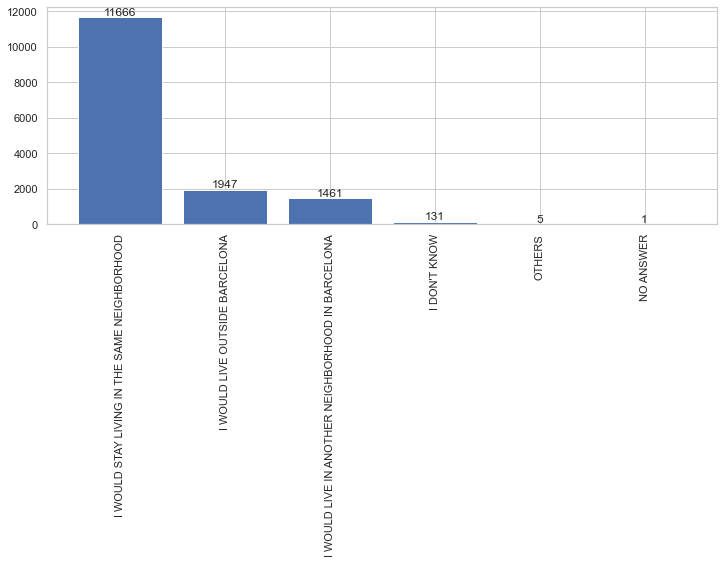

In [50]:
simple_plot(y)

In [51]:
data_prep = {'I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD': 0,
            'I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA': 1,
             'I WOULD LIVE OUTSIDE BARCELONA': np.nan,
             "I DON'T KNOW": np.nan,
             'NO ANSWER': np.nan,
             "OTHERS": np.nan
            }
data['Would_live_in_another_neighborhood'] = [data_prep[i] for i in data[y]]

In [52]:
count_stay = len(data[data['Would_live_in_another_neighborhood']==0])
count_move = len(data[data['Would_live_in_another_neighborhood']==1])
pct_of_stay = count_stay/(count_stay + count_move)
pct_of_move = count_move/(count_stay + count_move)

print("Number of elderly who would change their neighborhood or move out from the city:", count_move)
print("Number of elderly who would stay in their neighborhood:", count_stay)
print("Percentage of elderly who would change their neighborhood or move out from the city:", round(pct_of_move*100,2), '%')
print("Percentage of elderly who would stay in their neighborhood:", round(pct_of_stay*100,2), '%')

Number of elderly who would change their neighborhood or move out from the city: 1461
Number of elderly who would stay in their neighborhood: 11666
Percentage of elderly who would change their neighborhood or move out from the city: 11.13 %
Percentage of elderly who would stay in their neighborhood: 88.87 %


## 1.5.2 Independent variables

First insight into the dataset using cross tabulation of dependent variable and different features:

In [53]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'SEXE',
 'EDAT1899_1A6',
 'NACIO_ACT_UE',
 'SITLABORAL',
 'TMP_RES_BCN_1A6',
 'TMP_RES_BARRI_1A6',
 'EVO1A_BCN',
 'FUTUR_BCN',
 'SATISF_RES_BCN_0A10',
 'PROB_BCN_N1',
 'PROB_PERS_N1',
 'VAL_GESTMUNI',
 'DEM_BCN_MUNI_N1',
 'VAL_ESCOMBRARIES',
 'VAL_NETEJA',
 'VAL_SOROLL',
 'VAL_VERD',
 'VAL_ENLLUM',
 'VAL_URBA',
 'VAL_ASFALT',
 'VAL_FACANES',
 'VAL_CIRCUL',
 'VAL_APARCA',
 'VAL_BUS',
 'VAL_METRO',
 'VAL_BICING',
 'VAL_GUB',
 'VAL_SEGUR',
 'VAL_SEGUR_BARRI',
 'VAL_ESPORT',
 'VAL_SIAC',
 'VAL_CSS',
 'VAL_CULT',
 'VAL_FESTESPOP',
 'VAL_MERCAT',
 'VAL_BIBLIO',
 'TRANSP_MOU',
 'VAL_TRANSP_1A5',
 'VAL_TRANSP_BARRI_1A5',
 'EVO1A_BARRI',
 'FUTUR_BARRI',
 'SATISF_RES_BARRI_0A10',
 'PROB_BARRI_N1',
 'COMPARA_BARRI',
 'CANVI_LLOC_RES_1A3',
 'VAL_GESTBARRI',
 'DEM_BARRI_N1',
 'HAB_COTXE_PART',
 'HAB_M2_1A14',
 'LLAR_INGRESSOS_1A10',
 'CLASSESOC_ENT',
 'SENTPERTI',
 'LLOC_NAIX_1A4',
 'LLENGUA_HAB',
 'ESTUDIS_1A6',
 'RESUM_PARENTIU',
 'HAB_RES_1A4',
 'Would_live_in_another_

In [54]:
for i in data.columns.tolist():
    display(ctab(i))

Would_live_in_another_neighborhood,0.0,1.0
ANY,,
2010,1168,140
2011,1131,145
2012,1149,146
2013,1204,154
2014,1195,130
2015,1225,144
2016,1245,142
2017,1225,117
2018,1059,179


Would_live_in_another_neighborhood,0.0,1.0
NOM_DISTRICTE,,
CIUTAT VELLA,757,166
EIXAMPLE,1967,170
GRÀCIA,965,91
HORTA - GUINARDÓ,1329,184
LES CORTS,1068,49
NOU BARRIS,1178,217
SANT ANDREU,962,154
SANT MARTÍ,1382,170
SANTS - MONTJUÏC,994,210


Would_live_in_another_neighborhood,0.0,1.0
SEXE,,
MAN,4557,538
WOMAN,7109,923


Would_live_in_another_neighborhood,0.0,1.0
EDAT1899_1A6,,
65 YEARS AND OVER,11666,1461


Would_live_in_another_neighborhood,0.0,1.0
NACIO_ACT_UE,,
OTHER EU,100,7
REMAINING COUNTRIES,101,17
SPANISH,11465,1437


Would_live_in_another_neighborhood,0.0,1.0
SITLABORAL,,
HOMEWORK (NOT PAID),730,93
NO ANSWER,5,0
RETIREMENT / PENSIONER / WORK DISABILITY,10736,1343
SELF-EMPLOYED,99,14
STUDENT,1,0
UNEMPLOYED / LOOKING FOR WORK,5,1
WORK FOR OTHERS,90,10


Would_live_in_another_neighborhood,0.0,1.0
TMP_RES_BCN_1A6,,
FROM 6 MONTHS TO 2 YEARS,40,11
I HAVE ALWAYS LIVED IN THE CITY,4894,676
MORE THAN 10 YEARS,6588,753
MORE THAN 2 YEARS AND UP TO 5 YEARS,67,10
MORE THAN 5 YEARS AND UP TO 10 YEARS,77,11


Would_live_in_another_neighborhood,0.0,1.0
TMP_RES_BARRI_1A6,,
FROM 6 MONTHS TO 2 YEARS,128,34
I HAVE ALWAYS LIVED IN THE BARRI,1667,133
LESS THAN SIX MONTHS,33,10
MORE THAN 10 YEARS,9408,1159
MORE THAN 2 YEARS AND UP TO 5 YEARS,164,54
MORE THAN 5 YEARS AND UP TO 10 YEARS,266,71


Would_live_in_another_neighborhood,0.0,1.0
EVO1A_BCN,,
I DON'T KNOW,307,28
IT HAS IMPROVED,3832,381
IT HAS WORSENED,4401,719
IT'S THE SAME,3120,332
NO ANSWER,6,1


Would_live_in_another_neighborhood,0.0,1.0
FUTUR_BCN,,
I DON'T KNOW,1733,208
IT WILL IMPROVE,6024,658
IT WILL STAY THE SAME,1160,164
IT WILL WORSEN,2740,429
NO ANSWER,9,2


Would_live_in_another_neighborhood,0.0,1.0
SATISF_RES_BCN_0A10,,
0,49,6
1,5,1
2,19,5
3,39,9
4,107,38
5,419,104
6,565,95
7,1531,223
8,3312,414


Would_live_in_another_neighborhood,0.0,1.0
PROB_BCN_N1,,
ACCESS TO THE HOUSE,204,30
AUTONOMOUS POLITICAL MANAGEMENT,16,5
BENEFITS AND GRANTS,73,12
CAMP NOU,2,0
CIRCULATION / TRAFFIC,664,57
CITY MODEL,61,9
COMMERCE,50,7
CORRUPTION AND FRAUD,66,5
DRUGS,34,8


Would_live_in_another_neighborhood,0.0,1.0
PROB_PERS_N1,,
ACCESS TO THE HOUSE,108,18
AUTONOMOUS POLITICAL MANAGEMENT,11,2
BENEFITS AND GRANTS,1251,169
CAMP NOU,1,0
CIRCULATION / TRAFFIC,166,16
CITY MODEL,25,5
COMMERCE,25,3
CORRUPTION AND FRAUD,134,17
DRUGS,22,2


Would_live_in_another_neighborhood,0.0,1.0
VAL_GESTMUNI,,
0,369,63
1,56,16
2,181,36
3,400,52
4,822,142
5,2261,327
6,2017,270
7,2423,240
8,1803,187


Would_live_in_another_neighborhood,0.0,1.0
DEM_BCN_MUNI_N1,,
CHANGING SOCIAL VALUES / PROMOTING CIVILIZATION / EDUCATION,312,43
CHANGING THE CITY MODEL,176,30
CONTROLING / ELIMINATING CORRUPTION AND FRAUD,34,7
CONTROLING / ELIMINATING PROSTITUTION,1,2
ELIMINATING / REDUCING THE DISORDERS OF THE CAMP NOU,2,0
ERADICATING THE DRUGS,17,3
EVERYTHING,18,1
FACILITATING ACCESS TO HOUSING,318,52
FIGHTING TERRORISM,1,0


Would_live_in_another_neighborhood,0.0,1.0
VAL_ESCOMBRARIES,,
0,77,17
1,24,8
2,72,18
3,117,29
4,271,37
5,807,116
6,1148,149
7,2550,311
8,3957,511


Would_live_in_another_neighborhood,0.0,1.0
VAL_NETEJA,,
0,251,52
1,59,12
2,191,37
3,382,80
4,836,136
5,1462,201
6,1627,231
7,2390,257
8,2820,301


Would_live_in_another_neighborhood,0.0,1.0
VAL_SOROLL,,
0,434,101
1,149,38
2,428,85
3,879,150
4,1427,201
5,2016,216
6,1745,191
7,1918,212
8,1592,160


Would_live_in_another_neighborhood,0.0,1.0
VAL_VERD,,
0,214,51
1,52,14
2,187,38
3,411,67
4,894,160
5,1529,250
6,1691,219
7,2525,252
8,2469,266


Would_live_in_another_neighborhood,0.0,1.0
VAL_ENLLUM,,
0,83,12
1,26,4
2,70,21
3,183,41
4,617,97
5,1173,184
6,1824,218
7,3180,377
8,3045,350


Would_live_in_another_neighborhood,0.0,1.0
VAL_URBA,,
0,144,29
1,18,2
2,100,21
3,248,56
4,653,120
5,1617,241
6,2071,262
7,2707,283
8,1954,208


Would_live_in_another_neighborhood,0.0,1.0
VAL_ASFALT,,
0,236,45
1,50,10
2,223,42
3,565,102
4,1244,185
5,1885,269
6,2075,222
7,2592,288
8,1904,210


Would_live_in_another_neighborhood,0.0,1.0
VAL_FACANES,,
0,149,27
1,34,5
2,92,19
3,244,54
4,671,122
5,1706,253
6,2306,320
7,2906,307
8,2126,211


Would_live_in_another_neighborhood,0.0,1.0
VAL_CIRCUL,,
0,280,41
1,88,16
2,412,57
3,962,144
4,1744,237
5,2362,293
6,2074,274
7,1759,171
8,1033,128


Would_live_in_another_neighborhood,0.0,1.0
VAL_APARCA,,
0,1256,210
1,379,68
2,1203,164
3,1738,224
4,1833,202
5,1424,176
6,843,102
7,648,48
8,375,38


Would_live_in_another_neighborhood,0.0,1.0
VAL_BUS,,
0,121,19
1,26,5
2,77,22
3,205,41
4,549,103
5,851,142
6,1280,171
7,2631,315
8,3418,403


Would_live_in_another_neighborhood,0.0,1.0
VAL_METRO,,
0,34,7
1,12,1
2,22,11
3,58,6
4,166,30
5,450,85
6,887,125
7,2329,310
8,3863,478


Would_live_in_another_neighborhood,0.0,1.0
VAL_BICING,,
0,450,64
1,65,9
2,188,47
3,333,63
4,597,78
5,639,87
6,631,78
7,1010,127
8,878,107


Would_live_in_another_neighborhood,0.0,1.0
VAL_GUB,,
0,326,49
1,57,10
2,188,44
3,442,78
4,938,128
5,1729,254
6,1925,229
7,2070,216
8,1648,184


Would_live_in_another_neighborhood,0.0,1.0
VAL_SEGUR,,
0,394,74
1,104,21
2,395,76
3,938,133
4,1828,253
5,2155,271
6,2042,228
7,1883,196
8,1008,93


Would_live_in_another_neighborhood,0.0,1.0
VAL_SEGUR_BARRI,,
0,355,82
1,103,35
2,344,95
3,770,163
4,1354,205
5,1824,221
6,1959,206
7,2319,229
8,1824,156


Would_live_in_another_neighborhood,0.0,1.0
VAL_ESPORT,,
0,181,36
1,35,5
2,97,24
3,182,52
4,461,79
5,830,130
6,1059,148
7,1787,229
8,1638,169


Would_live_in_another_neighborhood,0.0,1.0
VAL_SIAC,,
0,105,24
1,20,4
2,86,13
3,136,28
4,283,50
5,718,115
6,1151,152
7,2262,275
8,2460,297


Would_live_in_another_neighborhood,0.0,1.0
VAL_CSS,,
0,124,29
1,21,10
2,96,17
3,169,37
4,402,66
5,712,107
6,922,118
7,1469,179
8,1705,196


Would_live_in_another_neighborhood,0.0,1.0
VAL_CULT,,
0,38,12
1,7,6
2,31,8
3,83,17
4,235,43
5,572,109
6,1004,146
7,2315,276
8,2796,283


Would_live_in_another_neighborhood,0.0,1.0
VAL_FESTESPOP,,
0,111,23
1,17,4
2,69,11
3,157,35
4,350,63
5,845,130
6,1254,185
7,2491,273
8,2536,255


Would_live_in_another_neighborhood,0.0,1.0
VAL_MERCAT,,
0,83,13
1,11,6
2,71,13
3,151,20
4,379,68
5,703,103
6,1010,159
7,2429,339
8,3593,399


Would_live_in_another_neighborhood,0.0,1.0
VAL_BIBLIO,,
0,39,3
1,5,0
2,16,4
3,33,8
4,91,17
5,275,39
6,496,84
7,1524,202
8,2851,359


Would_live_in_another_neighborhood,0.0,1.0
TRANSP_MOU,,
BICYCLE,34,6
BICYCLE (BICING),11,5
BUS,5078,694
CAR,579,58
METRO / CATALAN RAILWAYS (FGC) URBAN,3567,468
MOTORCYCLE,95,14
NO ANSWER,2,0
OTHERS,31,4
TAXI,412,31


Would_live_in_another_neighborhood,0.0,1.0
VAL_TRANSP_1A5,,
I DON'T KNOW,221,30
LITTLE EQUIPPED,832,142
NO ANSWER,3,0
NORMAL,991,136
NOTHING EQUIPPED,35,9
PRETTY EQUIPPED,7871,955
VERY GIFTED,1713,189


Would_live_in_another_neighborhood,0.0,1.0
VAL_TRANSP_BARRI_1A5,,
I DON'T KNOW,74,8
LITTLE EQUIPPED,1175,210
NO ANSWER,3,0
NORMAL,964,167
NOTHING EQUIPPED,103,29
PRETTY EQUIPPED,7041,808
VERY GIFTED,2306,239


Would_live_in_another_neighborhood,0.0,1.0
EVO1A_BARRI,,
I DON'T KNOW,91,21
IT HAS IMPROVED,6117,584
IT HAS WORSENED,2045,485
IT'S THE SAME,3411,371
NO ANSWER,2,0


Would_live_in_another_neighborhood,0.0,1.0
FUTUR_BARRI,,
I DON'T KNOW,1487,202
IT WILL IMPROVE,6507,617
IT WILL STAY THE SAME,2153,252
IT WILL WORSEN,1516,390
NO ANSWER,3,0


Would_live_in_another_neighborhood,0.0,1.0
SATISF_RES_BARRI_0A10,,
0,15,31
1,6,6
2,11,26
3,15,34
4,52,65
5,230,150
6,471,160
7,1403,275
8,3821,398


Would_live_in_another_neighborhood,0.0,1.0
PROB_BARRI_N1,,
ACCESS TO THE HOUSE,117,11
BENEFITS AND GRANTS,11,1
CAMP NOU,38,2
CIRCULATION / TRAFFIC,387,33
CITY MODEL,93,16
COMMERCE,360,54
DRUGS,84,29
ECONOMIC PROBLEMS,67,7
EQUIPMENT AND SERVICES,341,36


Would_live_in_another_neighborhood,0.0,1.0
COMPARA_BARRI,,
I DON'T KNOW,245,38
"NEITHER THE BEST, NOR THE WORST",4147,854
NO ANSWER,4,2
ONE OF THE BEST,7023,324
ONE OF THE WORST,247,243


Would_live_in_another_neighborhood,0.0,1.0
CANVI_LLOC_RES_1A3,,
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA,0,1461
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD,11666,0


Would_live_in_another_neighborhood,0.0,1.0
VAL_GESTBARRI,,
0,170,53
1,32,17
2,105,33
3,222,49
4,525,108
5,1531,271
6,2107,258
7,2799,293
8,2253,165


Would_live_in_another_neighborhood,0.0,1.0
DEM_BARRI_N1,,
CHANGING SOCIAL VALUES / PROMOTING CIVILIZATION / EDUCATION,210,35
CHANGING THE CITY MODEL,71,11
CONTROLING / ELIMINATING PROSTITUTION,0,1
ELIMINATING / REDUCING THE DISORDERS OF THE CAMP NOU,8,0
ERADICATING THE DRUGS,29,8
EVERYTHING,11,2
FACILITATING ACCESS TO HOUSING,113,17
FIGHTING UNEMPLOYMENT / IMPROVING WORKING CONDITIONS,77,4
I DON'T KNOW,1100,95


Would_live_in_another_neighborhood,0.0,1.0
HAB_COTXE_PART,,
I DON'T KNOW,3,0
I DON'T WANT / I DON'T NEED,848,136
IT'S NOT POSSIBLE,151,32
NO,5011,567
NO ANSWER,75,14
YES,5578,712


Would_live_in_another_neighborhood,0.0,1.0
HAB_M2_1A14,,
FROM 101 TO 110 M2,79,10
FROM 101 TO 120 M2,710,58
FROM 111 TO 120 M2,70,5
FROM 121 TO 130 M2,42,7
FROM 121 TO 150 M2,416,32
FROM 131 TO 140 M2,38,3
FROM 141 TO 150 M2,28,3
FROM 151 TO 160 M2,14,1
FROM 161 TO 170 M2,18,2


Would_live_in_another_neighborhood,0.0,1.0
LLAR_INGRESSOS_1A10,,
"FROM 1,001 TO 1,500 EUROS",2250,283
"FROM 1,501 TO 2,000 EUROS",1354,197
"FROM 2,001 TO 2,500 EUROS",757,90
"FROM 2,501 TO 3,000 EUROS",432,54
"FROM 3,001 TO 5,000 EUROS",522,54
"FROM 5,001 TO 7,000 EUROS",26,3
"FROM 500 TO 1,000 EUROS",2691,365
"FROM 7,001 TO 9,000 EUROS",5,0
I DON'T KNOW,726,68


Would_live_in_another_neighborhood,0.0,1.0
CLASSESOC_ENT,,
HIGH CLASS,47,2
I DON'T KNOW,282,23
LOW CLASS,1150,194
MIDDLE-HIGH CLASS,525,51
MIDDLE-LOW CLASS,3676,535
MIDDLE-MIDDLE CLASS,5843,635
NO ANSWER,143,21


Would_live_in_another_neighborhood,0.0,1.0
SENTPERTI,,
"HALF SPANISH, HALF CATALAN",4350,546
I DON'T KNOW,73,9
MORE CATALAN THAN SPANISH,2942,359
MORE SPANISH THAN CATALAN,699,90
NO ANSWER,128,16
ONLY CATALAN,2372,293
ONLY SPANISH,886,112
OTHER,216,36


Would_live_in_another_neighborhood,0.0,1.0
LLOC_NAIX_1A4,,
BARCELONA CITY,5212,722
FOREIGN,500,67
NO ANSWER,9,1
REST OF CATALONIA,1412,139
REST OF SPAIN,4533,532


Would_live_in_another_neighborhood,0.0,1.0
LLENGUA_HAB,,
CATALAN,6185,741
NO ANSWER,6,0
OTHER,57,16
SPANISH,5418,704


Would_live_in_another_neighborhood,0.0,1.0
ESTUDIS_1A6,,
COMPULSORY STUDIES NOT FINISHED,1353,151
GENERAL SECONDARY,1574,206
MANDATORY,4943,609
NO ANSWER,39,6
POST UNIVERSITY,96,11
PROFESSIONAL SECONDARY,1644,217
UNIVERSITY,2017,261


Would_live_in_another_neighborhood,0.0,1.0
RESUM_PARENTIU,,
COUPLE WITH CHILDREN,1207,150
COUPLE WITH NO CHILDREN,5105,646
NO ANSWER,1,0
OTHER FAMILY,469,69
OTHER SITUATIONS,167,12
SINGLE,3534,448
SINGLE-PARENT WITH CHILDREN,1183,136


Would_live_in_another_neighborhood,0.0,1.0
HAB_RES_1A4,,
FOUR OR MORE,568,59
ONE,3534,448
THREE,1339,151
TWO,6225,803


Would_live_in_another_neighborhood,0.0,1.0
Would_live_in_another_neighborhood,,
0.0,11666,0
1.0,0,1461


In [55]:
for i in data.columns.tolist():
    display(size_pctg(i))

ANY
2010     9.66
2011     9.98
2012    10.04
2013    10.18
2014    10.14
2015    10.30
2016    10.26
2017     9.86
2018     9.85
2019     9.74
dtype: float64

NOM_DISTRICTE
CIUTAT VELLA              7.30
EIXAMPLE                 15.85
GRÀCIA                    7.91
HORTA - GUINARDÓ         11.52
LES CORTS                 8.01
NOU BARRIS               11.20
SANT ANDREU               8.36
SANT MARTÍ               12.00
SANTS - MONTJUÏC          9.59
SARRIÀ - SANT GERVASI     8.26
dtype: float64

SEXE
MAN      40.06
WOMAN    59.94
dtype: float64

EDAT1899_1A6
65 YEARS AND OVER    100.0
dtype: float64

NACIO_ACT_UE
OTHER EU                0.78
REMAINING COUNTRIES     0.88
SPANISH                98.34
dtype: float64

SITLABORAL
HOMEWORK (NOT PAID)                          6.20
NO ANSWER                                    0.04
RETIREMENT / PENSIONER / WORK DISABILITY    91.91
SELF-EMPLOYED                                0.91
STUDENT                                      0.01
UNEMPLOYED / LOOKING FOR WORK                0.04
WORK FOR OTHERS                              0.89
dtype: float64

TMP_RES_BCN_1A6
FROM 6 MONTHS TO 2 YEARS                 0.40
I HAVE ALWAYS LIVED IN THE CITY         41.71
MORE THAN 10 YEARS                      56.56
MORE THAN 2 YEARS AND UP TO 5 YEARS      0.60
MORE THAN 5 YEARS AND UP TO 10 YEARS     0.72
dtype: float64

TMP_RES_BARRI_1A6
FROM 6 MONTHS TO 2 YEARS                 1.27
I HAVE ALWAYS LIVED IN THE BARRI        13.32
LESS THAN SIX MONTHS                     0.33
MORE THAN 10 YEARS                      80.76
MORE THAN 2 YEARS AND UP TO 5 YEARS      1.73
MORE THAN 5 YEARS AND UP TO 10 YEARS     2.59
dtype: float64

EVO1A_BCN
I DON'T KNOW        2.65
IT HAS IMPROVED    31.00
IT HAS WORSENED    40.54
IT'S THE SAME      25.73
NO ANSWER           0.08
dtype: float64

FUTUR_BCN
I DON'T KNOW             14.96
IT WILL IMPROVE          49.64
IT WILL STAY THE SAME     9.93
IT WILL WORSEN           25.38
NO ANSWER                 0.10
dtype: float64

SATISF_RES_BCN_0A10
0                0.68
1                0.09
2                0.40
3                0.59
4                1.55
5                4.98
6                5.70
7               13.77
8               27.78
9               15.92
10              28.16
I DON'T KNOW     0.28
NO ANSWER        0.10
dtype: float64

PROB_BCN_N1
ACCESS TO THE HOUSE                            1.78
AUTONOMOUS POLITICAL MANAGEMENT                0.18
BENEFITS AND GRANTS                            0.62
CAMP NOU                                       0.01
CIRCULATION / TRAFFIC                          5.56
CITY MODEL                                     0.57
COMMERCE                                       0.41
CORRUPTION AND FRAUD                           0.57
DRUGS                                          0.34
ECONOMIC PROBLEMS                              3.78
EQUIPMENT AND SERVICES                         2.27
EVERYTHING                                     0.02
FINANCIAL CUTS                                 0.79
GREEN SPACES                                   0.32
I DON'T KNOW                                   4.31
INEQUALITY / IMBALANCE / TERRITORIAL MODEL     0.24
INSECURITY                                    13.94
LACE FROM CATALONIA TO SPAIN                   2.84
LEISURE AREAS                                  0.03


PROB_PERS_N1
ACCESS TO THE HOUSE                            0.95
AUTONOMOUS POLITICAL MANAGEMENT                0.12
BENEFITS AND GRANTS                           10.97
CAMP NOU                                       0.01
CIRCULATION / TRAFFIC                          1.45
CITY MODEL                                     0.23
COMMERCE                                       0.22
CORRUPTION AND FRAUD                           1.18
DRUGS                                          0.18
ECONOMIC PROBLEMS                              7.80
EQUIPMENT AND SERVICES                         3.73
EVERYTHING                                     0.05
FINANCIAL CUTS                                 2.38
GREEN SPACES                                   0.20
I DON'T KNOW                                   2.77
INEQUALITY / IMBALANCE / TERRITORIAL MODEL     0.09
INSECURITY                                     6.30
LACE FROM CATALONIA TO SPAIN                   3.46
LEISURE AREAS                                  0.01

VAL_GESTMUNI
0                3.75
1                0.66
2                1.85
3                3.69
4                7.63
5               20.01
6               17.26
7               19.65
8               14.62
9                3.48
10               2.85
I DON'T KNOW     4.30
NO ANSWER        0.22
dtype: float64

DEM_BCN_MUNI_N1
CHANGING SOCIAL VALUES / PROMOTING CIVILIZATION / EDUCATION     2.84
CHANGING THE CITY MODEL                                         1.65
CONTROLING / ELIMINATING CORRUPTION AND FRAUD                   0.32
CONTROLING / ELIMINATING PROSTITUTION                           0.03
ELIMINATING / REDUCING THE DISORDERS OF THE CAMP NOU            0.01
ERADICATING THE DRUGS                                           0.16
EVERYTHING                                                      0.14
FACILITATING ACCESS TO HOUSING                                  2.85
FIGHTING TERRORISM                                              0.01
FIGHTING UNEMPLOYMENT / IMPROVING WORKING CONDITIONS            6.04
I DON'T KNOW                                                    5.97
IMPROVING AUTONOMOUS POLITICAL MANAGEMENT                       0.04
IMPROVING CIRCULATION / TRAFFIC                                 3.25
IMPROVING MAINTENANCE                                           4.67
IMPROVING MUNICIPA

VAL_ESCOMBRARIES
0                0.88
1                0.24
2                0.72
3                1.23
4                2.52
5                7.33
6                9.91
7               21.69
8               33.74
9               11.20
10              10.12
I DON'T KNOW     0.40
NO ANSWER        0.01
dtype: float64

VAL_NETEJA
0                2.64
1                0.60
2                1.87
3                3.75
4                7.61
5               12.76
6               14.15
7               19.87
8               23.26
9                7.07
10               6.17
I DON'T KNOW     0.22
NO ANSWER        0.01
dtype: float64

VAL_SOROLL
0                4.81
1                1.54
2                4.21
3                8.32
4               12.62
5               16.86
6               14.42
7               15.81
8               12.77
9                3.18
10               2.58
I DON'T KNOW     2.85
NO ANSWER        0.04
dtype: float64

VAL_VERD
0                2.34
1                0.56
2                1.80
3                3.97
4                8.37
5               13.97
6               14.69
7               20.88
8               20.04
9                5.07
10               3.75
I DON'T KNOW     4.54
NO ANSWER        0.03
dtype: float64

VAL_ENLLUM
0                0.78
1                0.24
2                0.80
3                1.82
4                5.61
5               10.54
6               15.67
7               26.89
8               25.61
9                5.77
10               4.54
I DON'T KNOW     1.70
NO ANSWER        0.03
dtype: float64

VAL_URBA
0                1.49
1                0.17
2                1.06
3                2.56
4                6.34
5               14.38
6               17.79
7               22.15
8               16.05
9                3.96
10               2.52
I DON'T KNOW    11.48
NO ANSWER        0.05
dtype: float64

VAL_ASFALT
0                2.41
1                0.52
2                2.20
3                5.51
4               11.27
5               16.47
6               17.37
7               21.35
8               15.63
9                3.64
10               2.38
I DON'T KNOW     1.23
NO ANSWER        0.03
dtype: float64

VAL_FACANES
0                1.54
1                0.34
2                0.97
3                2.41
4                6.32
5               15.49
6               19.78
7               24.15
8               17.22
9                3.46
10               2.26
I DON'T KNOW     5.84
NO ANSWER        0.20
dtype: float64

VAL_CIRCUL
0                2.78
1                0.92
2                3.85
3                8.63
4               15.23
5               20.02
6               17.67
7               14.60
8                8.43
9                1.60
10               1.19
I DON'T KNOW     5.02
NO ANSWER        0.06
dtype: float64

VAL_APARCA
0               12.04
1                3.56
2               10.63
3               15.08
4               15.39
5               12.00
6                6.92
7                5.15
8                3.02
9                0.66
10               0.67
I DON'T KNOW    14.77
NO ANSWER        0.10
dtype: float64

VAL_BUS
0                1.12
1                0.27
2                0.83
3                2.05
4                5.05
5                7.90
6               11.10
7               22.40
8               28.81
9                8.77
10               6.35
I DON'T KNOW     5.31
NO ANSWER        0.02
dtype: float64

VAL_METRO
0                0.36
1                0.11
2                0.30
3                0.56
4                1.56
5                4.29
6                7.77
7               20.25
8               32.92
9               12.00
10               7.68
I DON'T KNOW    12.14
NO ANSWER        0.06
dtype: float64

VAL_BICING
0                4.14
1                0.57
2                1.88
3                3.10
4                5.09
5                5.53
6                5.52
7                8.53
8                7.47
9                2.01
10               1.56
I DON'T KNOW    54.41
NO ANSWER        0.18
dtype: float64

VAL_GUB
0                3.27
1                0.58
2                1.97
3                4.26
4                8.51
5               15.28
6               16.09
7               16.99
8               13.47
9                4.17
10               3.75
I DON'T KNOW    11.54
NO ANSWER        0.11
dtype: float64

VAL_SEGUR
0                4.04
1                1.12
2                3.87
3                8.45
4               15.92
5               18.27
6               16.93
7               15.41
8                8.27
9                1.70
10               1.18
I DON'T KNOW     4.81
NO ANSWER        0.03
dtype: float64

VAL_SEGUR_BARRI
0                3.96
1                1.33
2                3.55
3                7.34
4               12.16
5               15.78
6               16.14
7               18.72
8               14.40
9                3.42
10               1.97
I DON'T KNOW     1.21
NO ANSWER        0.01
dtype: float64

VAL_ESPORT
0                1.98
1                0.33
2                1.09
3                1.99
4                4.31
5                7.53
6                9.28
7               15.24
8               13.37
9                3.07
10               2.39
I DON'T KNOW    39.27
NO ANSWER        0.14
dtype: float64

VAL_SIAC
0                1.16
1                0.21
2                0.83
3                1.37
4                2.73
5                6.75
6               10.12
7               19.04
8               20.35
9                5.83
10               4.08
I DON'T KNOW    27.48
NO ANSWER        0.06
dtype: float64

VAL_CSS
0                1.39
1                0.32
2                0.91
3                1.76
4                3.65
5                6.34
6                7.98
7               12.38
8               14.11
9                5.09
10               4.72
I DON'T KNOW    41.23
NO ANSWER        0.12
dtype: float64

VAL_CULT
0                0.51
1                0.11
2                0.37
3                0.84
4                2.23
5                5.39
6                8.88
7               19.41
8               22.79
9                5.38
10               2.94
I DON'T KNOW    31.06
NO ANSWER        0.09
dtype: float64

VAL_FESTESPOP
0                1.22
1                0.17
2                0.76
3                1.58
4                3.39
5                7.82
6               10.97
7               20.71
8               20.69
9                5.40
10               3.66
I DON'T KNOW    23.56
NO ANSWER        0.07
dtype: float64

VAL_MERCAT
0                0.82
1                0.16
2                0.64
3                1.47
4                3.61
5                6.38
6                9.18
7               20.95
8               30.15
9                9.96
10               6.90
I DON'T KNOW     9.74
NO ANSWER        0.04
dtype: float64

VAL_BIBLIO
0                0.32
1                0.05
2                0.20
3                0.34
4                0.84
5                2.49
6                4.59
7               13.29
8               24.21
9               10.59
10               5.93
I DON'T KNOW    37.08
NO ANSWER        0.07
dtype: float64

TRANSP_MOU
BICYCLE                                  0.30
BICYCLE (BICING)                         0.11
BUS                                     43.71
CAR                                      5.06
METRO / CATALAN RAILWAYS (FGC) URBAN    30.89
MOTORCYCLE                               0.93
NO ANSWER                                0.02
OTHERS                                   0.28
TAXI                                     3.12
TRAIN (RENFE / FGC INTERURBAN)           0.28
TRAM (TRAM, TRAMBAIX, TRAMBESÒS)         0.41
WALKING                                 14.89
dtype: float64

VAL_TRANSP_1A5
I DON'T KNOW         1.91
LITTLE EQUIPPED      7.88
NO ANSWER            0.02
NORMAL               8.83
NOTHING EQUIPPED     0.36
PRETTY EQUIPPED     66.58
VERY GIFTED         14.42
dtype: float64

VAL_TRANSP_BARRI_1A5
I DON'T KNOW         0.64
LITTLE EQUIPPED     10.87
NO ANSWER            0.02
NORMAL               8.81
NOTHING EQUIPPED     1.03
PRETTY EQUIPPED     59.65
VERY GIFTED         18.98
dtype: float64

EVO1A_BARRI
I DON'T KNOW        0.91
IT HAS IMPROVED    49.36
IT HAS WORSENED    21.31
IT'S THE SAME      28.41
NO ANSWER           0.01
dtype: float64

FUTUR_BARRI
I DON'T KNOW             13.24
IT WILL IMPROVE          52.41
IT WILL STAY THE SAME    18.13
IT WILL WORSEN           16.20
NO ANSWER                 0.02
dtype: float64

SATISF_RES_BARRI_0A10
0                0.59
1                0.14
2                0.45
3                0.60
4                1.28
5                3.81
6                5.61
7               13.37
8               31.67
9               19.33
10              22.88
I DON'T KNOW     0.24
NO ANSWER        0.04
dtype: float64

PROB_BARRI_N1
ACCESS TO THE HOUSE                            0.97
BENEFITS AND GRANTS                            0.08
CAMP NOU                                       0.30
CIRCULATION / TRAFFIC                          3.08
CITY MODEL                                     0.91
COMMERCE                                       3.08
DRUGS                                          1.06
ECONOMIC PROBLEMS                              0.57
EQUIPMENT AND SERVICES                         2.86
EVERYTHING                                     0.01
FINANCIAL CUTS                                 0.07
GREEN SPACES                                   1.79
I DON'T KNOW                                   8.12
INEQUALITY / IMBALANCE / TERRITORIAL MODEL     0.14
INSECURITY                                    15.57
LACE FROM CATALONIA TO SPAIN                   0.09
LEISURE AREAS                                  0.34
MAINTENANCE                                    4.10
MALE AND DOMESTIC VIOLENCE                     0.0

COMPARA_BARRI
I DON'T KNOW                        2.25
NEITHER THE BEST, NOR THE WORST    40.04
NO ANSWER                           0.05
ONE OF THE BEST                    53.01
ONE OF THE WORST                    4.64
dtype: float64

CANVI_LLOC_RES_1A3
I DON'T KNOW                                          0.86
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA     9.60
I WOULD LIVE OUTSIDE BARCELONA                       12.80
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD         76.69
NO ANSWER                                             0.01
OTHERS                                                0.03
dtype: float64

VAL_GESTBARRI
0                2.12
1                0.40
2                1.39
3                2.43
4                5.31
5               14.49
6               17.88
7               22.61
8               17.45
9                4.04
10               3.19
I DON'T KNOW     8.57
NO ANSWER        0.12
dtype: float64

DEM_BARRI_N1
CHANGING SOCIAL VALUES / PROMOTING CIVILIZATION / EDUCATION     1.89
CHANGING THE CITY MODEL                                         0.64
CONTROLING / ELIMINATING CORRUPTION AND FRAUD                   0.01
CONTROLING / ELIMINATING PROSTITUTION                           0.02
ELIMINATING / REDUCING THE DISORDERS OF THE CAMP NOU            0.07
ERADICATING THE DRUGS                                           0.32
EVERYTHING                                                      0.09
FACILITATING ACCESS TO HOUSING                                  1.00
FIGHTING UNEMPLOYMENT / IMPROVING WORKING CONDITIONS            0.59
I DON'T KNOW                                                    8.99
IMPROVING CIRCULATION / TRAFFIC                                 2.28
IMPROVING MAINTENANCE                                          10.63
IMPROVING MUNICIPAL POLITICAL MANAGEMENT                        1.78
IMPROVING POLITICAL ASPECTS                                     2.27
IMPROVING POLLUTION A

HAB_COTXE_PART
I DON'T KNOW                    0.03
I DON'T WANT / I DON'T NEED     7.44
IT'S NOT POSSIBLE               1.47
NO                             41.33
NO ANSWER                       0.64
YES                            49.09
dtype: float64

HAB_M2_1A14
FROM 101 TO 110 M2     0.70
FROM 101 TO 120 M2     5.59
FROM 111 TO 120 M2     0.62
FROM 121 TO 130 M2     0.37
FROM 121 TO 150 M2     3.31
FROM 131 TO 140 M2     0.33
FROM 141 TO 150 M2     0.24
FROM 151 TO 160 M2     0.11
FROM 161 TO 170 M2     0.15
FROM 51 TO 60 M2      11.62
FROM 61 TO 70 M2      19.64
FROM 71 TO 80 M2      16.24
FROM 81 TO 90 M2      12.27
FROM 91 TO 100 M2      9.30
I DON'T KNOW           6.79
MORE THAN 150 M2       3.20
MORE THAN 170 M2       0.49
NO ANSWER              1.97
UP TO 50 M2            7.06
dtype: float64

LLAR_INGRESSOS_1A10
FROM 1,001 TO 1,500 EUROS    19.48
FROM 1,501 TO 2,000 EUROS    12.06
FROM 2,001 TO 2,500 EUROS     6.45
FROM 2,501 TO 3,000 EUROS     3.79
FROM 3,001 TO 5,000 EUROS     4.37
FROM 5,001 TO 7,000 EUROS     0.20
FROM 500 TO 1,000 EUROS      23.15
FROM 7,001 TO 9,000 EUROS     0.04
I DON'T KNOW                  5.84
LESS THAN 500 EUROS           2.23
MORE THAN 5,000 EUROS         0.47
MORE THAN 9,000 EUROS         0.09
NO ANSWER                    21.83
dtype: float64

CLASSESOC_ENT
HIGH CLASS              0.33
I DON'T KNOW            2.39
LOW CLASS              10.71
MIDDLE-HIGH CLASS       4.18
MIDDLE-LOW CLASS       32.56
MIDDLE-MIDDLE CLASS    48.58
NO ANSWER               1.26
dtype: float64

SENTPERTI
HALF SPANISH, HALF CATALAN    37.01
I DON'T KNOW                   0.66
MORE CATALAN THAN SPANISH     24.70
MORE SPANISH THAN CATALAN      6.34
NO ANSWER                      1.15
ONLY CATALAN                  20.13
ONLY SPANISH                   8.05
OTHER                          1.96
dtype: float64

LLOC_NAIX_1A4
BARCELONA CITY       44.58
FOREIGN               4.25
NO ANSWER             0.07
REST OF CATALONIA    11.89
REST OF SPAIN        39.22
dtype: float64

LLENGUA_HAB
CATALAN      51.88
NO ANSWER     0.06
OTHER         0.57
SPANISH      47.49
dtype: float64

ESTUDIS_1A6
COMPULSORY STUDIES NOT FINISHED    11.58
GENERAL SECONDARY                  13.69
MANDATORY                          41.96
NO ANSWER                           0.32
POST UNIVERSITY                     0.87
PROFESSIONAL SECONDARY             14.23
UNIVERSITY                         17.35
dtype: float64

RESUM_PARENTIU
COUPLE WITH CHILDREN           10.91
COUPLE WITH NO CHILDREN        43.95
NO ANSWER                       0.01
OTHER FAMILY                    4.13
OTHER SITUATIONS                1.31
SINGLE                         29.48
SINGLE-PARENT WITH CHILDREN    10.22
dtype: float64

HAB_RES_1A4
FOUR OR MORE     5.06
ONE             29.48
THREE           11.83
TWO             53.64
dtype: float64

Would_live_in_another_neighborhood
0.0    88.87
1.0    11.13
dtype: float64

In the tables above we can see that elderly people of Barcelona rarely use: parkings, Bicing (city bicycle service in Barcelona), sport centres, centres of citizen information and services, centres of social services, cultural activities, popular festivals, public libraries (in all those cases more than 50% of respondents said that they don't use those services). Therefore when they rate those services, they often answer "I don't know".

In [56]:
additional_sample_description = ['NACIO_ACT_UE',
                                 'LLOC_NAIX_1A4',
                      'SITLABORAL',
                      'CLASSESOC_ENT',
                      'RESUM_PARENTIU',
                      'PROB_BCN_N1',
                      'PROB_BARRI_N1',
                      'PROB_PERS_N1', 
                      'DEM_BCN_MUNI_N1',
                      'DEM_BARRI_N1',
                      'TRANSP_MOU',
                      'SENTPERTI',
                      'LLENGUA_HAB',
                      'ESTUDIS_1A6']

In [57]:
city_services = ['VAL_ESCOMBRARIES',
 'VAL_NETEJA',
 'VAL_SOROLL',
 'VAL_VERD',
 'VAL_ENLLUM',
 'VAL_URBA',
 'VAL_ASFALT',
 'VAL_FACANES',
 'VAL_CIRCUL',
 'VAL_APARCA',
 'VAL_BUS',
 'VAL_METRO',
 'VAL_BICING',
 'VAL_GUB',
 'VAL_SEGUR',
 'VAL_SEGUR_BARRI',
 'VAL_ESPORT',
 'VAL_SIAC',
 'VAL_CSS',
 'VAL_CULT',
 'VAL_FESTESPOP',
 'VAL_MERCAT',
 'VAL_BIBLIO',
 'VAL_GESTMUNI']

In [58]:
independent_variables = [
                    # socio-demographic variables
                    'NOM_DISTRICTE', # district
                    'SEXE', # gender
                    # housing
                    'HAB_COTXE_PART', # mobility (car)
                    'HAB_M2_1A14', # housing
                    'HAB_RES_1A4', # family and housing
                    # financial situation
                    'LLAR_INGRESSOS_1A10', # financial situation
                    # neighbourghood & city
                    'TMP_RES_BARRI_1A6', # time living in barri
                     'EVO1A_BCN', # evolution - city
                     'EVO1A_BARRI', # evolution - barri
                     'FUTUR_BCN', # future - city
                     'FUTUR_BARRI', # future - barri
                     'SATISF_RES_BCN_0A10', # satisfaction - city
                     'SATISF_RES_BARRI_0A10', # satisfaction - barri
                     'VAL_SEGUR',
                     'VAL_SEGUR_BARRI',
                     'VAL_GESTMUNI', # city management - city
                     'VAL_GESTBARRI', # city management - barri
                     'COMPARA_BARRI', # barri comparison
                     'VAL_TRANSP_1A5', # rate: means of transport - city
                     'VAL_TRANSP_BARRI_1A5'] # rate: means of transport - barri

In [59]:
len(additional_sample_description)

14

In [60]:
len(city_services)

24

In [61]:
len(independent_variables)

20

In [62]:
set(data.columns.tolist()) - set(additional_sample_description) - set(city_services) - set(independent_variables)

{'ANY',
 'CANVI_LLOC_RES_1A3',
 'EDAT1899_1A6',
 'TMP_RES_BCN_1A6',
 'Would_live_in_another_neighborhood'}

In [63]:
print("Independent variables: \n")
for i in independent_variables:
    print(i, ":", questions_dict[i])

Independent variables: 

NOM_DISTRICTE : DISTRICT
SEXE : SEX
HAB_COTXE_PART : DO YOU HAVE: PRIVATE CAR
HAB_M2_1A14 : HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED
HAB_RES_1A4 : WHAT IS THE NUMBER OF PEOPLE LIVING IN THE HOUSE? - GROUPED
LLAR_INGRESSOS_1A10 : WHAT IS THE NET MONTHLY INCOME OF ALL MEMBERS OF YOUR HOME? - GROUPED
TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?
EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?
EVO1A_BARRI : IN GENERAL, DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?
FUTUR_BCN : FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR WORSEN?
FUTUR_BARRI : AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR WORSEN?
SATISF_RES_BCN_0A10 : ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA?
SATISF_RES_BARRI_0A10 : ON A SCALE OF 0 TO 10, 0 BEING NOT 

In [64]:
print("Additional sample description: \n")
for i in additional_sample_description:
    print(i, ":", questions_dict[i])

Additional sample description: 

NACIO_ACT_UE : WHAT IS YOUR NATIONALITY?
LLOC_NAIX_1A4 : WHAT IS YOUR PLACE OF BIRTH?
SITLABORAL : WHAT IS YOUR WORK SITUATION?
CLASSESOC_ENT : COULD YOU TELL ME WHAT SOCIAL CLASS DO YOU THINK YOU BELONG TO?
RESUM_PARENTIU : WHAT IS THE TYPE OF YOUR FAMILY?
PROB_BCN_N1 : COULD YOU TELL ME WHAT IS THE MOST SERIOUS PROBLEM THE CITY OF BARCELONA HAS AT THE MOMENT? - GROUPED
PROB_BARRI_N1 : WHAT IS THE MOST SERIOUS PROBLEM YOUR NEIGHBORHOOD HAS AT THE MOMENT? - GROUPED
PROB_PERS_N1 : WHAT IS THE PROBLEM THAT AFFECTS YOU THE MOST? - GROUPED
DEM_BCN_MUNI_N1 : WHAT WOULD YOU ASK THE CITY COUNCIL TO DO FOR THE CITY? - GROUPED
DEM_BARRI_N1 : WHAT WOULD YOU ASK THE CITY COUNCIL TO DO IN YOUR NEIGHBORHOOD? - GROUPED
TRANSP_MOU : WHICH MEANS OF TRANSPORT DO YOU USE MOST FREQUENTLY ON A DAILY BASIS?
SENTPERTI : BELONGING - SPANISH VS CATALAN
LLENGUA_HAB : WHAT IS YOUR USUAL LANGUAGE?
ESTUDIS_1A6 : WHAT IS YOUR LEVEL OF FINISHED STUDIES?


#### Independent variables

NOM_DISTRICTE : DISTRICT


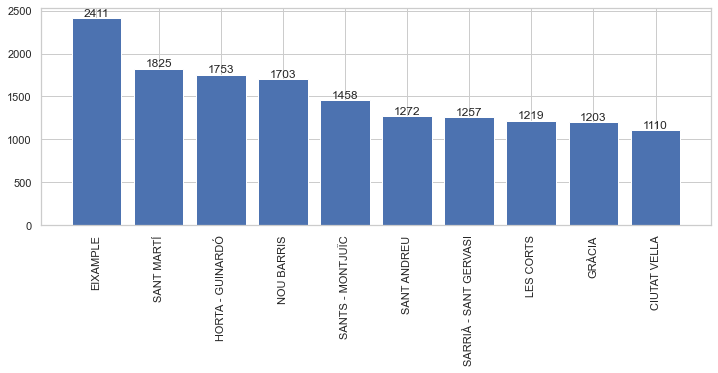

SEXE : SEX


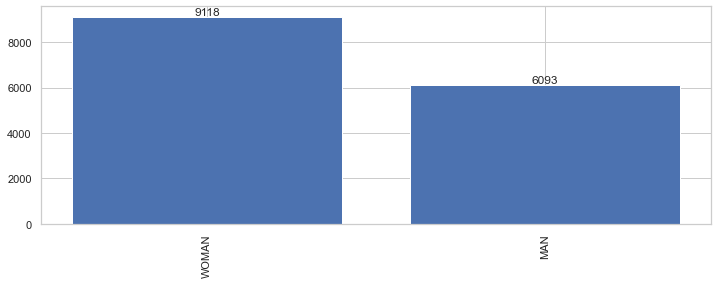

HAB_COTXE_PART : DO YOU HAVE: PRIVATE CAR


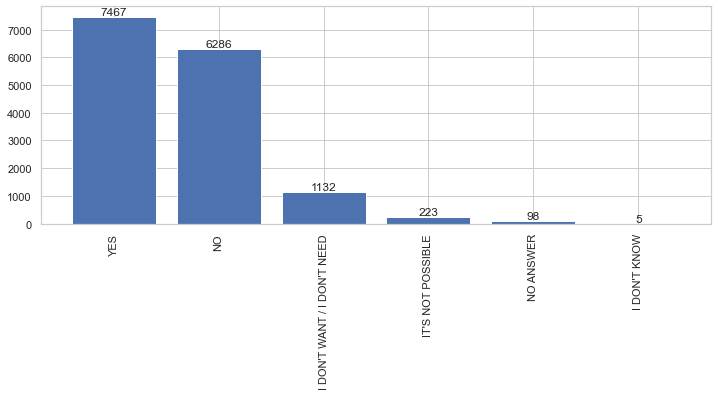

HAB_M2_1A14 : HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED


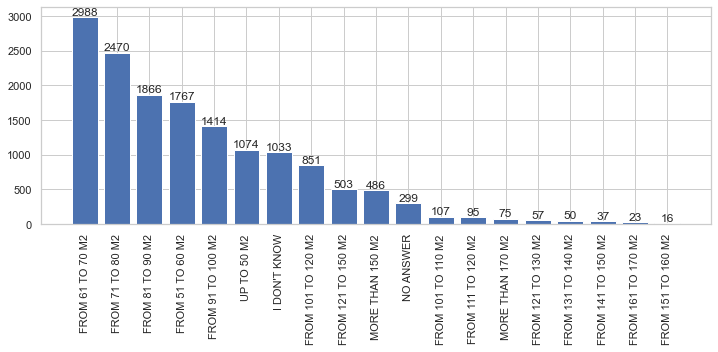

HAB_RES_1A4 : WHAT IS THE NUMBER OF PEOPLE LIVING IN THE HOUSE? - GROUPED


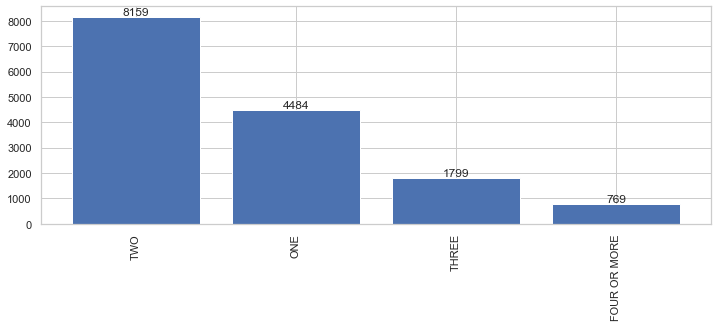

LLAR_INGRESSOS_1A10 : WHAT IS THE NET MONTHLY INCOME OF ALL MEMBERS OF YOUR HOME? - GROUPED


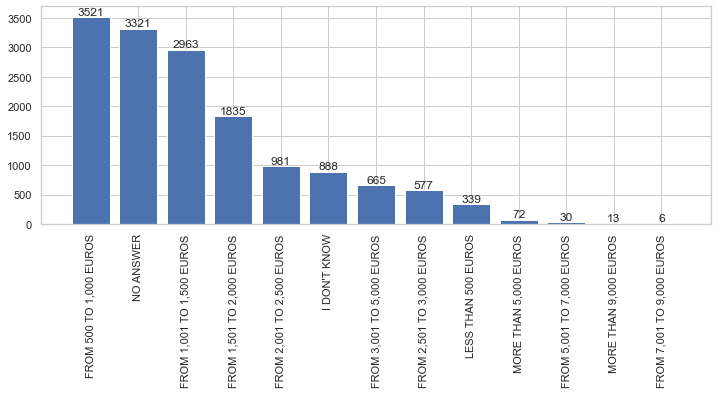

TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?


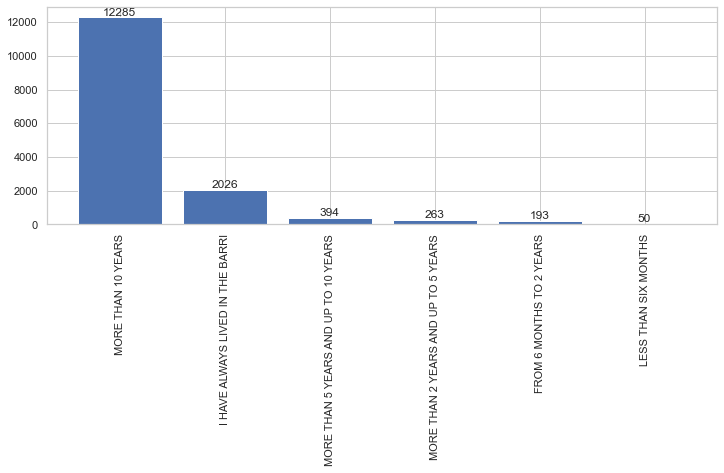

EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?


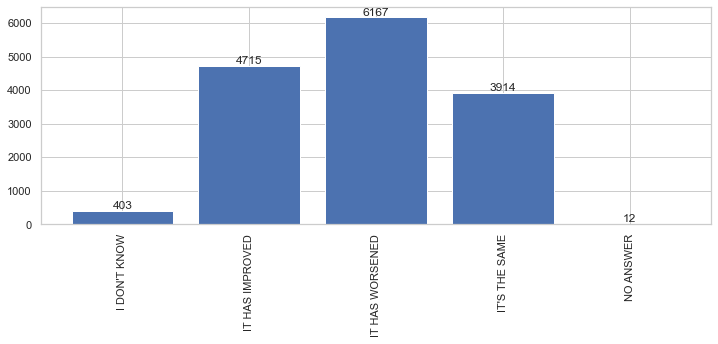

EVO1A_BARRI : IN GENERAL, DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?


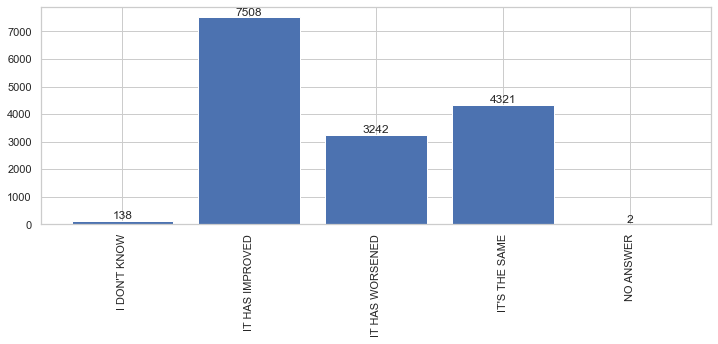

FUTUR_BCN : FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR WORSEN?


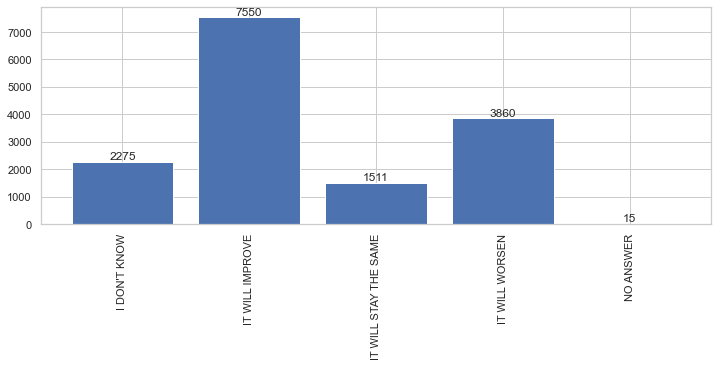

FUTUR_BARRI : AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR WORSEN?


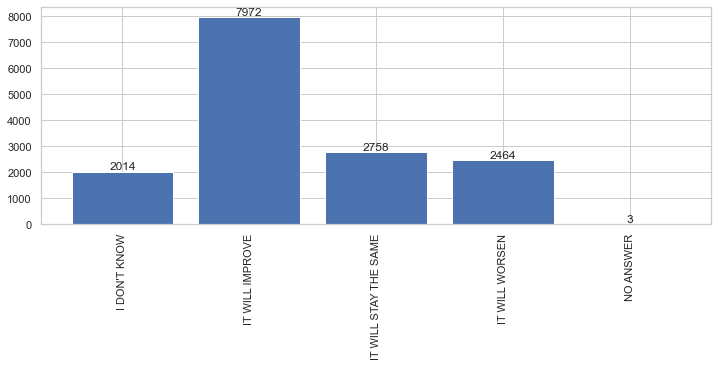

SATISF_RES_BCN_0A10 : ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA?


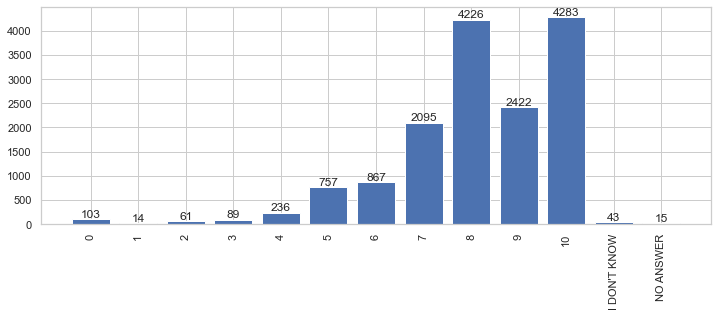

SATISF_RES_BARRI_0A10 : ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD?


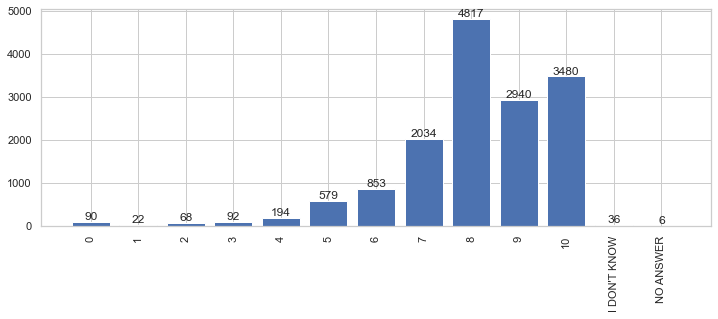

VAL_SEGUR : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE


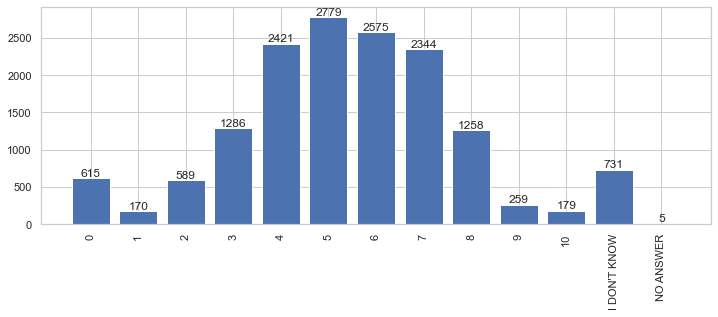

VAL_SEGUR_BARRI : CITY SERVICES - RATE: CITIZEN SECURITY IN THE NEIGHBORHOOD


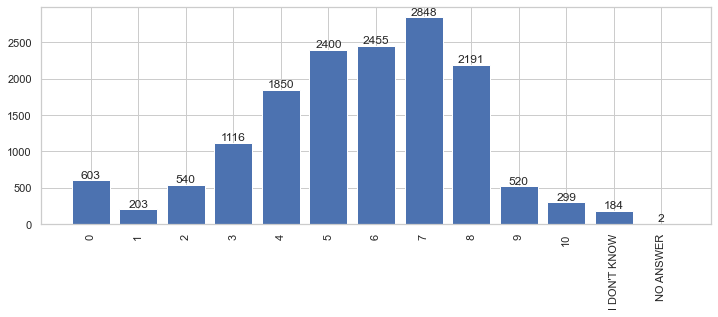

VAL_GESTMUNI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?


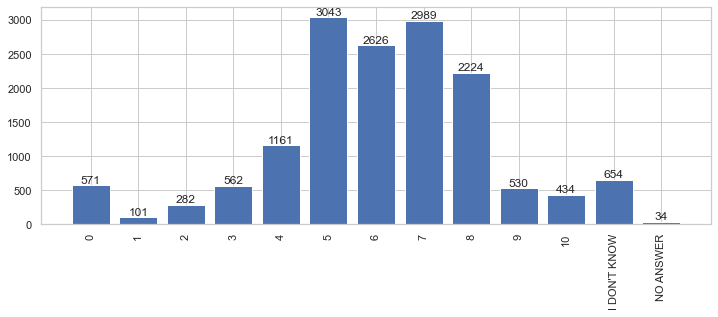

VAL_GESTBARRI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL IN YOUR NEIGHBORHOOD?


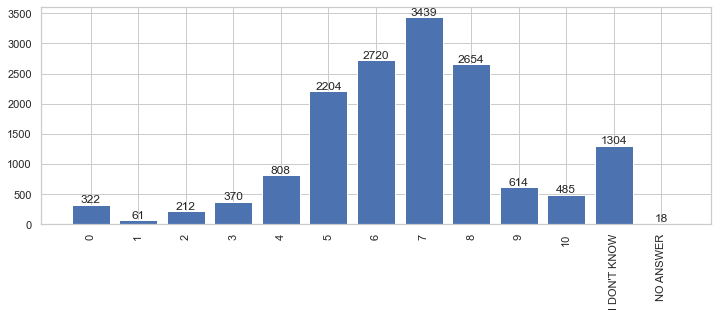

COMPARA_BARRI : DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST?


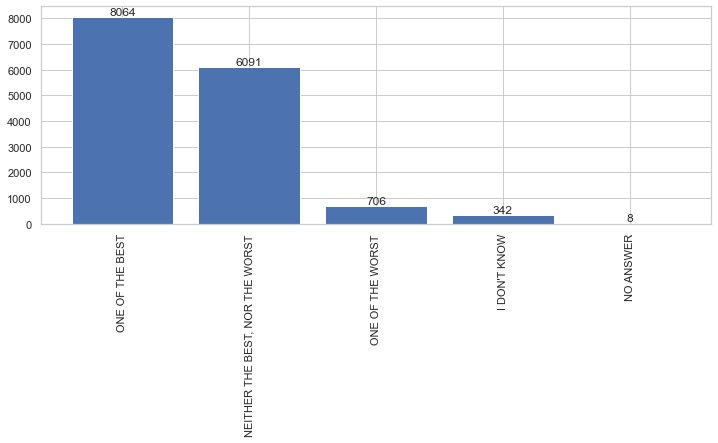

VAL_TRANSP_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT BARCELONA IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?


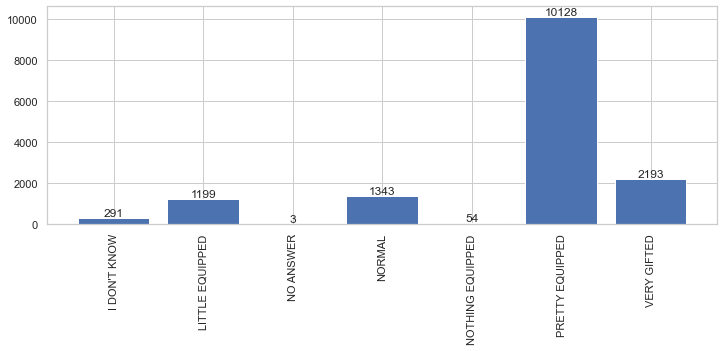

VAL_TRANSP_BARRI_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?


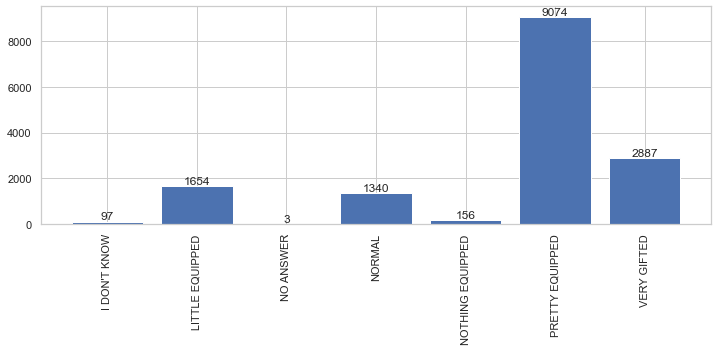

In [65]:
for i in independent_variables:
    print(i, ":", questions_dict[i])
    simple_plot(i)

In [66]:
for i in independent_variables:
    print(i, ":", questions_dict[i])
    display(size_pctg(i))

NOM_DISTRICTE : DISTRICT


NOM_DISTRICTE
CIUTAT VELLA              7.30
EIXAMPLE                 15.85
GRÀCIA                    7.91
HORTA - GUINARDÓ         11.52
LES CORTS                 8.01
NOU BARRIS               11.20
SANT ANDREU               8.36
SANT MARTÍ               12.00
SANTS - MONTJUÏC          9.59
SARRIÀ - SANT GERVASI     8.26
dtype: float64

SEXE : SEX


SEXE
MAN      40.06
WOMAN    59.94
dtype: float64

HAB_COTXE_PART : DO YOU HAVE: PRIVATE CAR


HAB_COTXE_PART
I DON'T KNOW                    0.03
I DON'T WANT / I DON'T NEED     7.44
IT'S NOT POSSIBLE               1.47
NO                             41.33
NO ANSWER                       0.64
YES                            49.09
dtype: float64

HAB_M2_1A14 : HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED


HAB_M2_1A14
FROM 101 TO 110 M2     0.70
FROM 101 TO 120 M2     5.59
FROM 111 TO 120 M2     0.62
FROM 121 TO 130 M2     0.37
FROM 121 TO 150 M2     3.31
FROM 131 TO 140 M2     0.33
FROM 141 TO 150 M2     0.24
FROM 151 TO 160 M2     0.11
FROM 161 TO 170 M2     0.15
FROM 51 TO 60 M2      11.62
FROM 61 TO 70 M2      19.64
FROM 71 TO 80 M2      16.24
FROM 81 TO 90 M2      12.27
FROM 91 TO 100 M2      9.30
I DON'T KNOW           6.79
MORE THAN 150 M2       3.20
MORE THAN 170 M2       0.49
NO ANSWER              1.97
UP TO 50 M2            7.06
dtype: float64

HAB_RES_1A4 : WHAT IS THE NUMBER OF PEOPLE LIVING IN THE HOUSE? - GROUPED


HAB_RES_1A4
FOUR OR MORE     5.06
ONE             29.48
THREE           11.83
TWO             53.64
dtype: float64

LLAR_INGRESSOS_1A10 : WHAT IS THE NET MONTHLY INCOME OF ALL MEMBERS OF YOUR HOME? - GROUPED


LLAR_INGRESSOS_1A10
FROM 1,001 TO 1,500 EUROS    19.48
FROM 1,501 TO 2,000 EUROS    12.06
FROM 2,001 TO 2,500 EUROS     6.45
FROM 2,501 TO 3,000 EUROS     3.79
FROM 3,001 TO 5,000 EUROS     4.37
FROM 5,001 TO 7,000 EUROS     0.20
FROM 500 TO 1,000 EUROS      23.15
FROM 7,001 TO 9,000 EUROS     0.04
I DON'T KNOW                  5.84
LESS THAN 500 EUROS           2.23
MORE THAN 5,000 EUROS         0.47
MORE THAN 9,000 EUROS         0.09
NO ANSWER                    21.83
dtype: float64

TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?


TMP_RES_BARRI_1A6
FROM 6 MONTHS TO 2 YEARS                 1.27
I HAVE ALWAYS LIVED IN THE BARRI        13.32
LESS THAN SIX MONTHS                     0.33
MORE THAN 10 YEARS                      80.76
MORE THAN 2 YEARS AND UP TO 5 YEARS      1.73
MORE THAN 5 YEARS AND UP TO 10 YEARS     2.59
dtype: float64

EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?


EVO1A_BCN
I DON'T KNOW        2.65
IT HAS IMPROVED    31.00
IT HAS WORSENED    40.54
IT'S THE SAME      25.73
NO ANSWER           0.08
dtype: float64

EVO1A_BARRI : IN GENERAL, DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?


EVO1A_BARRI
I DON'T KNOW        0.91
IT HAS IMPROVED    49.36
IT HAS WORSENED    21.31
IT'S THE SAME      28.41
NO ANSWER           0.01
dtype: float64

FUTUR_BCN : FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR WORSEN?


FUTUR_BCN
I DON'T KNOW             14.96
IT WILL IMPROVE          49.64
IT WILL STAY THE SAME     9.93
IT WILL WORSEN           25.38
NO ANSWER                 0.10
dtype: float64

FUTUR_BARRI : AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR WORSEN?


FUTUR_BARRI
I DON'T KNOW             13.24
IT WILL IMPROVE          52.41
IT WILL STAY THE SAME    18.13
IT WILL WORSEN           16.20
NO ANSWER                 0.02
dtype: float64

SATISF_RES_BCN_0A10 : ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA?


SATISF_RES_BCN_0A10
0                0.68
1                0.09
2                0.40
3                0.59
4                1.55
5                4.98
6                5.70
7               13.77
8               27.78
9               15.92
10              28.16
I DON'T KNOW     0.28
NO ANSWER        0.10
dtype: float64

SATISF_RES_BARRI_0A10 : ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD?


SATISF_RES_BARRI_0A10
0                0.59
1                0.14
2                0.45
3                0.60
4                1.28
5                3.81
6                5.61
7               13.37
8               31.67
9               19.33
10              22.88
I DON'T KNOW     0.24
NO ANSWER        0.04
dtype: float64

VAL_SEGUR : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE


VAL_SEGUR
0                4.04
1                1.12
2                3.87
3                8.45
4               15.92
5               18.27
6               16.93
7               15.41
8                8.27
9                1.70
10               1.18
I DON'T KNOW     4.81
NO ANSWER        0.03
dtype: float64

VAL_SEGUR_BARRI : CITY SERVICES - RATE: CITIZEN SECURITY IN THE NEIGHBORHOOD


VAL_SEGUR_BARRI
0                3.96
1                1.33
2                3.55
3                7.34
4               12.16
5               15.78
6               16.14
7               18.72
8               14.40
9                3.42
10               1.97
I DON'T KNOW     1.21
NO ANSWER        0.01
dtype: float64

VAL_GESTMUNI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?


VAL_GESTMUNI
0                3.75
1                0.66
2                1.85
3                3.69
4                7.63
5               20.01
6               17.26
7               19.65
8               14.62
9                3.48
10               2.85
I DON'T KNOW     4.30
NO ANSWER        0.22
dtype: float64

VAL_GESTBARRI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL IN YOUR NEIGHBORHOOD?


VAL_GESTBARRI
0                2.12
1                0.40
2                1.39
3                2.43
4                5.31
5               14.49
6               17.88
7               22.61
8               17.45
9                4.04
10               3.19
I DON'T KNOW     8.57
NO ANSWER        0.12
dtype: float64

COMPARA_BARRI : DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST?


COMPARA_BARRI
I DON'T KNOW                        2.25
NEITHER THE BEST, NOR THE WORST    40.04
NO ANSWER                           0.05
ONE OF THE BEST                    53.01
ONE OF THE WORST                    4.64
dtype: float64

VAL_TRANSP_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT BARCELONA IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?


VAL_TRANSP_1A5
I DON'T KNOW         1.91
LITTLE EQUIPPED      7.88
NO ANSWER            0.02
NORMAL               8.83
NOTHING EQUIPPED     0.36
PRETTY EQUIPPED     66.58
VERY GIFTED         14.42
dtype: float64

VAL_TRANSP_BARRI_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?


VAL_TRANSP_BARRI_1A5
I DON'T KNOW         0.64
LITTLE EQUIPPED     10.87
NO ANSWER            0.02
NORMAL               8.81
NOTHING EQUIPPED     1.03
PRETTY EQUIPPED     59.65
VERY GIFTED         18.98
dtype: float64

In [67]:
for i in independent_variables:
    print(i, ":", questions_dict[i])
    display(ctab(i))

NOM_DISTRICTE : DISTRICT


Would_live_in_another_neighborhood,0.0,1.0
NOM_DISTRICTE,,
CIUTAT VELLA,757,166
EIXAMPLE,1967,170
GRÀCIA,965,91
HORTA - GUINARDÓ,1329,184
LES CORTS,1068,49
NOU BARRIS,1178,217
SANT ANDREU,962,154
SANT MARTÍ,1382,170
SANTS - MONTJUÏC,994,210


SEXE : SEX


Would_live_in_another_neighborhood,0.0,1.0
SEXE,,
MAN,4557,538
WOMAN,7109,923


HAB_COTXE_PART : DO YOU HAVE: PRIVATE CAR


Would_live_in_another_neighborhood,0.0,1.0
HAB_COTXE_PART,,
I DON'T KNOW,3,0
I DON'T WANT / I DON'T NEED,848,136
IT'S NOT POSSIBLE,151,32
NO,5011,567
NO ANSWER,75,14
YES,5578,712


HAB_M2_1A14 : HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED


Would_live_in_another_neighborhood,0.0,1.0
HAB_M2_1A14,,
FROM 101 TO 110 M2,79,10
FROM 101 TO 120 M2,710,58
FROM 111 TO 120 M2,70,5
FROM 121 TO 130 M2,42,7
FROM 121 TO 150 M2,416,32
FROM 131 TO 140 M2,38,3
FROM 141 TO 150 M2,28,3
FROM 151 TO 160 M2,14,1
FROM 161 TO 170 M2,18,2


HAB_RES_1A4 : WHAT IS THE NUMBER OF PEOPLE LIVING IN THE HOUSE? - GROUPED


Would_live_in_another_neighborhood,0.0,1.0
HAB_RES_1A4,,
FOUR OR MORE,568,59
ONE,3534,448
THREE,1339,151
TWO,6225,803


LLAR_INGRESSOS_1A10 : WHAT IS THE NET MONTHLY INCOME OF ALL MEMBERS OF YOUR HOME? - GROUPED


Would_live_in_another_neighborhood,0.0,1.0
LLAR_INGRESSOS_1A10,,
"FROM 1,001 TO 1,500 EUROS",2250,283
"FROM 1,501 TO 2,000 EUROS",1354,197
"FROM 2,001 TO 2,500 EUROS",757,90
"FROM 2,501 TO 3,000 EUROS",432,54
"FROM 3,001 TO 5,000 EUROS",522,54
"FROM 5,001 TO 7,000 EUROS",26,3
"FROM 500 TO 1,000 EUROS",2691,365
"FROM 7,001 TO 9,000 EUROS",5,0
I DON'T KNOW,726,68


TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?


Would_live_in_another_neighborhood,0.0,1.0
TMP_RES_BARRI_1A6,,
FROM 6 MONTHS TO 2 YEARS,128,34
I HAVE ALWAYS LIVED IN THE BARRI,1667,133
LESS THAN SIX MONTHS,33,10
MORE THAN 10 YEARS,9408,1159
MORE THAN 2 YEARS AND UP TO 5 YEARS,164,54
MORE THAN 5 YEARS AND UP TO 10 YEARS,266,71


EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?


Would_live_in_another_neighborhood,0.0,1.0
EVO1A_BCN,,
I DON'T KNOW,307,28
IT HAS IMPROVED,3832,381
IT HAS WORSENED,4401,719
IT'S THE SAME,3120,332
NO ANSWER,6,1


EVO1A_BARRI : IN GENERAL, DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?


Would_live_in_another_neighborhood,0.0,1.0
EVO1A_BARRI,,
I DON'T KNOW,91,21
IT HAS IMPROVED,6117,584
IT HAS WORSENED,2045,485
IT'S THE SAME,3411,371
NO ANSWER,2,0


FUTUR_BCN : FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR WORSEN?


Would_live_in_another_neighborhood,0.0,1.0
FUTUR_BCN,,
I DON'T KNOW,1733,208
IT WILL IMPROVE,6024,658
IT WILL STAY THE SAME,1160,164
IT WILL WORSEN,2740,429
NO ANSWER,9,2


FUTUR_BARRI : AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR WORSEN?


Would_live_in_another_neighborhood,0.0,1.0
FUTUR_BARRI,,
I DON'T KNOW,1487,202
IT WILL IMPROVE,6507,617
IT WILL STAY THE SAME,2153,252
IT WILL WORSEN,1516,390
NO ANSWER,3,0


SATISF_RES_BCN_0A10 : ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA?


Would_live_in_another_neighborhood,0.0,1.0
SATISF_RES_BCN_0A10,,
0,49,6
1,5,1
2,19,5
3,39,9
4,107,38
5,419,104
6,565,95
7,1531,223
8,3312,414


SATISF_RES_BARRI_0A10 : ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD?


Would_live_in_another_neighborhood,0.0,1.0
SATISF_RES_BARRI_0A10,,
0,15,31
1,6,6
2,11,26
3,15,34
4,52,65
5,230,150
6,471,160
7,1403,275
8,3821,398


VAL_SEGUR : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE


Would_live_in_another_neighborhood,0.0,1.0
VAL_SEGUR,,
0,394,74
1,104,21
2,395,76
3,938,133
4,1828,253
5,2155,271
6,2042,228
7,1883,196
8,1008,93


VAL_SEGUR_BARRI : CITY SERVICES - RATE: CITIZEN SECURITY IN THE NEIGHBORHOOD


Would_live_in_another_neighborhood,0.0,1.0
VAL_SEGUR_BARRI,,
0,355,82
1,103,35
2,344,95
3,770,163
4,1354,205
5,1824,221
6,1959,206
7,2319,229
8,1824,156


VAL_GESTMUNI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?


Would_live_in_another_neighborhood,0.0,1.0
VAL_GESTMUNI,,
0,369,63
1,56,16
2,181,36
3,400,52
4,822,142
5,2261,327
6,2017,270
7,2423,240
8,1803,187


VAL_GESTBARRI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL IN YOUR NEIGHBORHOOD?


Would_live_in_another_neighborhood,0.0,1.0
VAL_GESTBARRI,,
0,170,53
1,32,17
2,105,33
3,222,49
4,525,108
5,1531,271
6,2107,258
7,2799,293
8,2253,165


COMPARA_BARRI : DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST?


Would_live_in_another_neighborhood,0.0,1.0
COMPARA_BARRI,,
I DON'T KNOW,245,38
"NEITHER THE BEST, NOR THE WORST",4147,854
NO ANSWER,4,2
ONE OF THE BEST,7023,324
ONE OF THE WORST,247,243


VAL_TRANSP_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT BARCELONA IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?


Would_live_in_another_neighborhood,0.0,1.0
VAL_TRANSP_1A5,,
I DON'T KNOW,221,30
LITTLE EQUIPPED,832,142
NO ANSWER,3,0
NORMAL,991,136
NOTHING EQUIPPED,35,9
PRETTY EQUIPPED,7871,955
VERY GIFTED,1713,189


VAL_TRANSP_BARRI_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?


Would_live_in_another_neighborhood,0.0,1.0
VAL_TRANSP_BARRI_1A5,,
I DON'T KNOW,74,8
LITTLE EQUIPPED,1175,210
NO ANSWER,3,0
NORMAL,964,167
NOTHING EQUIPPED,103,29
PRETTY EQUIPPED,7041,808
VERY GIFTED,2306,239


Definitions:
* satisfied = very or fairly satisfied - on a scale 0-10 respondents are satisfied if they rate something as 7-10

In [68]:
# NOM_DISTRICTE : DISTRICT
x = 'NOM_DISTRICTE'
data[x].unique()

array(['CIUTAT VELLA', 'EIXAMPLE', 'SANTS - MONTJUÏC', 'LES CORTS',
       'SARRIÀ - SANT GERVASI', 'GRÀCIA', 'HORTA - GUINARDÓ',
       'NOU BARRIS', 'SANT ANDREU', 'SANT MARTÍ'], dtype=object)

In [69]:
data['District'] = data[x]

In [70]:
# SEXE : SEX
x = 'SEXE'
data[x].unique()

array(['WOMAN', 'MAN'], dtype=object)

In [71]:
data_prep = {'WOMAN': 1,
            'MAN': 0}
data['Woman'] = [data_prep[i] for i in data[x]]

In [72]:
# HAB_COTXE_PART : DO YOU HAVE: PRIVATE CAR
x = 'HAB_COTXE_PART'
data[x].unique()

array(['NO', 'YES', 'NO ANSWER', "I DON'T KNOW",
       "I DON'T WANT / I DON'T NEED", "IT'S NOT POSSIBLE"], dtype=object)

In [73]:
data_prep = {'YES': 1, 
             "I DON'T WANT / I DON'T NEED": 0, 
             "IT'S NOT POSSIBLE": 0,
            "NO": 0,
            "NO ANSWER": np.nan,
            "I DON'T KNOW": 0}
data['Car'] = [data_prep[i] for i in data[x]]

In [74]:
# HAB_M2_1A14 : HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED
x = 'HAB_M2_1A14'
data[x].unique()

array(['FROM 51 TO 60 M2', 'FROM 101 TO 120 M2', 'FROM 61 TO 70 M2',
       'UP TO 50 M2', 'FROM 71 TO 80 M2', "I DON'T KNOW",
       'MORE THAN 150 M2', 'FROM 81 TO 90 M2', 'FROM 121 TO 150 M2',
       'FROM 91 TO 100 M2', 'NO ANSWER', 'FROM 101 TO 110 M2',
       'MORE THAN 170 M2', 'FROM 111 TO 120 M2', 'FROM 121 TO 130 M2',
       'FROM 141 TO 150 M2', 'FROM 131 TO 140 M2', 'FROM 161 TO 170 M2',
       'FROM 151 TO 160 M2'], dtype=object)

In [75]:
data_prep = {'UP TO 50 M2': '< 50 M2', 
             'FROM 51 TO 60 M2': '51-100 M2', 
             'FROM 61 TO 70 M2': '51-100 M2', 
             'FROM 71 TO 80 M2': '51-100 M2', 
             'FROM 81 TO 90 M2': '51-100 M2', 
             'FROM 91 TO 100 M2': '51-100 M2', 
             'FROM 101 TO 120 M2': '101-150 M2', 
             'FROM 101 TO 110 M2': '101-150 M2',
             'FROM 111 TO 120 M2': '101-150 M2', 
             'FROM 121 TO 150 M2': '101-150 M2', 
             'FROM 121 TO 130 M2': '101-150 M2',
             'FROM 131 TO 140 M2': '101-150 M2', 
             'FROM 141 TO 150 M2': '101-150 M2', 
             'FROM 151 TO 160 M2': '> 150 M2',
             'FROM 161 TO 170 M2': '> 150 M2',
             'MORE THAN 150 M2': '> 150 M2',
             'MORE THAN 170 M2': '> 150 M2',
             'NO ANSWER': np.nan,
             "I DON'T KNOW": "I DON'T KNOW"} 
data['House_size'] = [data_prep[i] for i in data[x]]

In [76]:
# HAB_RES_1A4 : WHAT IS THE NUMBER OF PEOPLE LIVING IN THE HOUSE? - GROUPED
x = 'HAB_RES_1A4'
data[x].unique()

array(['ONE', 'TWO', 'FOUR OR MORE', 'THREE'], dtype=object)

In [77]:
data_prep = {'ONE': 1,
            'TWO': 0,
            'THREE': 0,
            'FOUR OR MORE': 0} 
data['Living_alone'] = [data_prep[i] for i in data[x]]

In [78]:
data['No_of_people_in_the_house'] = data[x]

In [79]:
# TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?
x = 'TMP_RES_BARRI_1A6'
data[x].unique()

array(['MORE THAN 10 YEARS', 'I HAVE ALWAYS LIVED IN THE BARRI',
       'MORE THAN 5 YEARS AND UP TO 10 YEARS',
       'MORE THAN 2 YEARS AND UP TO 5 YEARS', 'FROM 6 MONTHS TO 2 YEARS',
       'LESS THAN SIX MONTHS'], dtype=object)

In [80]:
data_prep = {'I HAVE ALWAYS LIVED IN THE BARRI': 'I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD',
             'MORE THAN 10 YEARS': 'MORE THAN 10 YEARS', 
             'MORE THAN 5 YEARS AND UP TO 10 YEARS': 'LESS THAN 10 YEARS',
             'MORE THAN 2 YEARS AND UP TO 5 YEARS': 'LESS THAN 10 YEARS', 
             'FROM 6 MONTHS TO 2 YEARS': 'LESS THAN 10 YEARS',
             'LESS THAN SIX MONTHS': 'LESS THAN 10 YEARS',
             'NO ANSWER': np.nan}
data['Time_living_in_barri'] = [data_prep[i] for i in data[x]]

In [81]:
# EVO1A_BARRI : DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?
x = 'EVO1A_BARRI'
data[x].unique()

array(['IT HAS WORSENED', 'IT HAS IMPROVED', "IT'S THE SAME",
       "I DON'T KNOW", 'NO ANSWER'], dtype=object)

In [82]:
data_prep = {"IT HAS WORSENED": "IT HAS WORSENED", 
             "IT'S THE SAME": "IT IS THE SAME", 
             'IT HAS IMPROVED': "IT HAS IMPROVED", 
             "I DON'T KNOW": "IT IS THE SAME",
             'NO ANSWER': np.nan}
data['Barri_evolution'] = [data_prep[i] for i in data[x]]

In [83]:
# EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?
x = 'EVO1A_BCN'
data[x].unique()

array(['IT HAS WORSENED', 'IT HAS IMPROVED', "IT'S THE SAME",
       "I DON'T KNOW", 'NO ANSWER'], dtype=object)

In [84]:
data_prep = {"IT HAS WORSENED": "IT HAS WORSENED", 
             "IT'S THE SAME": "IT IS THE SAME", 
             'IT HAS IMPROVED': "IT HAS IMPROVED", 
             "I DON'T KNOW": "IT IS THE SAME",
             'NO ANSWER': np.nan}
data['BCN_evolution'] = [data_prep[i] for i in data[x]]

In [85]:
# FUTUR_BARRI : AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR GET WORSE?
x = 'FUTUR_BARRI'
data[x].unique()

array(['IT WILL WORSEN', 'IT WILL IMPROVE', "I DON'T KNOW",
       'IT WILL STAY THE SAME', 'NO ANSWER'], dtype=object)

In [86]:
data_prep = {'IT WILL WORSEN': "IT WILL WORSEN", 
             'IT WILL IMPROVE': "IT WILL IMPROVE", 
             'IT WILL STAY THE SAME': "IT WILL STAY THE SAME",
             "I DON'T KNOW": "IT WILL STAY THE SAME", 
             'NO ANSWER': np.nan}
data['Barri_future'] = [data_prep[i] for i in data[x]]

In [87]:
# AND FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?
x = 'FUTUR_BCN'
data[x].unique()

array(['IT WILL WORSEN', 'IT WILL IMPROVE', "I DON'T KNOW",
       'IT WILL STAY THE SAME', 'NO ANSWER'], dtype=object)

In [88]:
data_prep = {'IT WILL WORSEN': "IT WILL WORSEN", 
             'IT WILL IMPROVE': "IT WILL IMPROVE", 
             'IT WILL STAY THE SAME': "IT WILL STAY THE SAME",
             "I DON'T KNOW": "IT WILL STAY THE SAME", 
             'NO ANSWER': np.nan}
data['BCN_future'] = [data_prep[i] for i in data[x]]

In [89]:
# ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD? - GROUPED
x = 'SATISF_RES_BARRI_0A10'
data[x].unique()

array([5, 8, 3, 9, 0, 10, 6, 7, 4, 2, 1, "I DON'T KNOW", 'NO ANSWER'],
      dtype=object)

In [90]:
data_prep = {0: 'NOT SATISFIED',
             1: 'NOT SATISFIED',
             2: 'NOT SATISFIED',
             3: 'NOT SATISFIED',
             4: 'FAIRLY SATISFIED',
             5: 'FAIRLY SATISFIED',
             6: 'FAIRLY SATISFIED', 
             7: 'SATISFIED',
             8: 'SATISFIED',
             9: 'SATISFIED', 
             10: 'SATISFIED',  
             "I DON'T KNOW": "FAIRLY SATISFIED", 
             'NO ANSWER': np.nan}
data['Barri_satisfaction'] = [data_prep[i] for i in data[x]]

In [91]:
# ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN BARCELONA?
x = 'SATISF_RES_BCN_0A10'
data[x].unique()

array([7, 8, 10, 9, 6, 4, 5, 1, 2, "I DON'T KNOW", 0, 3, 'NO ANSWER'],
      dtype=object)

In [92]:
data_prep = {0: 'NOT SATISFIED',
             1: 'NOT SATISFIED',
             2: 'NOT SATISFIED',
             3: 'NOT SATISFIED',
             4: 'FAIRLY SATISFIED',
             5: 'FAIRLY SATISFIED',
             6: 'FAIRLY SATISFIED', 
             7: 'SATISFIED',
             8: 'SATISFIED',
             9: 'SATISFIED', 
             10: 'SATISFIED',  
             "I DON'T KNOW": "FAIRLY SATISFIED", 
             'NO ANSWER': np.nan}
data['BCN_satisfaction'] = [data_prep[i] for i in data[x]]

In [93]:
# CITY SERVICES - RATE: CITIZEN SECURITY IN THE NEIGHBORHOOD
x = 'VAL_SEGUR_BARRI'
data[x].unique()

array([4, 1, 3, 2, 6, 0, 5, 7, 8, 9, "I DON'T KNOW", 10, 'NO ANSWER'],
      dtype=object)

In [94]:
data_prep = {0: 'BAD',
             1: 'BAD',
             2: 'BAD',
             3: 'BAD',
             4: 'NEITHER BAD, NOR GOOD',
             5: 'NEITHER BAD, NOR GOOD',
             6: 'NEITHER BAD, NOR GOOD', 
             7: 'GOOD',
             8: 'GOOD',
             9: 'GOOD', 
             10: 'GOOD',  
             "I DON'T KNOW": "NEITHER BAD, NOR GOOD", 
             'NO ANSWER': np.nan}
data['Barri_security'] = [data_prep[i] for i in data[x]]

In [95]:
# CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE
x = 'VAL_SEGUR'
data[x].unique()

array([4, 1, 3, 2, 7, 6, 5, 8, 0, 10, 9, "I DON'T KNOW", 'NO ANSWER'],
      dtype=object)

In [96]:
data_prep = {0: 'BAD',
             1: 'BAD',
             2: 'BAD',
             3: 'BAD',
             4: 'NEITHER BAD, NOR GOOD',
             5: 'NEITHER BAD, NOR GOOD',
             6: 'NEITHER BAD, NOR GOOD', 
             7: 'GOOD',
             8: 'GOOD',
             9: 'GOOD', 
             10: 'GOOD',  
             "I DON'T KNOW": "NEITHER BAD, NOR GOOD", 
             'NO ANSWER': np.nan}
data['BCN_security'] = [data_prep[i] for i in data[x]]

In [97]:
# ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL IN YOUR NEIGHBORHOOD?
x = 'VAL_GESTBARRI'
data[x].unique()

array([4, 7, 6, "I DON'T KNOW", 5, 8, 0, 3, 9, 10, 2, 1, 'NO ANSWER'],
      dtype=object)

In [98]:
data_prep = {0: 'BAD',
             1: 'BAD',
             2: 'BAD',
             3: 'BAD',
             4: 'NEITHER BAD, NOR GOOD',
             5: 'NEITHER BAD, NOR GOOD',
             6: 'NEITHER BAD, NOR GOOD', 
             7: 'GOOD',
             8: 'GOOD',
             9: 'GOOD', 
             10: 'GOOD',  
             "I DON'T KNOW": "NEITHER BAD, NOR GOOD", 
             'NO ANSWER': np.nan}
data['Barri_management'] = [data_prep[i] for i in data[x]]

In [99]:
# ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?
x = 'VAL_GESTMUNI'
data[x].unique()

array([4, 7, 6, 8, 5, 1, "I DON'T KNOW", 0, 2, 3, 9, 10, 'NO ANSWER'],
      dtype=object)

In [100]:
data_prep = {0: 'BAD',
             1: 'BAD',
             2: 'BAD',
             3: 'BAD',
             4: 'NEITHER BAD, NOR GOOD',
             5: 'NEITHER BAD, NOR GOOD',
             6: 'NEITHER BAD, NOR GOOD', 
             7: 'GOOD',
             8: 'GOOD',
             9: 'GOOD', 
             10: 'GOOD',  
             "I DON'T KNOW": "NEITHER BAD, NOR GOOD", 
             'NO ANSWER': np.nan}
data['BCN_management'] = [data_prep[i] for i in data[x]]

In [101]:
# DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST?
x = 'COMPARA_BARRI'
data[x].unique()

array(['ONE OF THE WORST', 'NEITHER THE BEST, NOR THE WORST',
       "I DON'T KNOW", 'ONE OF THE BEST', 'NO ANSWER'], dtype=object)

In [102]:
data_prep = {'NEITHER THE BEST, NOR THE WORST': 'NEITHER THE BEST, NOR THE WORST', 
             'ONE OF THE BEST': 'ONE OF THE BEST',
             'ONE OF THE WORST': 'ONE OF THE WORST', 
             "I DON'T KNOW": "NEITHER THE BEST, NOR THE WORST", 
             'NO ANSWER': np.nan}
data['Barri_comparison'] = [data_prep[i] for i in data[x]]

In [103]:
# IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED?
x = 'VAL_TRANSP_BARRI_1A5'
data[x].unique()

array(['PRETTY EQUIPPED', "I DON'T KNOW", 'NORMAL', 'VERY GIFTED',
       'NOTHING EQUIPPED', 'LITTLE EQUIPPED', 'NO ANSWER'], dtype=object)

In [104]:
data_prep = {'VERY GIFTED': 'GOOD', 
             'PRETTY EQUIPPED': 'GOOD', 
             'NORMAL': 'NEITHER BAD, NOR GOOD', 
             'LITTLE EQUIPPED': 'BAD', 
             'NOTHING EQUIPPED': 'BAD', 
             "I DON'T KNOW": "NEITHER BAD, NOR GOOD",
             'NO ANSWER': np.nan}
data['Barri_transport'] = [data_prep[i] for i in data['VAL_TRANSP_BARRI_1A5']]

In [105]:
# IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED?
x = 'VAL_TRANSP_1A5'
data[x].unique()

array(['PRETTY EQUIPPED', "I DON'T KNOW", 'LITTLE EQUIPPED', 'NORMAL',
       'VERY GIFTED', 'NOTHING EQUIPPED', 'NO ANSWER'], dtype=object)

In [106]:
data_prep = {'VERY GIFTED': 'GOOD', 
             'PRETTY EQUIPPED': 'GOOD', 
             'NORMAL': 'NEITHER BAD, NOR GOOD', 
             'LITTLE EQUIPPED': 'BAD', 
             'NOTHING EQUIPPED': 'BAD', 
             "I DON'T KNOW": "NEITHER BAD, NOR GOOD",
             'NO ANSWER': np.nan}
data['BCN_transport'] = [data_prep[i] for i in data['VAL_TRANSP_1A5']]

In [107]:
# PROB_BARRI_N1 : WHAT IS THE MOST SERIOUS PROBLEM YOUR NEIGHBORHOOD HAS AT THE MOMENT? - GROUPED
x = 'PROB_BARRI_N1'
data[x].unique()

array(['NEGATIVE SOCIAL AND CIVIL VALUES', 'GREEN SPACES', 'MAINTENANCE',
       'EQUIPMENT AND SERVICES', 'NOISE',
       'PROBLEMS ASSOCIATED WITH IMMIGRATION', 'INSECURITY',
       'SOCIAL PROBLEMS: POVERTY, INEQUALITY, ...', 'NOTHING', 'TOURISM',
       'STREETS CLEANING', 'CITY MODEL', 'DRUGS', "I DON'T KNOW",
       'URBANISM', 'CIRCULATION / TRAFFIC',
       'UNEMPLOYMENT / WORKING CONDITIONS', 'ECONOMIC PROBLEMS',
       'PARKING', 'COMMERCE', 'WORKS',
       'TRANSPORT, INFRASTRUCTURE AND MOBILITY', 'TERRORISM',
       'ACCESS TO THE HOUSE', 'OTHERS', 'BENEFITS AND GRANTS',
       'MASSIFICATION', 'POLLUTION AND THE ENVIRONMENT', 'CAMP NOU',
       'MUNICIPAL POLITICAL MANAGEMENT', 'POLITICAL ASPECTS',
       'INEQUALITY / IMBALANCE / TERRITORIAL MODEL', 'OCUPES',
       'PERSONAL PROBLEMS AND CONCERNS', 'LACE FROM CATALONIA TO SPAIN',
       'PROSTITUTION', 'FINANCIAL CUTS', 'TAXES AND FINES', 'NO ANSWER',
       'PUBLIC ADMINISTRATION MANAGEMENT', 'LEISURE AREAS',
       'ME

In [108]:
barri_problem_with_security = []
barri_problem_with_streets_cleaning = []
barri_problem_with_mobility = []

for j in range(len(data)):
    if data.iloc[j][x] == 'INSECURITY':
        barri_problem_with_security.append(1)
        barri_problem_with_streets_cleaning.append(0)
        barri_problem_with_mobility.append(0)
    elif data.iloc[j][x] == 'STREETS CLEANING':
        barri_problem_with_security.append(0)
        barri_problem_with_streets_cleaning.append(1)
        barri_problem_with_mobility.append(0)
    elif data.iloc[j][x] == 'TRANSPORT, INFRASTRUCTURE AND MOBILITY':
        barri_problem_with_security.append(0)
        barri_problem_with_streets_cleaning.append(0)
        barri_problem_with_mobility.append(1)
    else:
        barri_problem_with_security.append(0)
        barri_problem_with_streets_cleaning.append(0)
        barri_problem_with_mobility.append(0)

In [109]:
data['Barri_problem_with_security'] = barri_problem_with_security
data['Barri_problem_with_streets_cleaning'] = barri_problem_with_streets_cleaning
data['Barri_problem_with_mobility'] = barri_problem_with_mobility

#### Additonal sample description

NACIO_ACT_UE : WHAT IS YOUR NATIONALITY?


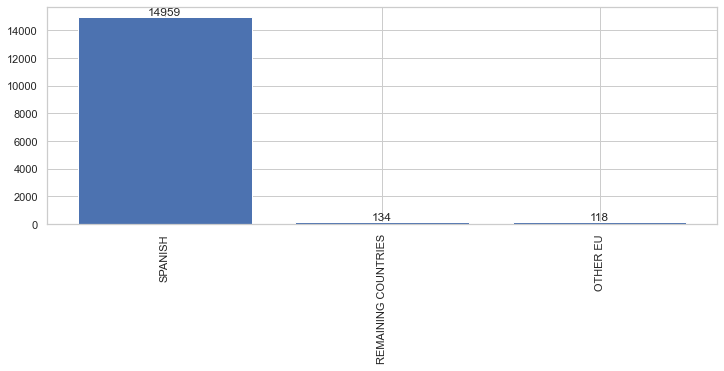

LLOC_NAIX_1A4 : WHAT IS YOUR PLACE OF BIRTH?


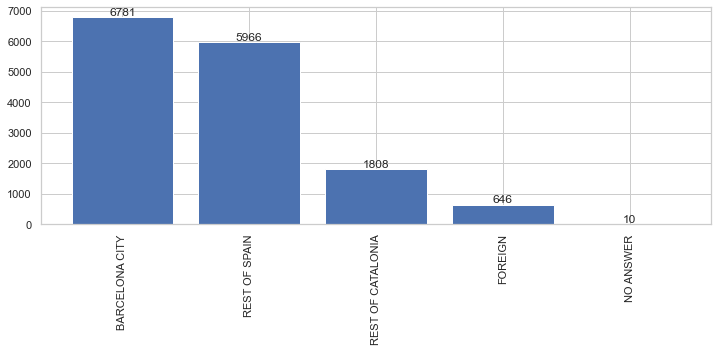

SITLABORAL : WHAT IS YOUR WORK SITUATION?


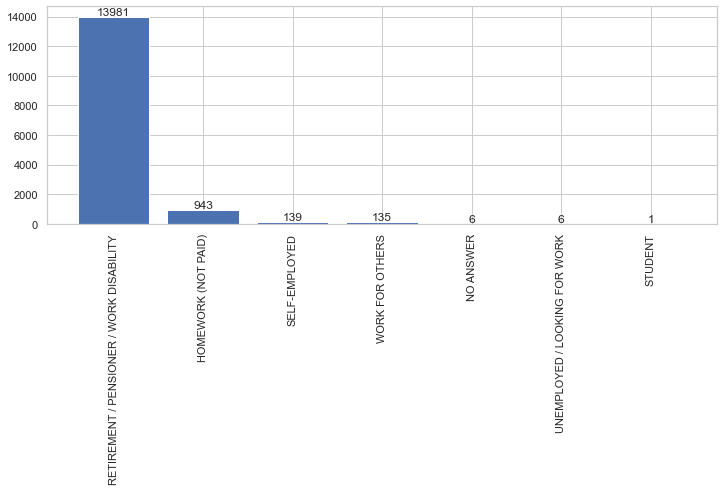

CLASSESOC_ENT : COULD YOU TELL ME WHAT SOCIAL CLASS DO YOU THINK YOU BELONG TO?


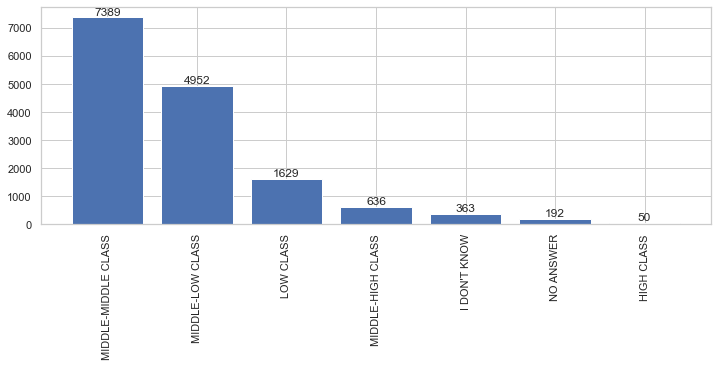

RESUM_PARENTIU : WHAT IS THE TYPE OF YOUR FAMILY?


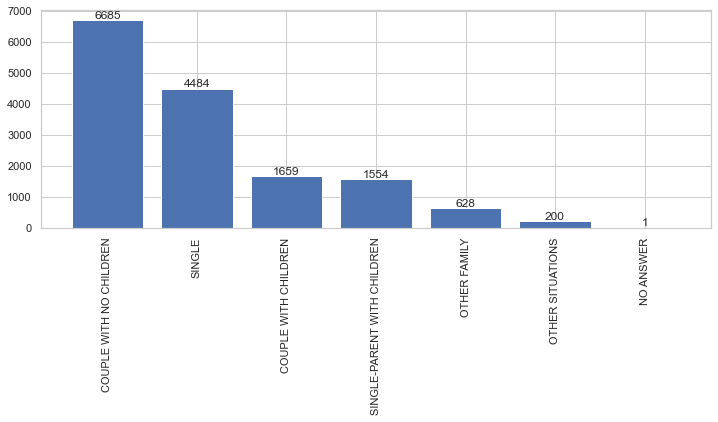

PROB_BCN_N1 : COULD YOU TELL ME WHAT IS THE MOST SERIOUS PROBLEM THE CITY OF BARCELONA HAS AT THE MOMENT? - GROUPED


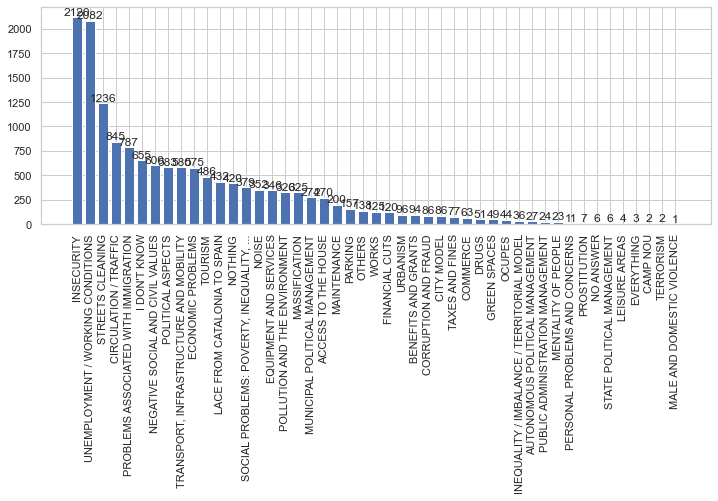

PROB_BARRI_N1 : WHAT IS THE MOST SERIOUS PROBLEM YOUR NEIGHBORHOOD HAS AT THE MOMENT? - GROUPED


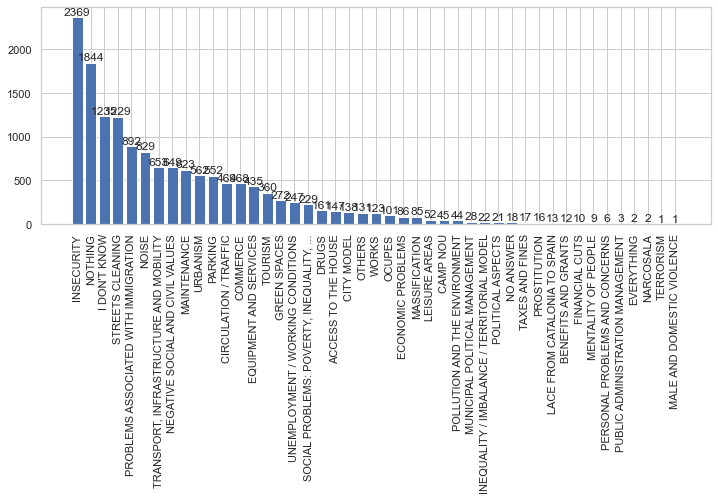

PROB_PERS_N1 : WHAT IS THE PROBLEM THAT AFFECTS YOU THE MOST? - GROUPED


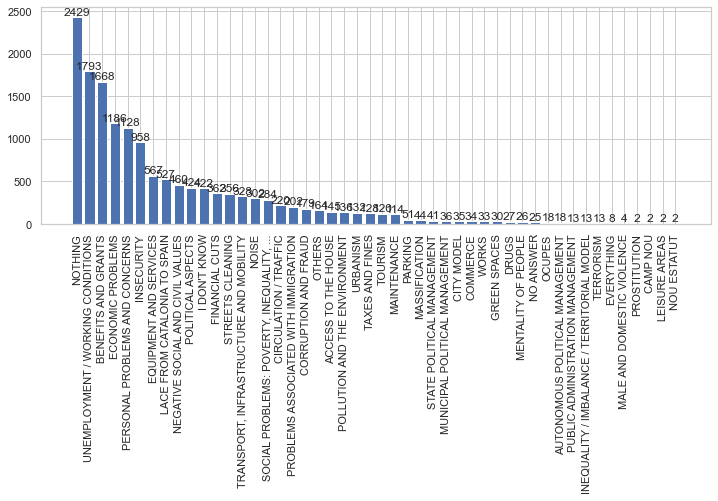

DEM_BCN_MUNI_N1 : WHAT WOULD YOU ASK THE CITY COUNCIL TO DO FOR THE CITY? - GROUPED


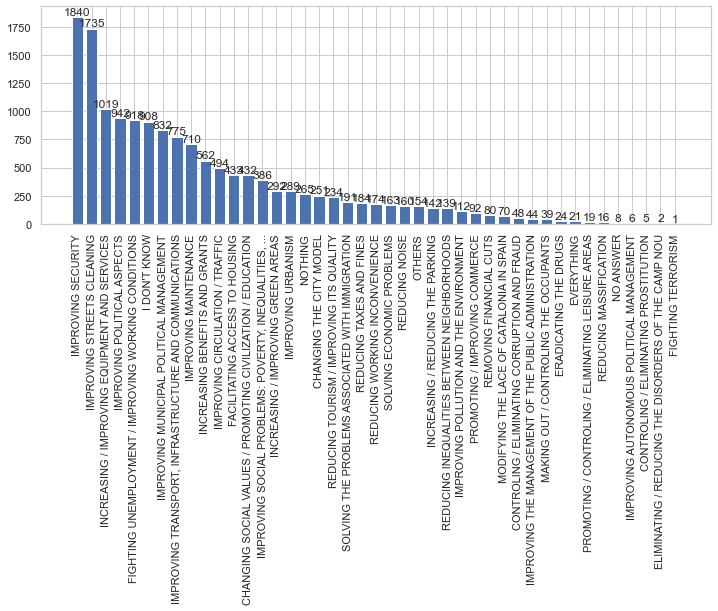

DEM_BARRI_N1 : WHAT WOULD YOU ASK THE CITY COUNCIL TO DO IN YOUR NEIGHBORHOOD? - GROUPED


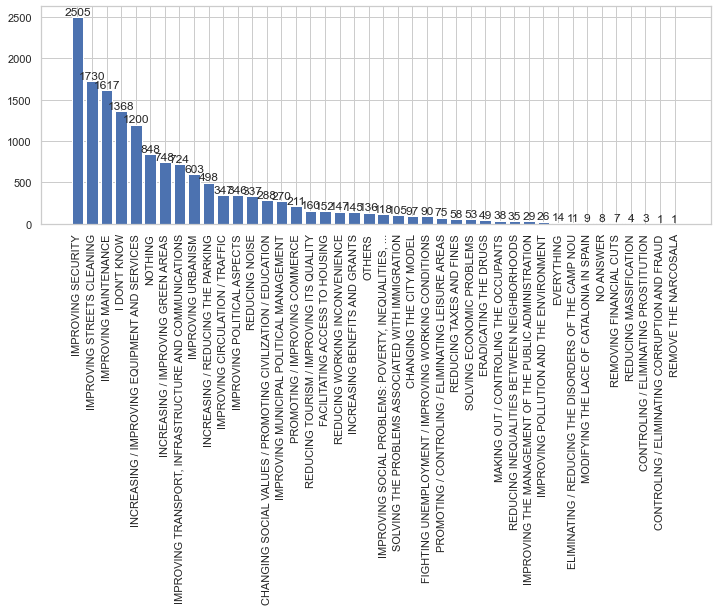

TRANSP_MOU : WHICH MEANS OF TRANSPORT DO YOU USE MOST FREQUENTLY ON A DAILY BASIS?


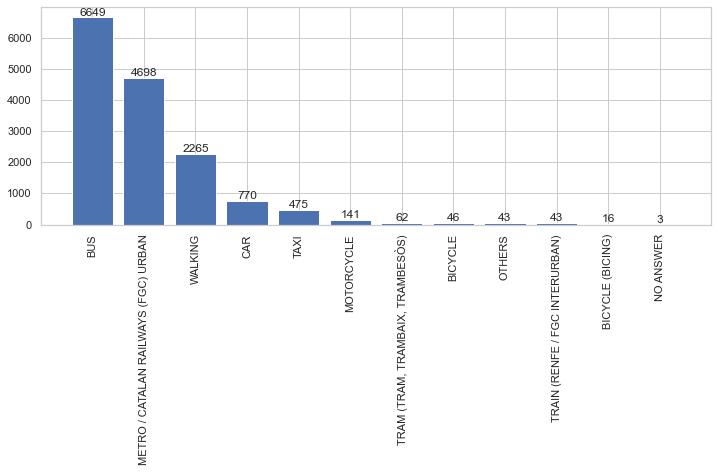

SENTPERTI : BELONGING - SPANISH VS CATALAN


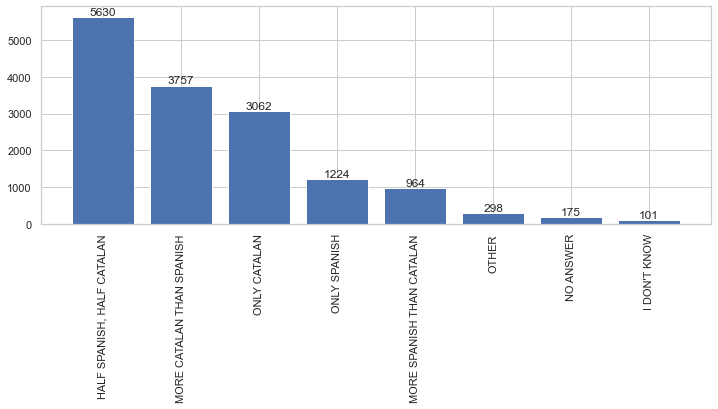

LLENGUA_HAB : WHAT IS YOUR USUAL LANGUAGE?


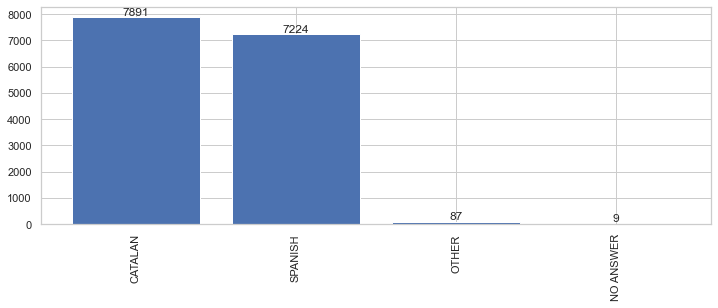

ESTUDIS_1A6 : WHAT IS YOUR LEVEL OF FINISHED STUDIES?


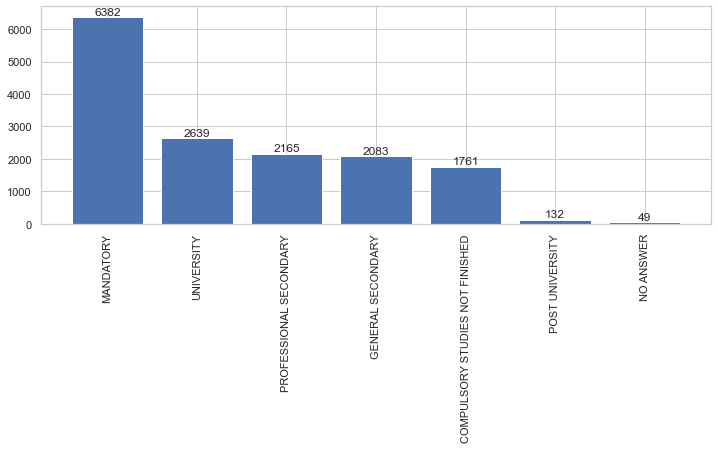

In [110]:
for i in additional_sample_description:
    print(i, ":", questions_dict[i])
    simple_plot(i)

In [111]:
for i in additional_sample_description:
    print(i, ":", questions_dict[i])
    display(size_pctg(i))

NACIO_ACT_UE : WHAT IS YOUR NATIONALITY?


NACIO_ACT_UE
OTHER EU                0.78
REMAINING COUNTRIES     0.88
SPANISH                98.34
dtype: float64

LLOC_NAIX_1A4 : WHAT IS YOUR PLACE OF BIRTH?


LLOC_NAIX_1A4
BARCELONA CITY       44.58
FOREIGN               4.25
NO ANSWER             0.07
REST OF CATALONIA    11.89
REST OF SPAIN        39.22
dtype: float64

SITLABORAL : WHAT IS YOUR WORK SITUATION?


SITLABORAL
HOMEWORK (NOT PAID)                          6.20
NO ANSWER                                    0.04
RETIREMENT / PENSIONER / WORK DISABILITY    91.91
SELF-EMPLOYED                                0.91
STUDENT                                      0.01
UNEMPLOYED / LOOKING FOR WORK                0.04
WORK FOR OTHERS                              0.89
dtype: float64

CLASSESOC_ENT : COULD YOU TELL ME WHAT SOCIAL CLASS DO YOU THINK YOU BELONG TO?


CLASSESOC_ENT
HIGH CLASS              0.33
I DON'T KNOW            2.39
LOW CLASS              10.71
MIDDLE-HIGH CLASS       4.18
MIDDLE-LOW CLASS       32.56
MIDDLE-MIDDLE CLASS    48.58
NO ANSWER               1.26
dtype: float64

RESUM_PARENTIU : WHAT IS THE TYPE OF YOUR FAMILY?


RESUM_PARENTIU
COUPLE WITH CHILDREN           10.91
COUPLE WITH NO CHILDREN        43.95
NO ANSWER                       0.01
OTHER FAMILY                    4.13
OTHER SITUATIONS                1.31
SINGLE                         29.48
SINGLE-PARENT WITH CHILDREN    10.22
dtype: float64

PROB_BCN_N1 : COULD YOU TELL ME WHAT IS THE MOST SERIOUS PROBLEM THE CITY OF BARCELONA HAS AT THE MOMENT? - GROUPED


PROB_BCN_N1
ACCESS TO THE HOUSE                            1.78
AUTONOMOUS POLITICAL MANAGEMENT                0.18
BENEFITS AND GRANTS                            0.62
CAMP NOU                                       0.01
CIRCULATION / TRAFFIC                          5.56
CITY MODEL                                     0.57
COMMERCE                                       0.41
CORRUPTION AND FRAUD                           0.57
DRUGS                                          0.34
ECONOMIC PROBLEMS                              3.78
EQUIPMENT AND SERVICES                         2.27
EVERYTHING                                     0.02
FINANCIAL CUTS                                 0.79
GREEN SPACES                                   0.32
I DON'T KNOW                                   4.31
INEQUALITY / IMBALANCE / TERRITORIAL MODEL     0.24
INSECURITY                                    13.94
LACE FROM CATALONIA TO SPAIN                   2.84
LEISURE AREAS                                  0.03


PROB_BARRI_N1 : WHAT IS THE MOST SERIOUS PROBLEM YOUR NEIGHBORHOOD HAS AT THE MOMENT? - GROUPED


PROB_BARRI_N1
ACCESS TO THE HOUSE                            0.97
BENEFITS AND GRANTS                            0.08
CAMP NOU                                       0.30
CIRCULATION / TRAFFIC                          3.08
CITY MODEL                                     0.91
COMMERCE                                       3.08
DRUGS                                          1.06
ECONOMIC PROBLEMS                              0.57
EQUIPMENT AND SERVICES                         2.86
EVERYTHING                                     0.01
FINANCIAL CUTS                                 0.07
GREEN SPACES                                   1.79
I DON'T KNOW                                   8.12
INEQUALITY / IMBALANCE / TERRITORIAL MODEL     0.14
INSECURITY                                    15.57
LACE FROM CATALONIA TO SPAIN                   0.09
LEISURE AREAS                                  0.34
MAINTENANCE                                    4.10
MALE AND DOMESTIC VIOLENCE                     0.0

PROB_PERS_N1 : WHAT IS THE PROBLEM THAT AFFECTS YOU THE MOST? - GROUPED


PROB_PERS_N1
ACCESS TO THE HOUSE                            0.95
AUTONOMOUS POLITICAL MANAGEMENT                0.12
BENEFITS AND GRANTS                           10.97
CAMP NOU                                       0.01
CIRCULATION / TRAFFIC                          1.45
CITY MODEL                                     0.23
COMMERCE                                       0.22
CORRUPTION AND FRAUD                           1.18
DRUGS                                          0.18
ECONOMIC PROBLEMS                              7.80
EQUIPMENT AND SERVICES                         3.73
EVERYTHING                                     0.05
FINANCIAL CUTS                                 2.38
GREEN SPACES                                   0.20
I DON'T KNOW                                   2.77
INEQUALITY / IMBALANCE / TERRITORIAL MODEL     0.09
INSECURITY                                     6.30
LACE FROM CATALONIA TO SPAIN                   3.46
LEISURE AREAS                                  0.01

DEM_BCN_MUNI_N1 : WHAT WOULD YOU ASK THE CITY COUNCIL TO DO FOR THE CITY? - GROUPED


DEM_BCN_MUNI_N1
CHANGING SOCIAL VALUES / PROMOTING CIVILIZATION / EDUCATION     2.84
CHANGING THE CITY MODEL                                         1.65
CONTROLING / ELIMINATING CORRUPTION AND FRAUD                   0.32
CONTROLING / ELIMINATING PROSTITUTION                           0.03
ELIMINATING / REDUCING THE DISORDERS OF THE CAMP NOU            0.01
ERADICATING THE DRUGS                                           0.16
EVERYTHING                                                      0.14
FACILITATING ACCESS TO HOUSING                                  2.85
FIGHTING TERRORISM                                              0.01
FIGHTING UNEMPLOYMENT / IMPROVING WORKING CONDITIONS            6.04
I DON'T KNOW                                                    5.97
IMPROVING AUTONOMOUS POLITICAL MANAGEMENT                       0.04
IMPROVING CIRCULATION / TRAFFIC                                 3.25
IMPROVING MAINTENANCE                                           4.67
IMPROVING MUNICIPA

DEM_BARRI_N1 : WHAT WOULD YOU ASK THE CITY COUNCIL TO DO IN YOUR NEIGHBORHOOD? - GROUPED


DEM_BARRI_N1
CHANGING SOCIAL VALUES / PROMOTING CIVILIZATION / EDUCATION     1.89
CHANGING THE CITY MODEL                                         0.64
CONTROLING / ELIMINATING CORRUPTION AND FRAUD                   0.01
CONTROLING / ELIMINATING PROSTITUTION                           0.02
ELIMINATING / REDUCING THE DISORDERS OF THE CAMP NOU            0.07
ERADICATING THE DRUGS                                           0.32
EVERYTHING                                                      0.09
FACILITATING ACCESS TO HOUSING                                  1.00
FIGHTING UNEMPLOYMENT / IMPROVING WORKING CONDITIONS            0.59
I DON'T KNOW                                                    8.99
IMPROVING CIRCULATION / TRAFFIC                                 2.28
IMPROVING MAINTENANCE                                          10.63
IMPROVING MUNICIPAL POLITICAL MANAGEMENT                        1.78
IMPROVING POLITICAL ASPECTS                                     2.27
IMPROVING POLLUTION A

TRANSP_MOU : WHICH MEANS OF TRANSPORT DO YOU USE MOST FREQUENTLY ON A DAILY BASIS?


TRANSP_MOU
BICYCLE                                  0.30
BICYCLE (BICING)                         0.11
BUS                                     43.71
CAR                                      5.06
METRO / CATALAN RAILWAYS (FGC) URBAN    30.89
MOTORCYCLE                               0.93
NO ANSWER                                0.02
OTHERS                                   0.28
TAXI                                     3.12
TRAIN (RENFE / FGC INTERURBAN)           0.28
TRAM (TRAM, TRAMBAIX, TRAMBESÒS)         0.41
WALKING                                 14.89
dtype: float64

SENTPERTI : BELONGING - SPANISH VS CATALAN


SENTPERTI
HALF SPANISH, HALF CATALAN    37.01
I DON'T KNOW                   0.66
MORE CATALAN THAN SPANISH     24.70
MORE SPANISH THAN CATALAN      6.34
NO ANSWER                      1.15
ONLY CATALAN                  20.13
ONLY SPANISH                   8.05
OTHER                          1.96
dtype: float64

LLENGUA_HAB : WHAT IS YOUR USUAL LANGUAGE?


LLENGUA_HAB
CATALAN      51.88
NO ANSWER     0.06
OTHER         0.57
SPANISH      47.49
dtype: float64

ESTUDIS_1A6 : WHAT IS YOUR LEVEL OF FINISHED STUDIES?


ESTUDIS_1A6
COMPULSORY STUDIES NOT FINISHED    11.58
GENERAL SECONDARY                  13.69
MANDATORY                          41.96
NO ANSWER                           0.32
POST UNIVERSITY                     0.87
PROFESSIONAL SECONDARY             14.23
UNIVERSITY                         17.35
dtype: float64

In [112]:
for i in additional_sample_description:
    print(i, ":", questions_dict[i])
    display(ctab(i))

NACIO_ACT_UE : WHAT IS YOUR NATIONALITY?


Would_live_in_another_neighborhood,0.0,1.0
NACIO_ACT_UE,,
OTHER EU,100,7
REMAINING COUNTRIES,101,17
SPANISH,11465,1437


LLOC_NAIX_1A4 : WHAT IS YOUR PLACE OF BIRTH?


Would_live_in_another_neighborhood,0.0,1.0
LLOC_NAIX_1A4,,
BARCELONA CITY,5212,722
FOREIGN,500,67
NO ANSWER,9,1
REST OF CATALONIA,1412,139
REST OF SPAIN,4533,532


SITLABORAL : WHAT IS YOUR WORK SITUATION?


Would_live_in_another_neighborhood,0.0,1.0
SITLABORAL,,
HOMEWORK (NOT PAID),730,93
NO ANSWER,5,0
RETIREMENT / PENSIONER / WORK DISABILITY,10736,1343
SELF-EMPLOYED,99,14
STUDENT,1,0
UNEMPLOYED / LOOKING FOR WORK,5,1
WORK FOR OTHERS,90,10


CLASSESOC_ENT : COULD YOU TELL ME WHAT SOCIAL CLASS DO YOU THINK YOU BELONG TO?


Would_live_in_another_neighborhood,0.0,1.0
CLASSESOC_ENT,,
HIGH CLASS,47,2
I DON'T KNOW,282,23
LOW CLASS,1150,194
MIDDLE-HIGH CLASS,525,51
MIDDLE-LOW CLASS,3676,535
MIDDLE-MIDDLE CLASS,5843,635
NO ANSWER,143,21


RESUM_PARENTIU : WHAT IS THE TYPE OF YOUR FAMILY?


Would_live_in_another_neighborhood,0.0,1.0
RESUM_PARENTIU,,
COUPLE WITH CHILDREN,1207,150
COUPLE WITH NO CHILDREN,5105,646
NO ANSWER,1,0
OTHER FAMILY,469,69
OTHER SITUATIONS,167,12
SINGLE,3534,448
SINGLE-PARENT WITH CHILDREN,1183,136


PROB_BCN_N1 : COULD YOU TELL ME WHAT IS THE MOST SERIOUS PROBLEM THE CITY OF BARCELONA HAS AT THE MOMENT? - GROUPED


Would_live_in_another_neighborhood,0.0,1.0
PROB_BCN_N1,,
ACCESS TO THE HOUSE,204,30
AUTONOMOUS POLITICAL MANAGEMENT,16,5
BENEFITS AND GRANTS,73,12
CAMP NOU,2,0
CIRCULATION / TRAFFIC,664,57
CITY MODEL,61,9
COMMERCE,50,7
CORRUPTION AND FRAUD,66,5
DRUGS,34,8


PROB_BARRI_N1 : WHAT IS THE MOST SERIOUS PROBLEM YOUR NEIGHBORHOOD HAS AT THE MOMENT? - GROUPED


Would_live_in_another_neighborhood,0.0,1.0
PROB_BARRI_N1,,
ACCESS TO THE HOUSE,117,11
BENEFITS AND GRANTS,11,1
CAMP NOU,38,2
CIRCULATION / TRAFFIC,387,33
CITY MODEL,93,16
COMMERCE,360,54
DRUGS,84,29
ECONOMIC PROBLEMS,67,7
EQUIPMENT AND SERVICES,341,36


PROB_PERS_N1 : WHAT IS THE PROBLEM THAT AFFECTS YOU THE MOST? - GROUPED


Would_live_in_another_neighborhood,0.0,1.0
PROB_PERS_N1,,
ACCESS TO THE HOUSE,108,18
AUTONOMOUS POLITICAL MANAGEMENT,11,2
BENEFITS AND GRANTS,1251,169
CAMP NOU,1,0
CIRCULATION / TRAFFIC,166,16
CITY MODEL,25,5
COMMERCE,25,3
CORRUPTION AND FRAUD,134,17
DRUGS,22,2


DEM_BCN_MUNI_N1 : WHAT WOULD YOU ASK THE CITY COUNCIL TO DO FOR THE CITY? - GROUPED


Would_live_in_another_neighborhood,0.0,1.0
DEM_BCN_MUNI_N1,,
CHANGING SOCIAL VALUES / PROMOTING CIVILIZATION / EDUCATION,312,43
CHANGING THE CITY MODEL,176,30
CONTROLING / ELIMINATING CORRUPTION AND FRAUD,34,7
CONTROLING / ELIMINATING PROSTITUTION,1,2
ELIMINATING / REDUCING THE DISORDERS OF THE CAMP NOU,2,0
ERADICATING THE DRUGS,17,3
EVERYTHING,18,1
FACILITATING ACCESS TO HOUSING,318,52
FIGHTING TERRORISM,1,0


DEM_BARRI_N1 : WHAT WOULD YOU ASK THE CITY COUNCIL TO DO IN YOUR NEIGHBORHOOD? - GROUPED


Would_live_in_another_neighborhood,0.0,1.0
DEM_BARRI_N1,,
CHANGING SOCIAL VALUES / PROMOTING CIVILIZATION / EDUCATION,210,35
CHANGING THE CITY MODEL,71,11
CONTROLING / ELIMINATING PROSTITUTION,0,1
ELIMINATING / REDUCING THE DISORDERS OF THE CAMP NOU,8,0
ERADICATING THE DRUGS,29,8
EVERYTHING,11,2
FACILITATING ACCESS TO HOUSING,113,17
FIGHTING UNEMPLOYMENT / IMPROVING WORKING CONDITIONS,77,4
I DON'T KNOW,1100,95


TRANSP_MOU : WHICH MEANS OF TRANSPORT DO YOU USE MOST FREQUENTLY ON A DAILY BASIS?


Would_live_in_another_neighborhood,0.0,1.0
TRANSP_MOU,,
BICYCLE,34,6
BICYCLE (BICING),11,5
BUS,5078,694
CAR,579,58
METRO / CATALAN RAILWAYS (FGC) URBAN,3567,468
MOTORCYCLE,95,14
NO ANSWER,2,0
OTHERS,31,4
TAXI,412,31


SENTPERTI : BELONGING - SPANISH VS CATALAN


Would_live_in_another_neighborhood,0.0,1.0
SENTPERTI,,
"HALF SPANISH, HALF CATALAN",4350,546
I DON'T KNOW,73,9
MORE CATALAN THAN SPANISH,2942,359
MORE SPANISH THAN CATALAN,699,90
NO ANSWER,128,16
ONLY CATALAN,2372,293
ONLY SPANISH,886,112
OTHER,216,36


LLENGUA_HAB : WHAT IS YOUR USUAL LANGUAGE?


Would_live_in_another_neighborhood,0.0,1.0
LLENGUA_HAB,,
CATALAN,6185,741
NO ANSWER,6,0
OTHER,57,16
SPANISH,5418,704


ESTUDIS_1A6 : WHAT IS YOUR LEVEL OF FINISHED STUDIES?


Would_live_in_another_neighborhood,0.0,1.0
ESTUDIS_1A6,,
COMPULSORY STUDIES NOT FINISHED,1353,151
GENERAL SECONDARY,1574,206
MANDATORY,4943,609
NO ANSWER,39,6
POST UNIVERSITY,96,11
PROFESSIONAL SECONDARY,1644,217
UNIVERSITY,2017,261


#### City services - to check satsfaction level

In [113]:
# ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN BARCELONA?
x = 'SATISF_RES_BCN_0A10'
data[x].unique()

array([7, 8, 10, 9, 6, 4, 5, 1, 2, "I DON'T KNOW", 0, 3, 'NO ANSWER'],
      dtype=object)

In [114]:
data_prep = {0: 0,
             1: 0,
             2: 0,
             3: 0,
             4: 0,
             5: 0,
             6: 0, 
             7: 1,
             8: 1,
             9: 1, 
             10: 1,  
             "I DON'T KNOW": 0, 
             'NO ANSWER': np.nan}
data['Residential_satisfaction'] = [data_prep[i] for i in data[x]]

In [115]:
print("City services: \n")
for i in city_services:
    print(i, ":", questions_dict[i])

City services: 

VAL_ESCOMBRARIES : CITY SERVICES - RATE: GARBAGE COLLECTION
VAL_NETEJA : CITY SERVICES - RATE: STREETS CLEANING
VAL_SOROLL : CITY SERVICES - RATE: NOISE
VAL_VERD : CITY SERVICES - RATE: GREEN AREAS
VAL_ENLLUM : CITY SERVICES - RATE: PUBLIC LIGHTING
VAL_URBA : CITY SERVICES - RATE: URBANISM
VAL_ASFALT : CITY SERVICES - RATE: ASPHALT AND STREET CONSERVATION
VAL_FACANES : CITY SERVICES - RATE: FACADES AND BUILDING CONSERVATION
VAL_CIRCUL : CITY SERVICES - RATE: CIRCULATION AND TRAFFIC
VAL_APARCA : CITY SERVICES - RATE: PARKING
VAL_BUS : CITY SERVICES - RATE: BUS
VAL_METRO : CITY SERVICES - RATE: SUBWAY
VAL_BICING : CITY SERVICES - RATE: BICING
VAL_GUB : CITY SERVICES - RATE: MUNICIPAL POLICE
VAL_SEGUR : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE
VAL_SEGUR_BARRI : CITY SERVICES - RATE: CITIZEN SECURITY IN THE NEIGHBORHOOD
VAL_ESPORT : CITY SERVICES - RATE: SPORTS FACILITIES
VAL_SIAC : CITY SERVICES - RATE: CITIZEN INFORMATION AND SERVICE SERVICES
VAL_CSS

VAL_ESCOMBRARIES : CITY SERVICES - RATE: GARBAGE COLLECTION


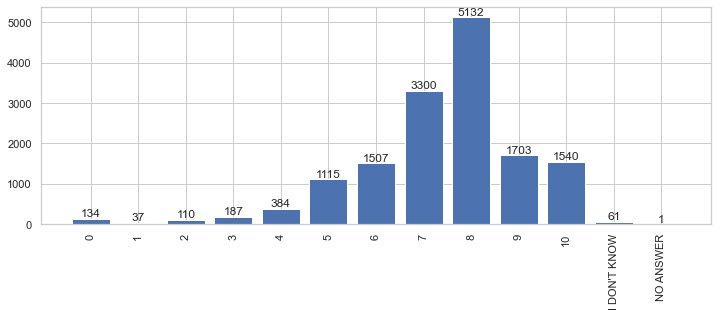

VAL_NETEJA : CITY SERVICES - RATE: STREETS CLEANING


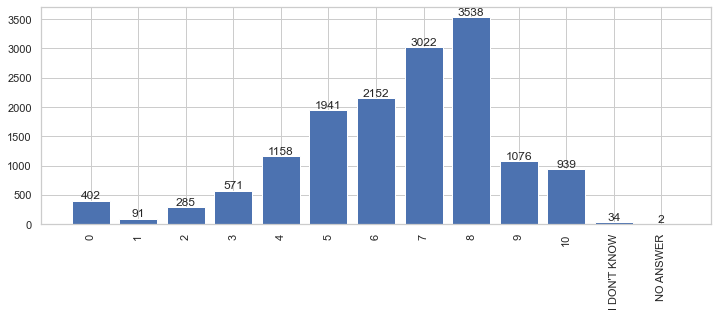

VAL_SOROLL : CITY SERVICES - RATE: NOISE


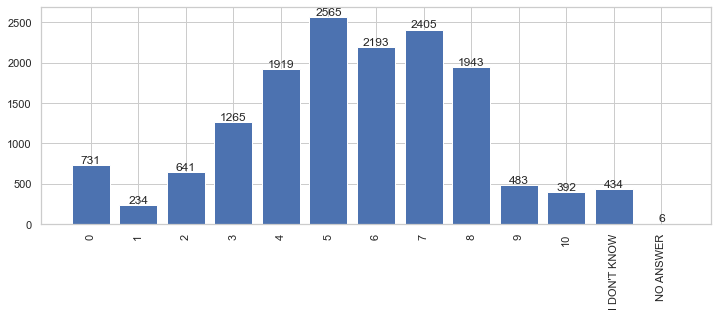

VAL_VERD : CITY SERVICES - RATE: GREEN AREAS


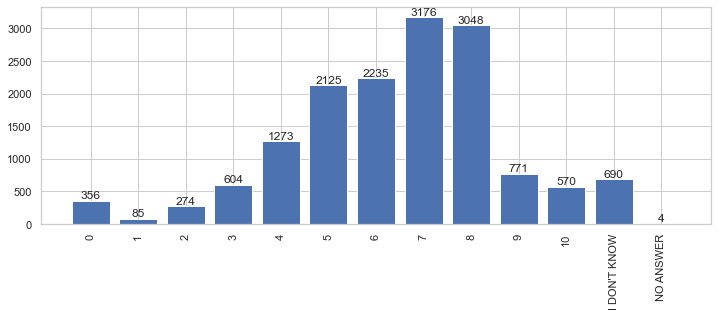

VAL_ENLLUM : CITY SERVICES - RATE: PUBLIC LIGHTING


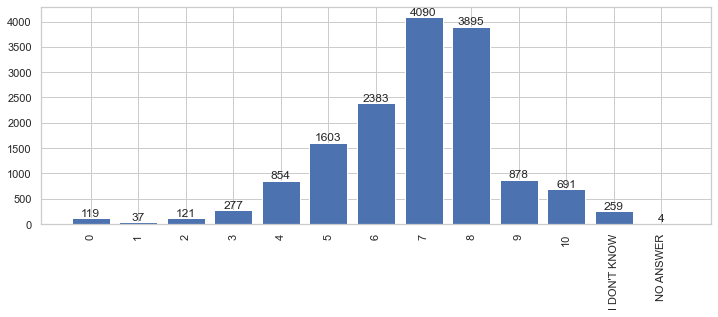

VAL_URBA : CITY SERVICES - RATE: URBANISM


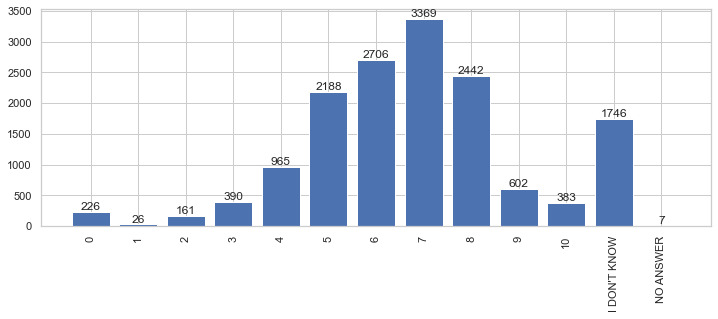

VAL_ASFALT : CITY SERVICES - RATE: ASPHALT AND STREET CONSERVATION


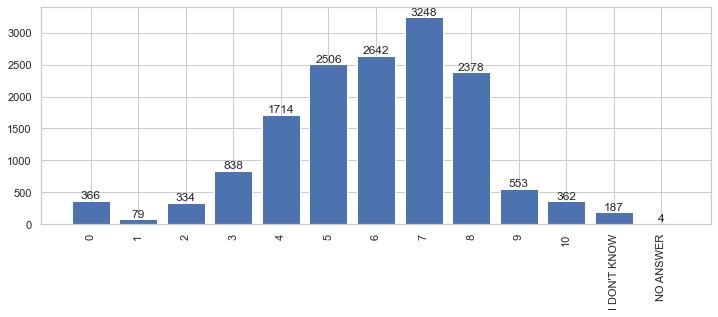

VAL_FACANES : CITY SERVICES - RATE: FACADES AND BUILDING CONSERVATION


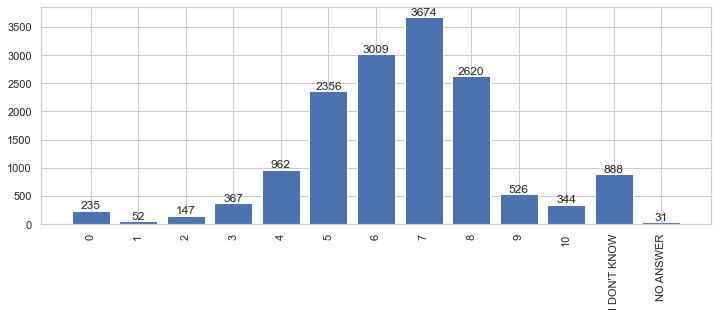

VAL_CIRCUL : CITY SERVICES - RATE: CIRCULATION AND TRAFFIC


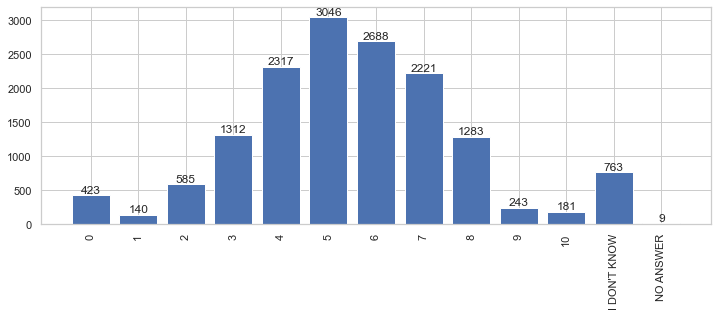

VAL_APARCA : CITY SERVICES - RATE: PARKING


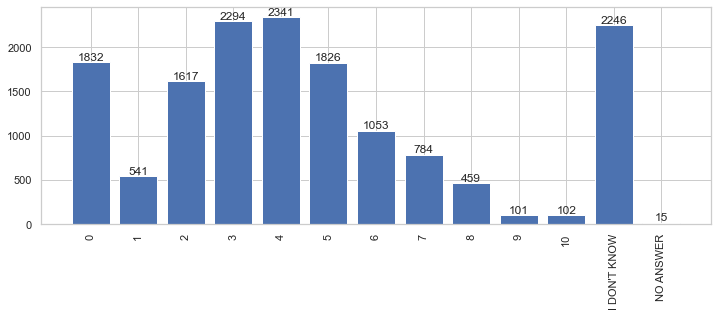

VAL_BUS : CITY SERVICES - RATE: BUS


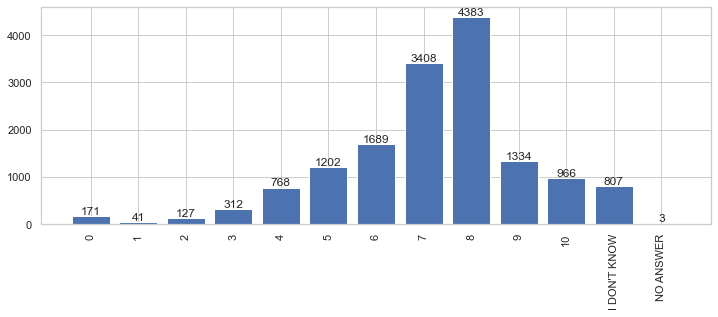

VAL_METRO : CITY SERVICES - RATE: SUBWAY


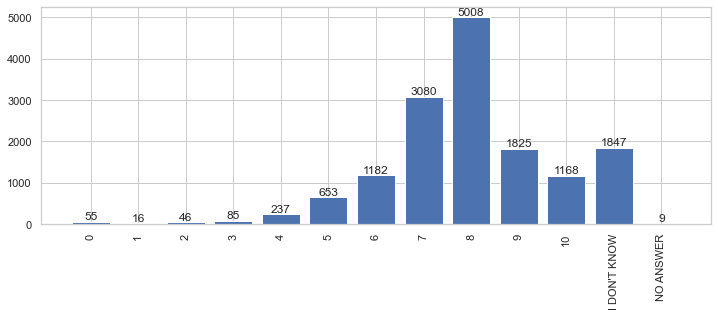

VAL_BICING : CITY SERVICES - RATE: BICING


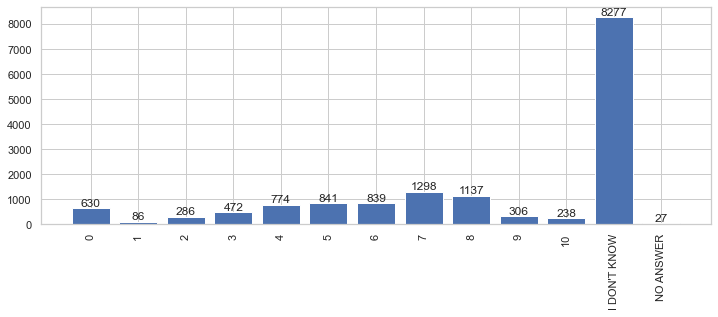

VAL_GUB : CITY SERVICES - RATE: MUNICIPAL POLICE


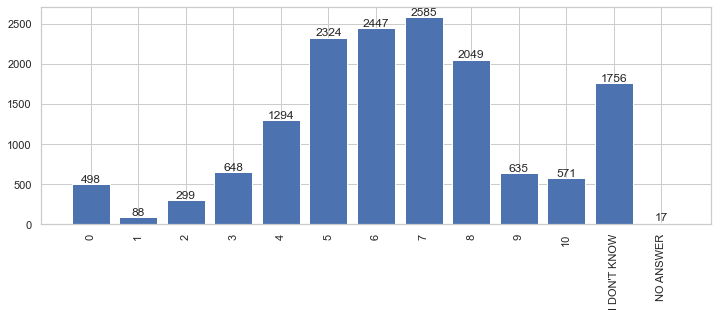

VAL_SEGUR : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE


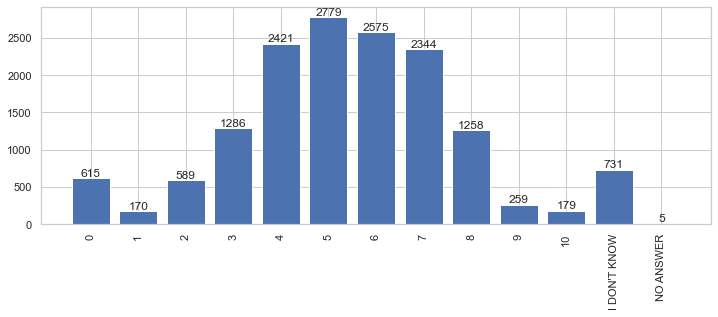

VAL_SEGUR_BARRI : CITY SERVICES - RATE: CITIZEN SECURITY IN THE NEIGHBORHOOD


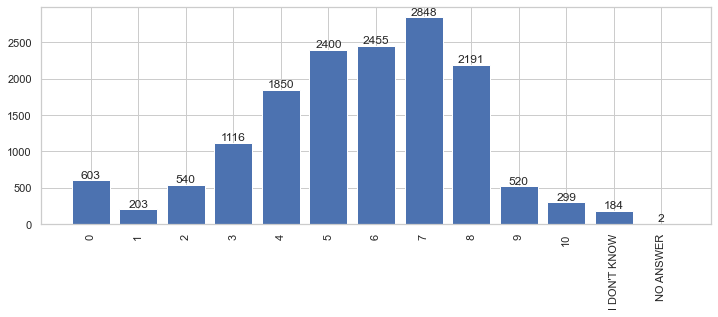

VAL_ESPORT : CITY SERVICES - RATE: SPORTS FACILITIES


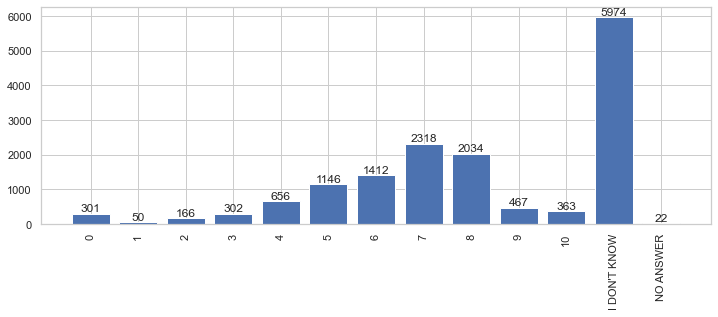

VAL_SIAC : CITY SERVICES - RATE: CITIZEN INFORMATION AND SERVICE SERVICES


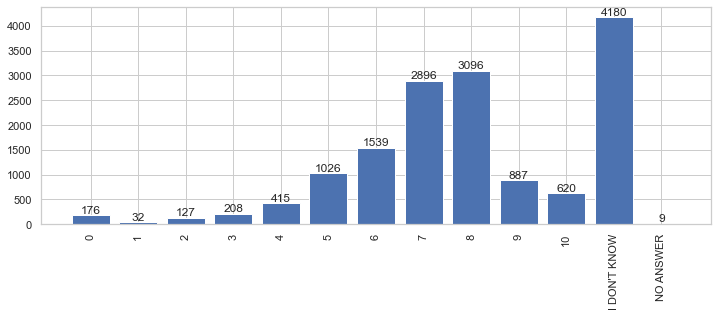

VAL_CSS : CITY SERVICES - RATE: SOCIAL SERVICES CENTERS


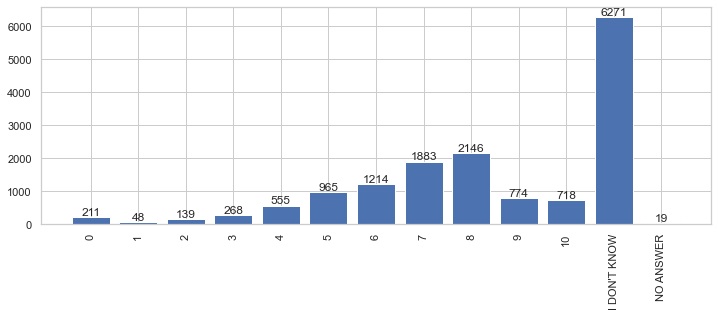

VAL_CULT : CITY SERVICES - RATE: CULTURAL ACTIVITIES


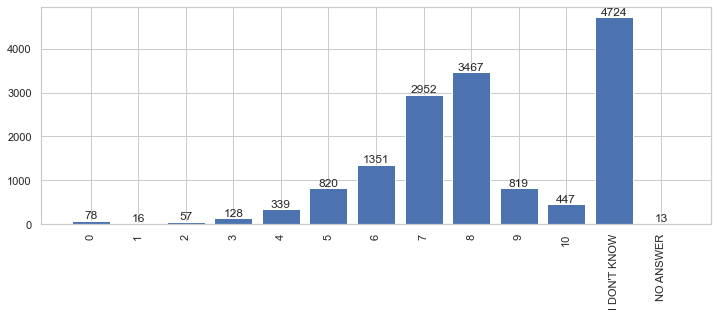

VAL_FESTESPOP : CITY SERVICES - RATE: POPULAR FESTIVALS


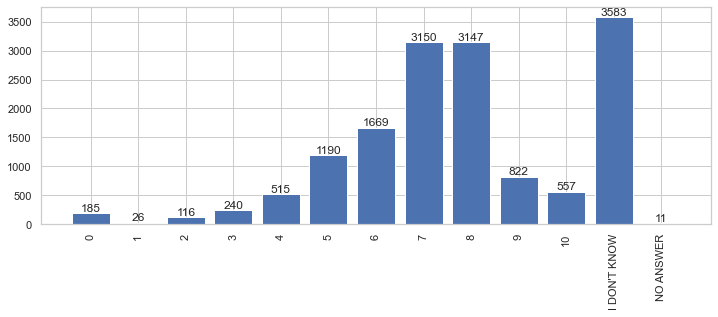

VAL_MERCAT : CITY SERVICES - RATE: MUNICIPAL MARKETS


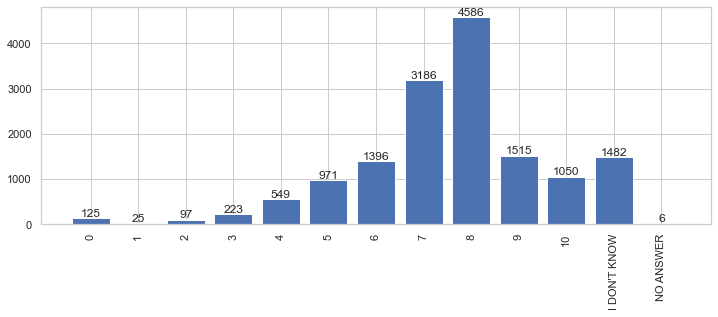

VAL_BIBLIO : CITY SERVICES - RATE: PUBLIC LIBRARIES


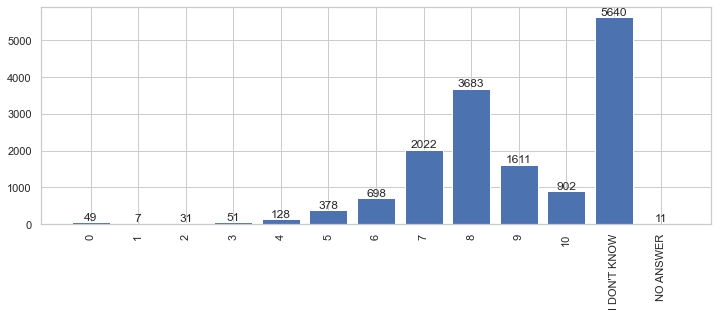

VAL_GESTMUNI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?


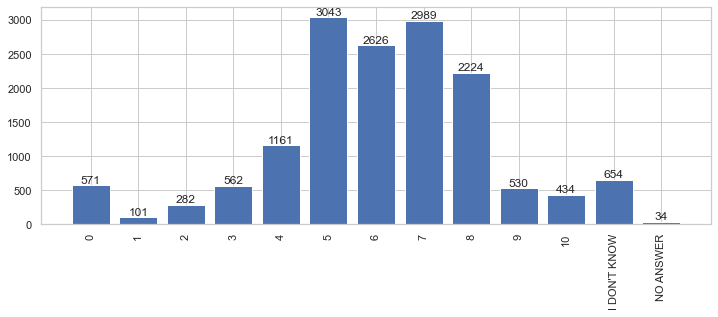

In [116]:
for i in city_services:
    print(i, ":", questions_dict[i])
    simple_plot(i)

In [117]:
city_services = ['VAL_ESCOMBRARIES', 'VAL_NETEJA', 'VAL_SOROLL', 'VAL_VERD', 
                 'VAL_ENLLUM', 'VAL_ASFALT', 'VAL_CIRCUL', 'VAL_BUS', 'VAL_SEGUR']

In [118]:
for i in city_services:
    print(i, ":", questions_dict[i])
    display(size_pctg(i))

VAL_ESCOMBRARIES : CITY SERVICES - RATE: GARBAGE COLLECTION


VAL_ESCOMBRARIES
0                0.88
1                0.24
2                0.72
3                1.23
4                2.52
5                7.33
6                9.91
7               21.69
8               33.74
9               11.20
10              10.12
I DON'T KNOW     0.40
NO ANSWER        0.01
dtype: float64

VAL_NETEJA : CITY SERVICES - RATE: STREETS CLEANING


VAL_NETEJA
0                2.64
1                0.60
2                1.87
3                3.75
4                7.61
5               12.76
6               14.15
7               19.87
8               23.26
9                7.07
10               6.17
I DON'T KNOW     0.22
NO ANSWER        0.01
dtype: float64

VAL_SOROLL : CITY SERVICES - RATE: NOISE


VAL_SOROLL
0                4.81
1                1.54
2                4.21
3                8.32
4               12.62
5               16.86
6               14.42
7               15.81
8               12.77
9                3.18
10               2.58
I DON'T KNOW     2.85
NO ANSWER        0.04
dtype: float64

VAL_VERD : CITY SERVICES - RATE: GREEN AREAS


VAL_VERD
0                2.34
1                0.56
2                1.80
3                3.97
4                8.37
5               13.97
6               14.69
7               20.88
8               20.04
9                5.07
10               3.75
I DON'T KNOW     4.54
NO ANSWER        0.03
dtype: float64

VAL_ENLLUM : CITY SERVICES - RATE: PUBLIC LIGHTING


VAL_ENLLUM
0                0.78
1                0.24
2                0.80
3                1.82
4                5.61
5               10.54
6               15.67
7               26.89
8               25.61
9                5.77
10               4.54
I DON'T KNOW     1.70
NO ANSWER        0.03
dtype: float64

VAL_ASFALT : CITY SERVICES - RATE: ASPHALT AND STREET CONSERVATION


VAL_ASFALT
0                2.41
1                0.52
2                2.20
3                5.51
4               11.27
5               16.47
6               17.37
7               21.35
8               15.63
9                3.64
10               2.38
I DON'T KNOW     1.23
NO ANSWER        0.03
dtype: float64

VAL_CIRCUL : CITY SERVICES - RATE: CIRCULATION AND TRAFFIC


VAL_CIRCUL
0                2.78
1                0.92
2                3.85
3                8.63
4               15.23
5               20.02
6               17.67
7               14.60
8                8.43
9                1.60
10               1.19
I DON'T KNOW     5.02
NO ANSWER        0.06
dtype: float64

VAL_BUS : CITY SERVICES - RATE: BUS


VAL_BUS
0                1.12
1                0.27
2                0.83
3                2.05
4                5.05
5                7.90
6               11.10
7               22.40
8               28.81
9                8.77
10               6.35
I DON'T KNOW     5.31
NO ANSWER        0.02
dtype: float64

VAL_SEGUR : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE


VAL_SEGUR
0                4.04
1                1.12
2                3.87
3                8.45
4               15.92
5               18.27
6               16.93
7               15.41
8                8.27
9                1.70
10               1.18
I DON'T KNOW     4.81
NO ANSWER        0.03
dtype: float64

In [119]:
for i in city_services:
    print(i, ":", questions_dict[i])
    display(ctab(i))

VAL_ESCOMBRARIES : CITY SERVICES - RATE: GARBAGE COLLECTION


Would_live_in_another_neighborhood,0.0,1.0
VAL_ESCOMBRARIES,,
0,77,17
1,24,8
2,72,18
3,117,29
4,271,37
5,807,116
6,1148,149
7,2550,311
8,3957,511


VAL_NETEJA : CITY SERVICES - RATE: STREETS CLEANING


Would_live_in_another_neighborhood,0.0,1.0
VAL_NETEJA,,
0,251,52
1,59,12
2,191,37
3,382,80
4,836,136
5,1462,201
6,1627,231
7,2390,257
8,2820,301


VAL_SOROLL : CITY SERVICES - RATE: NOISE


Would_live_in_another_neighborhood,0.0,1.0
VAL_SOROLL,,
0,434,101
1,149,38
2,428,85
3,879,150
4,1427,201
5,2016,216
6,1745,191
7,1918,212
8,1592,160


VAL_VERD : CITY SERVICES - RATE: GREEN AREAS


Would_live_in_another_neighborhood,0.0,1.0
VAL_VERD,,
0,214,51
1,52,14
2,187,38
3,411,67
4,894,160
5,1529,250
6,1691,219
7,2525,252
8,2469,266


VAL_ENLLUM : CITY SERVICES - RATE: PUBLIC LIGHTING


Would_live_in_another_neighborhood,0.0,1.0
VAL_ENLLUM,,
0,83,12
1,26,4
2,70,21
3,183,41
4,617,97
5,1173,184
6,1824,218
7,3180,377
8,3045,350


VAL_ASFALT : CITY SERVICES - RATE: ASPHALT AND STREET CONSERVATION


Would_live_in_another_neighborhood,0.0,1.0
VAL_ASFALT,,
0,236,45
1,50,10
2,223,42
3,565,102
4,1244,185
5,1885,269
6,2075,222
7,2592,288
8,1904,210


VAL_CIRCUL : CITY SERVICES - RATE: CIRCULATION AND TRAFFIC


Would_live_in_another_neighborhood,0.0,1.0
VAL_CIRCUL,,
0,280,41
1,88,16
2,412,57
3,962,144
4,1744,237
5,2362,293
6,2074,274
7,1759,171
8,1033,128


VAL_BUS : CITY SERVICES - RATE: BUS


Would_live_in_another_neighborhood,0.0,1.0
VAL_BUS,,
0,121,19
1,26,5
2,77,22
3,205,41
4,549,103
5,851,142
6,1280,171
7,2631,315
8,3418,403


VAL_SEGUR : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE


Would_live_in_another_neighborhood,0.0,1.0
VAL_SEGUR,,
0,394,74
1,104,21
2,395,76
3,938,133
4,1828,253
5,2155,271
6,2042,228
7,1883,196
8,1008,93


In [120]:
data_prep = {0: 0,
             1: 0,
             2: 0,
             3: 0,
             4: 0,
             5: 0,
             6: 0, 
             7: 1,
             8: 1,
             9: 1, 
             10: 1,  
             "I DON'T KNOW": 0, 
             'NO ANSWER': np.nan}
for x in city_services:
    data[questions_dict[x][22:]] = [data_prep[i] for i in data[x]]

## 1.5.3 Feature engineering

Creating comparable variables - if respondends rate the city higher than the neighbourhood: 
'BCN_if_has_improved' & 'Barri_if_has_improved', 'BCN_if_will_improve' & 'Barri_if_will_improve', 'BCN_satisfaction_of_living' & 'Barri_satisfaction_of_living', 'BCN_city_management' & 'Barri_city_management', 'BCN_transport' & 'Barri_transport'.

In [121]:
data['BCN_evolution'].unique()

array(['IT HAS WORSENED', 'IT HAS IMPROVED', 'IT IS THE SAME', nan],
      dtype=object)

In [122]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_evolution'] == 'IT HAS IMPROVED' and data.iloc[j]['Barri_evolution'] == "IT HAS WORSENED":
        new_column.append(1)
    elif data.iloc[j]['BCN_evolution'] == 'IT HAS IMPROVED' and data.iloc[j]['Barri_evolution'] == "IT IS THE SAME":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_evolution'] = new_column

In [123]:
data['BCN_future'].unique()

array(['IT WILL WORSEN', 'IT WILL IMPROVE', 'IT WILL STAY THE SAME', nan],
      dtype=object)

In [124]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_future'] == 'IT WILL IMPROVE' and data.iloc[j]['Barri_future'] == "IT WILL WORSEN":
        new_column.append(1)
    elif data.iloc[j]['BCN_future'] == 'IT WILL IMPROVE' and data.iloc[j]['Barri_future'] == "IT WILL STAY THE SAME":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_future'] = new_column

In [125]:
data['BCN_satisfaction'].unique()

array(['SATISFIED', 'FAIRLY SATISFIED', 'NOT SATISFIED', nan],
      dtype=object)

In [126]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_satisfaction'] == 'SATISFIED' and data.iloc[j]['Barri_satisfaction'] == "NOT SATISFIED":
        new_column.append(1)
    elif data.iloc[j]['BCN_satisfaction'] == 'SATISFIED' and data.iloc[j]['Barri_satisfaction'] == "FAIRLY SATISFIED":
        new_column.append(1)
    elif data.iloc[j]['BCN_satisfaction'] == 'FAIRLY SATISFIED' and data.iloc[j]['Barri_satisfaction'] == "NOT SATISFIED":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_satisfaction'] = new_column

In [127]:
data['BCN_transport'].unique()

array(['GOOD', 'NEITHER BAD, NOR GOOD', 'BAD', nan], dtype=object)

In [128]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_transport'] == 'GOOD' and data.iloc[j]['Barri_transport'] == "BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_transport'] == 'GOOD' and data.iloc[j]['Barri_transport'] == "NEITHER GOOD, NOR BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_transport'] == 'NEITHER BAD, NOR GOOD' and data.iloc[j]['Barri_transport'] == "BAD":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_transport'] = new_column

In [129]:
data['BCN_management'].unique()

array(['NEITHER BAD, NOR GOOD', 'GOOD', 'BAD', nan], dtype=object)

In [130]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_management'] == 'GOOD' and data.iloc[j]['Barri_management'] == "BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_management'] == 'GOOD' and data.iloc[j]['Barri_management'] == "NEITHER GOOD, NOR BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_management'] == 'NEITHER BAD, NOR GOOD' and data.iloc[j]['Barri_management'] == "BAD":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_management'] = new_column

In [131]:
data['BCN_security'].unique()

array(['NEITHER BAD, NOR GOOD', 'BAD', 'GOOD', nan], dtype=object)

In [132]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_security'] == 'GOOD' and data.iloc[j]['Barri_security'] == "BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_security'] == 'GOOD' and data.iloc[j]['Barri_security'] == "NEITHER GOOD, NOR BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_security'] == 'NEITHER BAD, NOR GOOD' and data.iloc[j]['Barri_security'] == "BAD":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_security'] = new_column

# 1.6 Final dataset

In [133]:
data.head()

,ANY,NOM_DISTRICTE,SEXE,EDAT1899_1A6,NACIO_ACT_UE,SITLABORAL,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,EVO1A_BCN,FUTUR_BCN,...,ASPHALT AND STREET CONSERVATION,CIRCULATION AND TRAFFIC,BUS,CITIZEN SECURITY IN THE CITY AS A WHOLE,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction,BCN_over_barri_transport,BCN_over_barri_management,BCN_over_barri_security
75815,2010,CIUTAT VELLA,WOMAN,65 YEARS AND OVER,SPANISH,RETIREMENT / PENSIONER / WORK DISABILITY,MORE THAN 10 YEARS,MORE THAN 10 YEARS,IT HAS WORSENED,IT WILL WORSEN,...,0.0,0.0,1.0,0.0,0,0,1,0,0,0
75816,2010,CIUTAT VELLA,MAN,65 YEARS AND OVER,SPANISH,RETIREMENT / PENSIONER / WORK DISABILITY,MORE THAN 10 YEARS,MORE THAN 10 YEARS,IT HAS WORSENED,IT WILL IMPROVE,...,1.0,0.0,1.0,0.0,0,0,0,0,0,0
75817,2010,CIUTAT VELLA,MAN,65 YEARS AND OVER,SPANISH,RETIREMENT / PENSIONER / WORK DISABILITY,MORE THAN 10 YEARS,MORE THAN 10 YEARS,IT HAS WORSENED,IT WILL IMPROVE,...,0.0,0.0,1.0,0.0,0,1,1,0,0,0
75818,2010,CIUTAT VELLA,WOMAN,65 YEARS AND OVER,SPANISH,RETIREMENT / PENSIONER / WORK DISABILITY,MORE THAN 10 YEARS,MORE THAN 10 YEARS,IT HAS IMPROVED,IT WILL WORSEN,...,1.0,1.0,1.0,0.0,1,0,0,0,0,0
75830,2010,CIUTAT VELLA,WOMAN,65 YEARS AND OVER,SPANISH,RETIREMENT / PENSIONER / WORK DISABILITY,MORE THAN 10 YEARS,MORE THAN 10 YEARS,IT HAS IMPROVED,IT WILL IMPROVE,...,1.0,0.0,1.0,0.0,0,0,0,0,0,0


In [134]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'SEXE',
 'EDAT1899_1A6',
 'NACIO_ACT_UE',
 'SITLABORAL',
 'TMP_RES_BCN_1A6',
 'TMP_RES_BARRI_1A6',
 'EVO1A_BCN',
 'FUTUR_BCN',
 'SATISF_RES_BCN_0A10',
 'PROB_BCN_N1',
 'PROB_PERS_N1',
 'VAL_GESTMUNI',
 'DEM_BCN_MUNI_N1',
 'VAL_ESCOMBRARIES',
 'VAL_NETEJA',
 'VAL_SOROLL',
 'VAL_VERD',
 'VAL_ENLLUM',
 'VAL_URBA',
 'VAL_ASFALT',
 'VAL_FACANES',
 'VAL_CIRCUL',
 'VAL_APARCA',
 'VAL_BUS',
 'VAL_METRO',
 'VAL_BICING',
 'VAL_GUB',
 'VAL_SEGUR',
 'VAL_SEGUR_BARRI',
 'VAL_ESPORT',
 'VAL_SIAC',
 'VAL_CSS',
 'VAL_CULT',
 'VAL_FESTESPOP',
 'VAL_MERCAT',
 'VAL_BIBLIO',
 'TRANSP_MOU',
 'VAL_TRANSP_1A5',
 'VAL_TRANSP_BARRI_1A5',
 'EVO1A_BARRI',
 'FUTUR_BARRI',
 'SATISF_RES_BARRI_0A10',
 'PROB_BARRI_N1',
 'COMPARA_BARRI',
 'CANVI_LLOC_RES_1A3',
 'VAL_GESTBARRI',
 'DEM_BARRI_N1',
 'HAB_COTXE_PART',
 'HAB_M2_1A14',
 'LLAR_INGRESSOS_1A10',
 'CLASSESOC_ENT',
 'SENTPERTI',
 'LLOC_NAIX_1A4',
 'LLENGUA_HAB',
 'ESTUDIS_1A6',
 'RESUM_PARENTIU',
 'HAB_RES_1A4',
 'Would_live_in_another_

### Wishing to move

In [135]:
survey_transformed = data[['Would_live_in_another_neighborhood',
 'District',
 'Woman',
 'Car',
 'House_size',
 'Living_alone',
 'No_of_people_in_the_house',
 'Time_living_in_barri',
 'Barri_evolution',
 'BCN_evolution',
 'Barri_future',
 'BCN_future',
 'Barri_satisfaction',
 'BCN_satisfaction',
 'Barri_security',
 'BCN_security',
 'Barri_management',
 'BCN_management',
 'Barri_comparison',
 'Barri_transport',
 'BCN_transport',
 'Barri_problem_with_security',
 'Barri_problem_with_streets_cleaning',
 'Barri_problem_with_mobility',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_security']]

In [136]:
for x in survey_transformed.columns.tolist():
    display(size_pctg(x))

Would_live_in_another_neighborhood
0.0    88.87
1.0    11.13
dtype: float64

District
CIUTAT VELLA              7.30
EIXAMPLE                 15.85
GRÀCIA                    7.91
HORTA - GUINARDÓ         11.52
LES CORTS                 8.01
NOU BARRIS               11.20
SANT ANDREU               8.36
SANT MARTÍ               12.00
SANTS - MONTJUÏC          9.59
SARRIÀ - SANT GERVASI     8.26
dtype: float64

Woman
0    40.06
1    59.94
dtype: float64

Car
0.0    50.59
1.0    49.41
dtype: float64

House_size
101-150 M2      11.40
51-100 M2       70.45
< 50 M2          7.20
> 150 M2         4.02
I DON'T KNOW     6.93
dtype: float64

Living_alone
0    70.52
1    29.48
dtype: float64

No_of_people_in_the_house
FOUR OR MORE     5.06
ONE             29.48
THREE           11.83
TWO             53.64
dtype: float64

Time_living_in_barri
I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    13.32
LESS THAN 10 YEARS                          5.92
MORE THAN 10 YEARS                         80.76
dtype: float64

Barri_evolution
IT HAS IMPROVED    49.37
IT HAS WORSENED    21.32
IT IS THE SAME     29.32
dtype: float64

BCN_evolution
IT HAS IMPROVED    31.02
IT HAS WORSENED    40.58
IT IS THE SAME     28.40
dtype: float64

Barri_future
IT WILL IMPROVE          52.42
IT WILL STAY THE SAME    31.38
IT WILL WORSEN           16.20
dtype: float64

BCN_future
IT WILL IMPROVE          49.68
IT WILL STAY THE SAME    24.91
IT WILL WORSEN           25.40
dtype: float64

Barri_satisfaction
FAIRLY SATISFIED    10.93
NOT SATISFIED        1.79
SATISFIED           87.28
dtype: float64

BCN_satisfaction
FAIRLY SATISFIED    12.52
NOT SATISFIED        1.76
SATISFIED           85.72
dtype: float64

Barri_security
BAD                      16.19
GOOD                     38.52
NEITHER BAD, NOR GOOD    45.30
dtype: float64

BCN_security
BAD                      17.49
GOOD                     26.57
NEITHER BAD, NOR GOOD    55.94
dtype: float64

Barri_management
BAD                       6.35
GOOD                     47.34
NEITHER BAD, NOR GOOD    46.31
dtype: float64

BCN_management
BAD                       9.99
GOOD                     40.70
NEITHER BAD, NOR GOOD    49.31
dtype: float64

Barri_comparison
NEITHER THE BEST, NOR THE WORST    42.31
ONE OF THE BEST                    53.04
ONE OF THE WORST                    4.64
dtype: float64

Barri_transport
BAD                      11.90
GOOD                     78.65
NEITHER BAD, NOR GOOD     9.45
dtype: float64

BCN_transport
BAD                       8.24
GOOD                     81.02
NEITHER BAD, NOR GOOD    10.74
dtype: float64

Barri_problem_with_security
0    84.43
1    15.57
dtype: float64

Barri_problem_with_streets_cleaning
0    91.92
1     8.08
dtype: float64

Barri_problem_with_mobility
0    95.71
1     4.29
dtype: float64

BCN_over_barri_evolution
0    90.55
1     9.45
dtype: float64

BCN_over_barri_future
0    84.37
1    15.63
dtype: float64

BCN_over_barri_satisfaction
0    92.19
1     7.81
dtype: float64

BCN_over_barri_transport
0    93.16
1     6.84
dtype: float64

BCN_over_barri_management
0    96.79
1     3.21
dtype: float64

BCN_over_barri_security
0    95.05
1     4.95
dtype: float64

In [137]:
survey_transformed.reset_index(drop=True, inplace=True)

In [138]:
survey_transformed.head()

,Would_live_in_another_neighborhood,District,Woman,Car,House_size,Living_alone,No_of_people_in_the_house,Time_living_in_barri,Barri_evolution,BCN_evolution,...,BCN_transport,Barri_problem_with_security,Barri_problem_with_streets_cleaning,Barri_problem_with_mobility,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction,BCN_over_barri_transport,BCN_over_barri_management,BCN_over_barri_security
0,NaN,CIUTAT VELLA,1,0.0,51-100 M2,1,ONE,MORE THAN 10 YEARS,IT HAS WORSENED,IT HAS WORSENED,...,GOOD,0,0,0,0,0,1,0,0,0
1,NaN,CIUTAT VELLA,0,0.0,51-100 M2,1,ONE,MORE THAN 10 YEARS,IT HAS IMPROVED,IT HAS WORSENED,...,GOOD,0,0,0,0,0,0,0,0,0
2,NaN,CIUTAT VELLA,0,0.0,51-100 M2,0,TWO,MORE THAN 10 YEARS,IT HAS WORSENED,IT HAS WORSENED,...,GOOD,0,0,0,0,1,1,0,0,0
3,0.0,CIUTAT VELLA,1,1.0,51-100 M2,0,TWO,MORE THAN 10 YEARS,IT HAS WORSENED,IT HAS IMPROVED,...,GOOD,0,0,0,1,0,0,0,0,0
4,0.0,CIUTAT VELLA,1,0.0,101-150 M2,0,TWO,MORE THAN 10 YEARS,IT HAS IMPROVED,IT HAS IMPROVED,...,GOOD,0,0,0,0,0,0,0,0,0


In [139]:
survey_transformed.shape

(15211, 30)

In [140]:
survey_transformed.groupby(['Would_live_in_another_neighborhood']).size()

Would_live_in_another_neighborhood
0.0    11666
1.0     1461
dtype: int64

In [141]:
survey_transformed.groupby(['District']).size()

District
CIUTAT VELLA             1110
EIXAMPLE                 2411
GRÀCIA                   1203
HORTA - GUINARDÓ         1753
LES CORTS                1219
NOU BARRIS               1703
SANT ANDREU              1272
SANT MARTÍ               1825
SANTS - MONTJUÏC         1458
SARRIÀ - SANT GERVASI    1257
dtype: int64

In [142]:
survey_transformed.groupby(['Woman']).size()

Woman
0    6093
1    9118
dtype: int64

In [143]:
survey_transformed.dropna(inplace=True)

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
survey_transformed.shape

(12758, 30)

In [145]:
survey_transformed.groupby(['Would_live_in_another_neighborhood']).size()

Would_live_in_another_neighborhood
0.0    11340
1.0     1418
dtype: int64

In [146]:
survey_transformed.groupby(['District']).size()

District
CIUTAT VELLA              901
EIXAMPLE                 2078
GRÀCIA                   1009
HORTA - GUINARDÓ         1470
LES CORTS                1070
NOU BARRIS               1367
SANT ANDREU              1089
SANT MARTÍ               1525
SANTS - MONTJUÏC         1175
SARRIÀ - SANT GERVASI    1074
dtype: int64

In [147]:
survey_transformed.groupby(['Woman']).size()

Woman
0    4972
1    7786
dtype: int64

In [148]:
survey_transformed.to_pickle("survey_transformed_20102019.pkl")

### BCN - Residential satisfaction

In [149]:
survey_transformed2 = data[['Would_live_in_another_neighborhood',
 'District',
 'Woman',
 'Car',
 'House_size',
 'Living_alone',
 'No_of_people_in_the_house',
 'Time_living_in_barri',
 'Barri_evolution',
 'BCN_evolution',
 'Barri_future',
 'BCN_future',
 'Barri_satisfaction',
 'BCN_satisfaction',
 'Barri_security',
 'BCN_security',
 'Barri_management',
 'BCN_management',
 'Barri_comparison',
 'Barri_transport',
 'BCN_transport',
 'Barri_problem_with_security',
 'Barri_problem_with_streets_cleaning',
 'Barri_problem_with_mobility',
 'Residential_satisfaction',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'NOISE',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'ASPHALT AND STREET CONSERVATION',
 'CIRCULATION AND TRAFFIC',
 'BUS',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_security']]

In [150]:
for x in survey_transformed2.columns.tolist():
    display(size_pctg(x))

Would_live_in_another_neighborhood
0.0    88.87
1.0    11.13
dtype: float64

District
CIUTAT VELLA              7.30
EIXAMPLE                 15.85
GRÀCIA                    7.91
HORTA - GUINARDÓ         11.52
LES CORTS                 8.01
NOU BARRIS               11.20
SANT ANDREU               8.36
SANT MARTÍ               12.00
SANTS - MONTJUÏC          9.59
SARRIÀ - SANT GERVASI     8.26
dtype: float64

Woman
0    40.06
1    59.94
dtype: float64

Car
0.0    50.59
1.0    49.41
dtype: float64

House_size
101-150 M2      11.40
51-100 M2       70.45
< 50 M2          7.20
> 150 M2         4.02
I DON'T KNOW     6.93
dtype: float64

Living_alone
0    70.52
1    29.48
dtype: float64

No_of_people_in_the_house
FOUR OR MORE     5.06
ONE             29.48
THREE           11.83
TWO             53.64
dtype: float64

Time_living_in_barri
I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    13.32
LESS THAN 10 YEARS                          5.92
MORE THAN 10 YEARS                         80.76
dtype: float64

Barri_evolution
IT HAS IMPROVED    49.37
IT HAS WORSENED    21.32
IT IS THE SAME     29.32
dtype: float64

BCN_evolution
IT HAS IMPROVED    31.02
IT HAS WORSENED    40.58
IT IS THE SAME     28.40
dtype: float64

Barri_future
IT WILL IMPROVE          52.42
IT WILL STAY THE SAME    31.38
IT WILL WORSEN           16.20
dtype: float64

BCN_future
IT WILL IMPROVE          49.68
IT WILL STAY THE SAME    24.91
IT WILL WORSEN           25.40
dtype: float64

Barri_satisfaction
FAIRLY SATISFIED    10.93
NOT SATISFIED        1.79
SATISFIED           87.28
dtype: float64

BCN_satisfaction
FAIRLY SATISFIED    12.52
NOT SATISFIED        1.76
SATISFIED           85.72
dtype: float64

Barri_security
BAD                      16.19
GOOD                     38.52
NEITHER BAD, NOR GOOD    45.30
dtype: float64

BCN_security
BAD                      17.49
GOOD                     26.57
NEITHER BAD, NOR GOOD    55.94
dtype: float64

Barri_management
BAD                       6.35
GOOD                     47.34
NEITHER BAD, NOR GOOD    46.31
dtype: float64

BCN_management
BAD                       9.99
GOOD                     40.70
NEITHER BAD, NOR GOOD    49.31
dtype: float64

Barri_comparison
NEITHER THE BEST, NOR THE WORST    42.31
ONE OF THE BEST                    53.04
ONE OF THE WORST                    4.64
dtype: float64

Barri_transport
BAD                      11.90
GOOD                     78.65
NEITHER BAD, NOR GOOD     9.45
dtype: float64

BCN_transport
BAD                       8.24
GOOD                     81.02
NEITHER BAD, NOR GOOD    10.74
dtype: float64

Barri_problem_with_security
0    84.43
1    15.57
dtype: float64

Barri_problem_with_streets_cleaning
0    91.92
1     8.08
dtype: float64

Barri_problem_with_mobility
0    95.71
1     4.29
dtype: float64

Residential_satisfaction
0.0    14.28
1.0    85.72
dtype: float64

GARBAGE COLLECTION
0.0    23.24
1.0    76.76
dtype: float64

STREETS CLEANING
0.0    43.62
1.0    56.38
dtype: float64

NOISE
0.0    65.65
1.0    34.35
dtype: float64

GREEN AREAS
0.0    50.25
1.0    49.75
dtype: float64

PUBLIC LIGHTING
0.0    37.17
1.0    62.83
dtype: float64

ASPHALT AND STREET CONSERVATION
0.0    56.99
1.0    43.01
dtype: float64

CIRCULATION AND TRAFFIC
0.0    74.16
1.0    25.84
dtype: float64

BUS
0.0    33.65
1.0    66.35
dtype: float64

CITIZEN SECURITY IN THE CITY AS A WHOLE
0.0    73.43
1.0    26.57
dtype: float64

BCN_over_barri_evolution
0    90.55
1     9.45
dtype: float64

BCN_over_barri_future
0    84.37
1    15.63
dtype: float64

BCN_over_barri_satisfaction
0    92.19
1     7.81
dtype: float64

BCN_over_barri_transport
0    93.16
1     6.84
dtype: float64

BCN_over_barri_management
0    96.79
1     3.21
dtype: float64

BCN_over_barri_security
0    95.05
1     4.95
dtype: float64

In [151]:
survey_transformed2.reset_index(drop=True, inplace=True)

In [152]:
survey_transformed2.head()

,Would_live_in_another_neighborhood,District,Woman,Car,House_size,Living_alone,No_of_people_in_the_house,Time_living_in_barri,Barri_evolution,BCN_evolution,...,ASPHALT AND STREET CONSERVATION,CIRCULATION AND TRAFFIC,BUS,CITIZEN SECURITY IN THE CITY AS A WHOLE,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction,BCN_over_barri_transport,BCN_over_barri_management,BCN_over_barri_security
0,NaN,CIUTAT VELLA,1,0.0,51-100 M2,1,ONE,MORE THAN 10 YEARS,IT HAS WORSENED,IT HAS WORSENED,...,0.0,0.0,1.0,0.0,0,0,1,0,0,0
1,NaN,CIUTAT VELLA,0,0.0,51-100 M2,1,ONE,MORE THAN 10 YEARS,IT HAS IMPROVED,IT HAS WORSENED,...,1.0,0.0,1.0,0.0,0,0,0,0,0,0
2,NaN,CIUTAT VELLA,0,0.0,51-100 M2,0,TWO,MORE THAN 10 YEARS,IT HAS WORSENED,IT HAS WORSENED,...,0.0,0.0,1.0,0.0,0,1,1,0,0,0
3,0.0,CIUTAT VELLA,1,1.0,51-100 M2,0,TWO,MORE THAN 10 YEARS,IT HAS WORSENED,IT HAS IMPROVED,...,1.0,1.0,1.0,0.0,1,0,0,0,0,0
4,0.0,CIUTAT VELLA,1,0.0,101-150 M2,0,TWO,MORE THAN 10 YEARS,IT HAS IMPROVED,IT HAS IMPROVED,...,1.0,0.0,1.0,0.0,0,0,0,0,0,0


In [153]:
survey_transformed2.shape

(15211, 40)

In [154]:
survey_transformed2.groupby(['Residential_satisfaction']).size()

Residential_satisfaction
0.0     2170
1.0    13026
dtype: int64

In [155]:
survey_transformed2.groupby(['District']).size()

District
CIUTAT VELLA             1110
EIXAMPLE                 2411
GRÀCIA                   1203
HORTA - GUINARDÓ         1753
LES CORTS                1219
NOU BARRIS               1703
SANT ANDREU              1272
SANT MARTÍ               1825
SANTS - MONTJUÏC         1458
SARRIÀ - SANT GERVASI    1257
dtype: int64

In [156]:
survey_transformed2.groupby(['Woman']).size()

Woman
0    6093
1    9118
dtype: int64

In [157]:
survey_transformed2.dropna(inplace=True)

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [158]:
survey_transformed2.shape

(12735, 40)

In [159]:
survey_transformed2.groupby(['Residential_satisfaction']).size()

Residential_satisfaction
0.0     1451
1.0    11284
dtype: int64

In [160]:
survey_transformed2.groupby(['District']).size()

District
CIUTAT VELLA              899
EIXAMPLE                 2071
GRÀCIA                   1006
HORTA - GUINARDÓ         1468
LES CORTS                1069
NOU BARRIS               1365
SANT ANDREU              1089
SANT MARTÍ               1522
SANTS - MONTJUÏC         1173
SARRIÀ - SANT GERVASI    1073
dtype: int64

In [161]:
survey_transformed2.groupby(['Woman']).size()

Woman
0    4968
1    7767
dtype: int64

In [162]:
survey_transformed2 = survey_transformed2[['Residential_satisfaction',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'NOISE',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'ASPHALT AND STREET CONSERVATION',
 'CIRCULATION AND TRAFFIC',
 'BUS',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE']]

In [163]:
survey_transformed2.to_pickle("survey_transformed2_20102019.pkl")